Dynamic Simulation of 1-R Robot 

Citation: https://scipython.com/blog/the-double-pendulum//  I have used the code from this website and changed it according to my requirements. 

In [69]:
import scipy as sci
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import math as m
import sympy as sp
from sympy import symbols
from sympy import sympify
from sympy import *
import random
import sys
import pandas as pd

In [77]:
# Pendulum rod lengths (m), bob masses (kg).
L1 = 1
m1 = 1
# The gravitational acceleration (m.s-2).
g = 9.81
k=40 
q0 = 0

In [71]:
def deriv(y, t, L1, m1,k,g,q0):
    """Return the first derivatives of y = theta1, z1, theta2, z2."""
    theta1, z1 = y
    q1, z1 = y
    q1dot = z1
    Tau = m1*g*L1*np.cos(q1) + k * (q0-q1) 
    z1dot = (Tau)/ (m1*(L1**2))

    return q1dot,z1dot

def calc_E(y):
    """Return the total energy of the system."""
    I= 0.05
    q1,q1d= y.T
    V = m1*g*L1*np.cos(q1) + 0.5* k * (q0-q1)**2
    T = 0.5* I * q1d**2 
    Tau= m1*g*L1*np.cos(q1) + k * (q0-q1)
    Etau= Tau*q1d     
    return T + V + Etau

def animate1R(t, q1t):  # simplest animation function very similar to matlab
    x1 = np.zeros(np.size(q1t))
    y1 = np.zeros(np.size(q1t))
    for i in range(np.size(q1t)):
        plt.clf()  # clear screen
        plt.xlim([-3, 3])
        plt.ylim([-3, 3])
        # forward kinematics to get end points of both links
        x1[i] = -L1 * np.sin(q1t[i])
        y1[i] = L1 * np.cos(q1t[i])
        plt.plot([0, x1[i]], [0, y1[i]], '-o')  # draw link1
        plt.pause(0.0001)
    plt.show()


In [78]:
# Maximum time, time point spacings and the time grid (all in s).
tmax, dt = 10, 0.02
t = np.arange(0, tmax+dt, dt)
# Initial conditions: theta1, dtheta1/dt, theta2, dtheta2/dt.
y0 = np.array([np.pi/4, 0])

# Do the numerical integration of the equations of motion
y = odeint(deriv, y0, t, args=(L1, m1,k,g,q0))

# Check that the calculation conserves total energy to within some tolerance.
EDRIFT = 0.05
# Total energy from the initial conditions
E = calc_E(y0)
#if np.max(np.sum(np.abs(calc_E(y) - E))) > EDRIFT:
#    sys.exit('Maximum energy drift of {} exceeded.'.format(EDRIFT))

In [79]:
# Unpack z and theta as a function of time
q1 = y[:,0]

# Convert to Cartesian coordinates of the two bob positions.
x1 = -L1 * np.sin(q1)
y1 =  L1 * np.cos(q1)

In [80]:
import imageio as S
from google.colab import drive
drive.mount ('/content/drive')

images=[]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


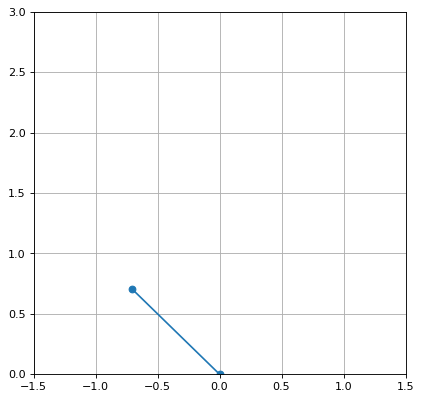

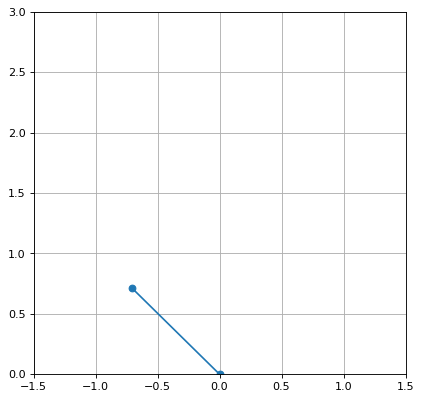

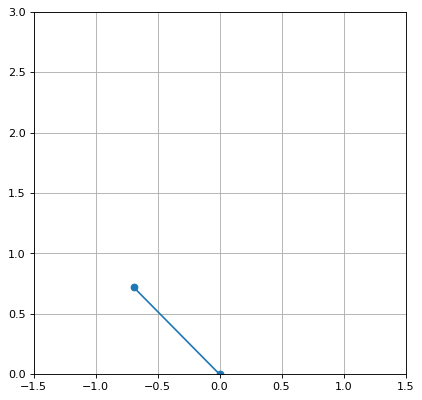

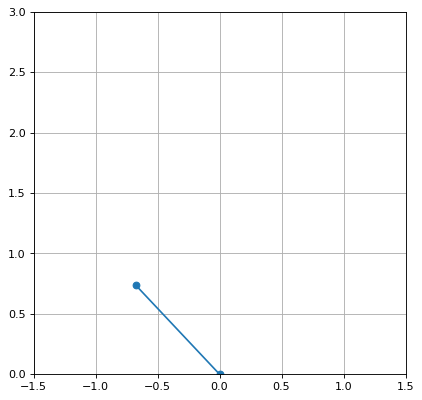

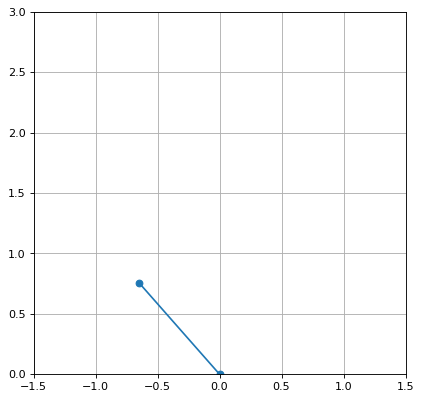

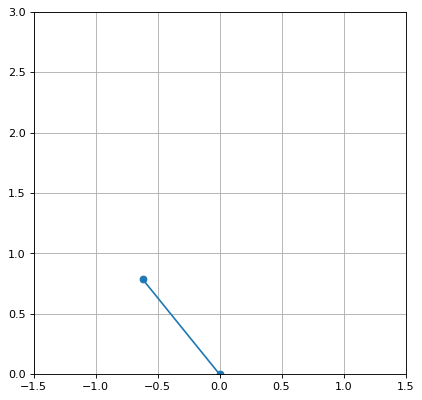

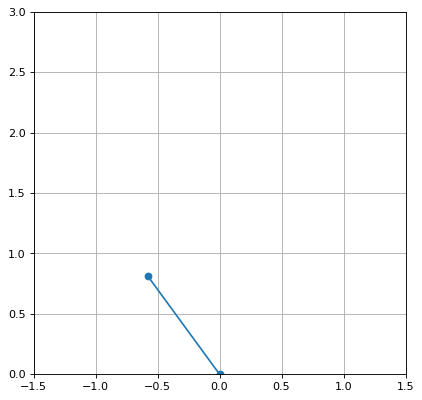

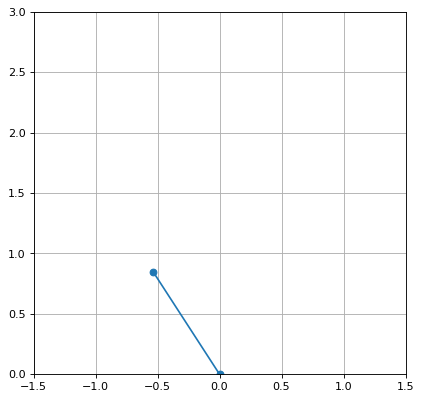

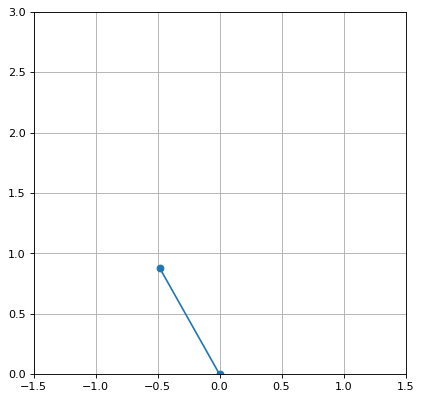

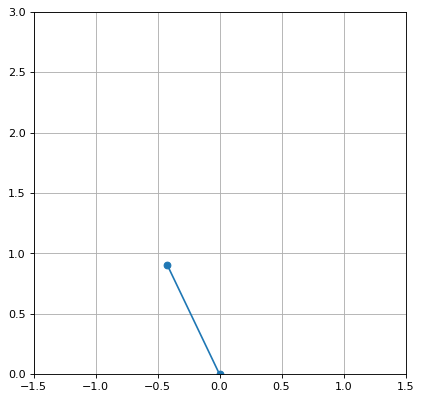

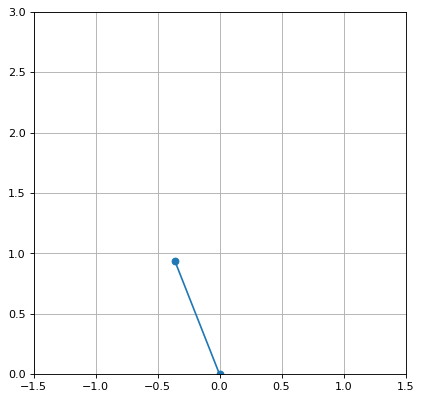

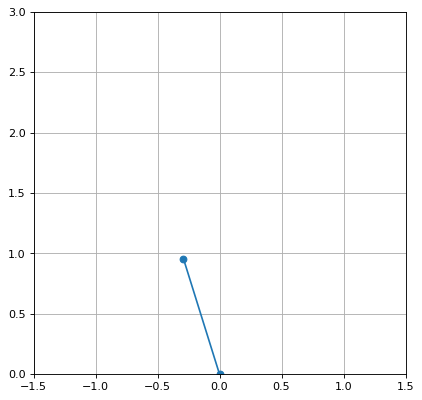

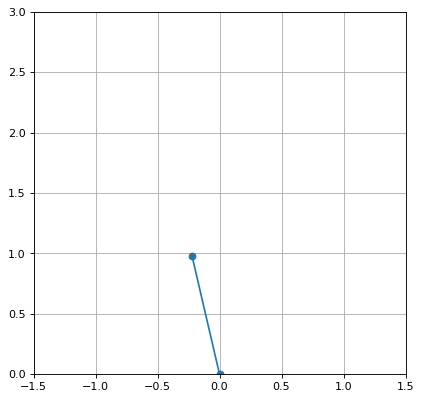

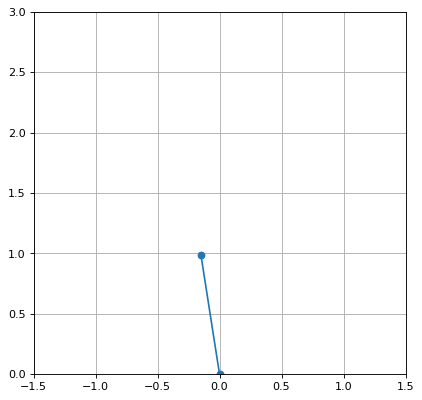

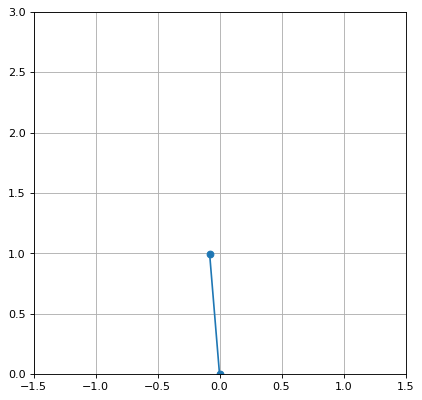

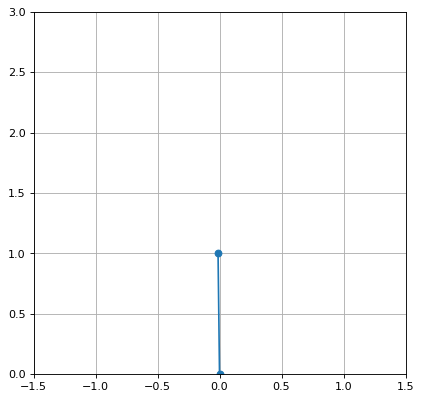

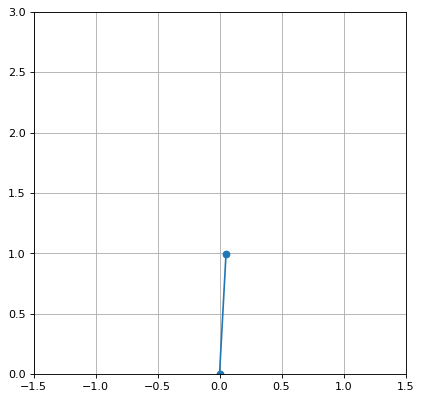

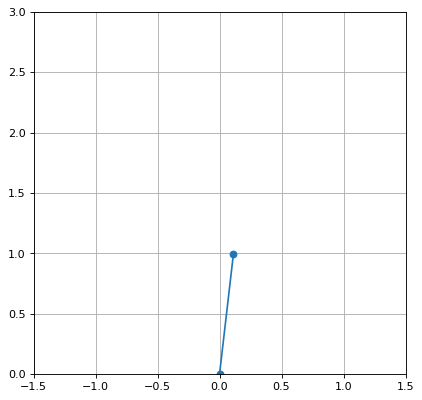

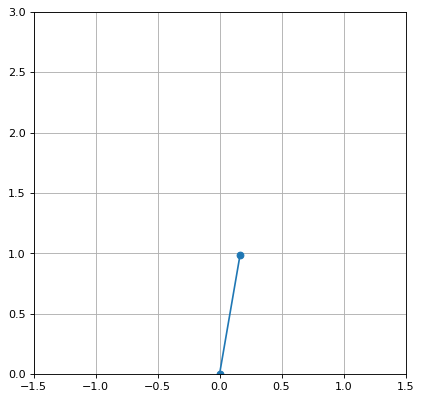

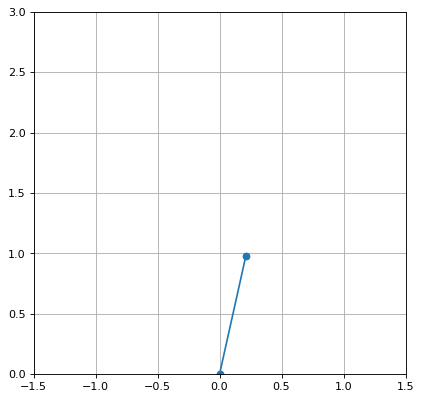

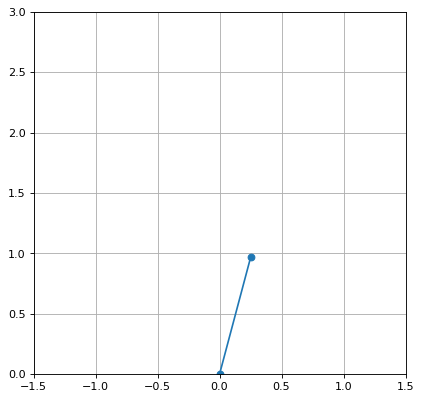

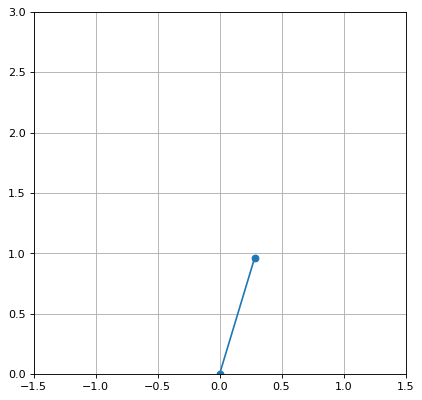

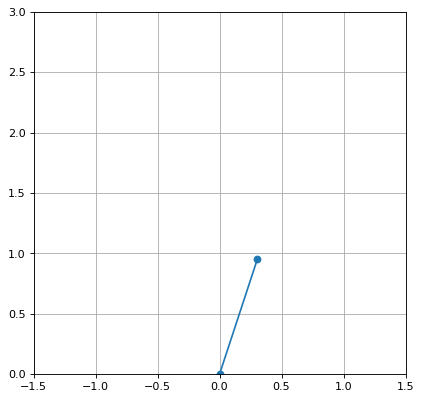

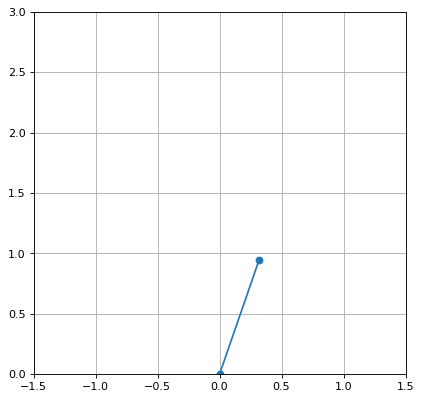

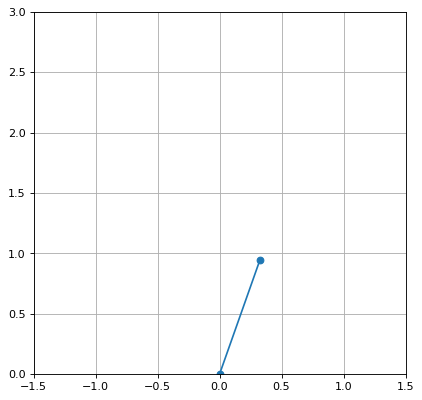

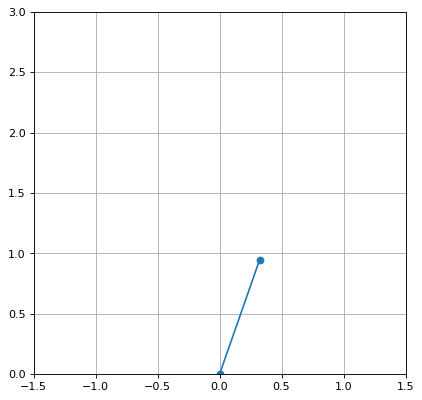

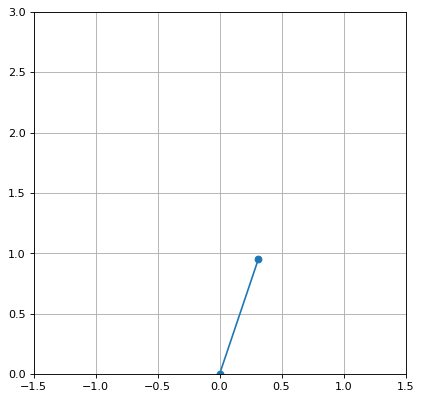

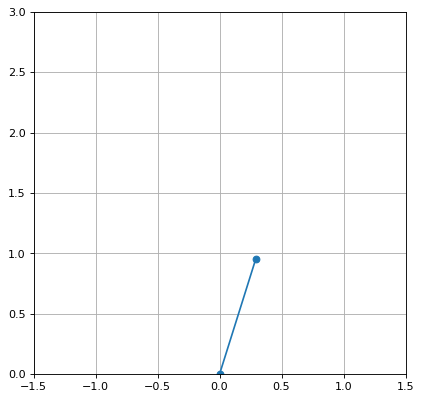

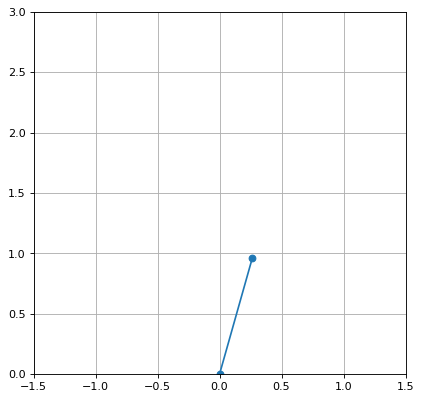

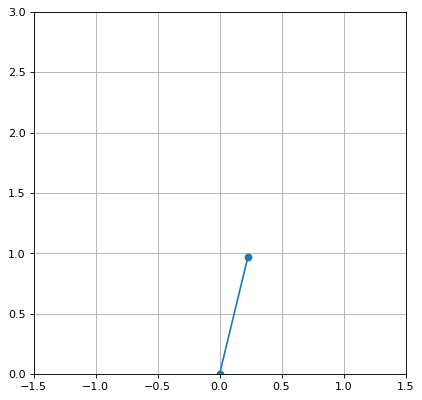

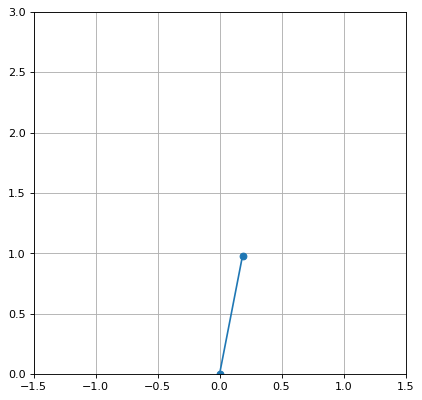

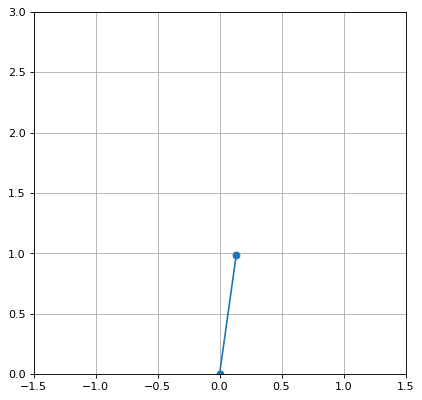

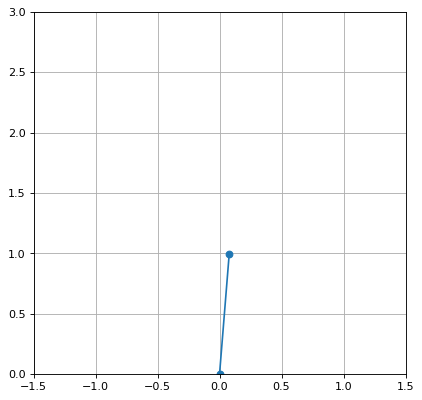

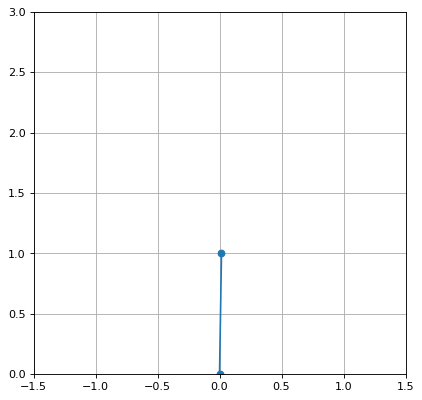

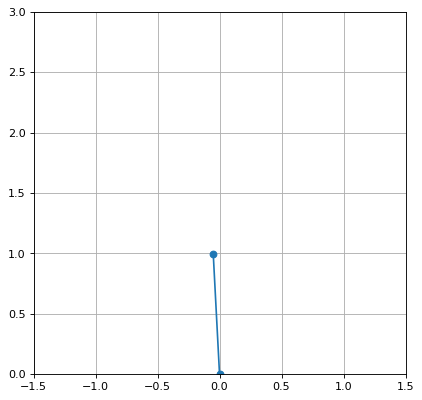

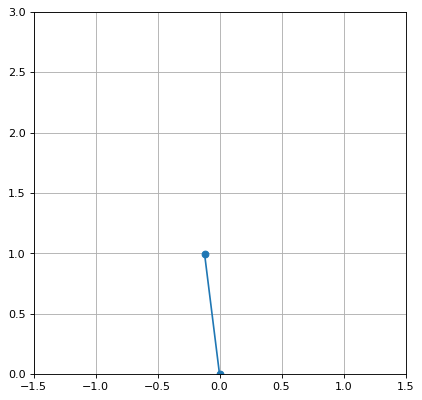

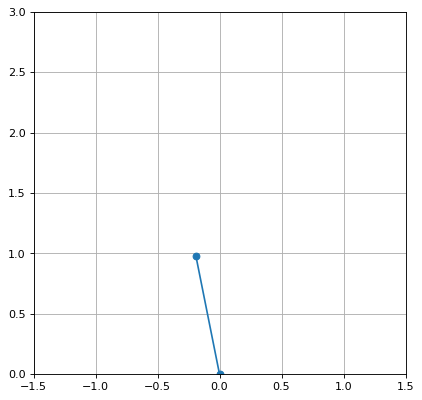

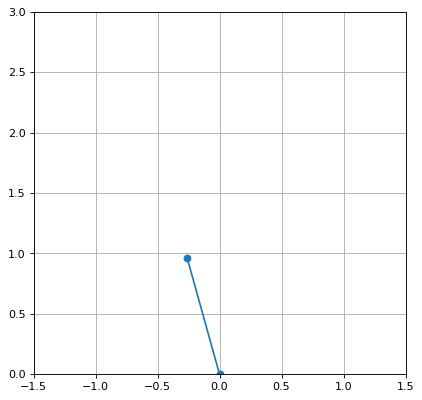

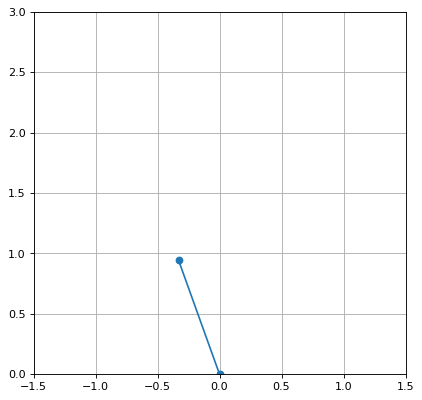

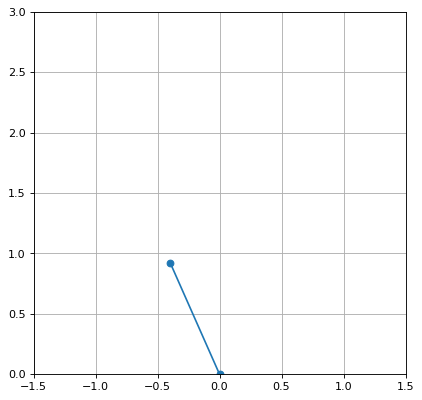

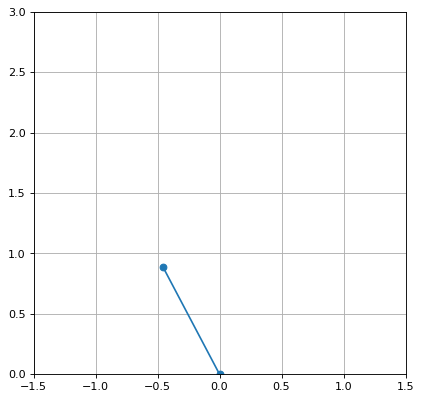

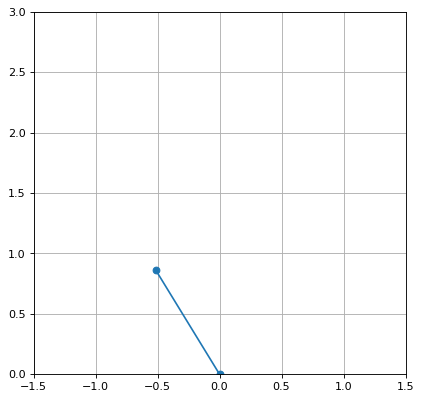

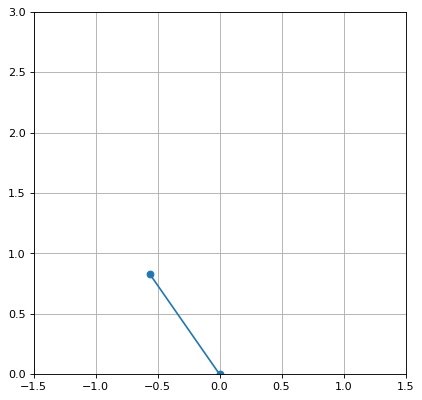

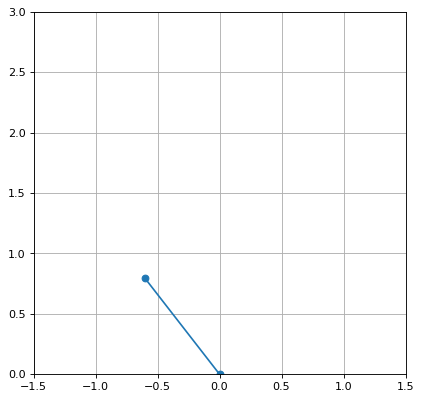

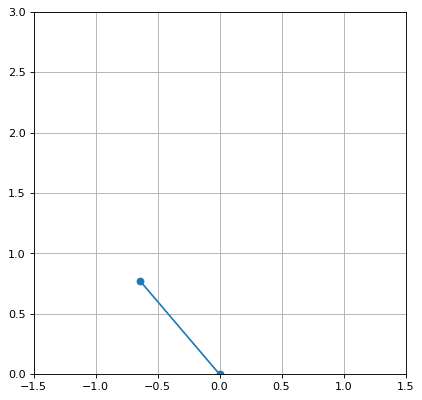

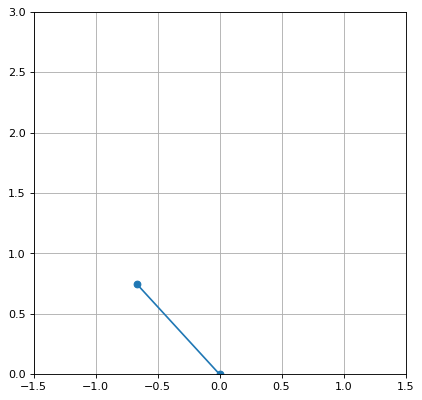

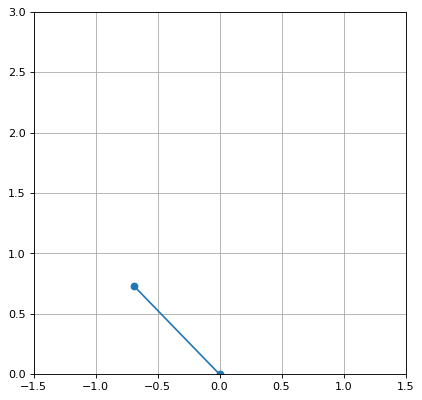

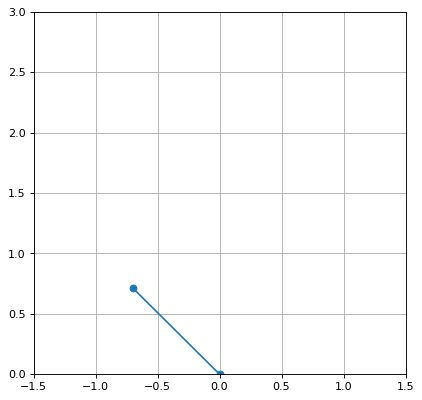

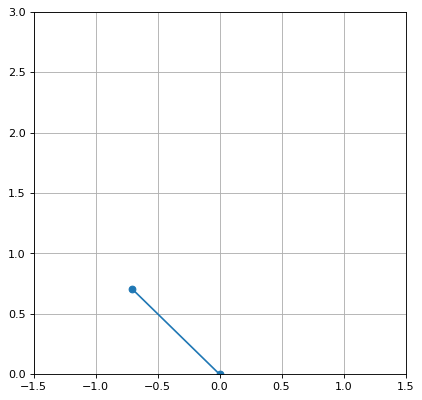

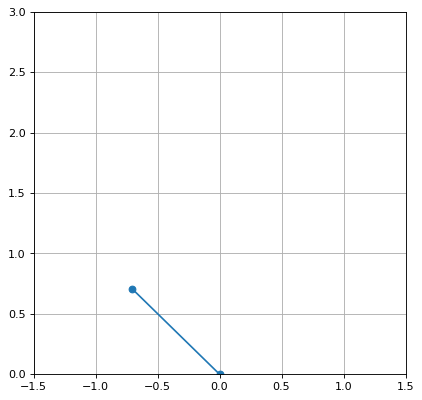

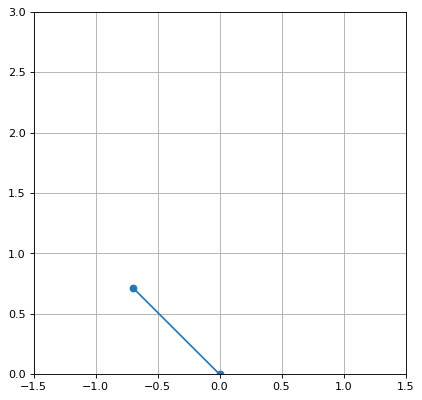

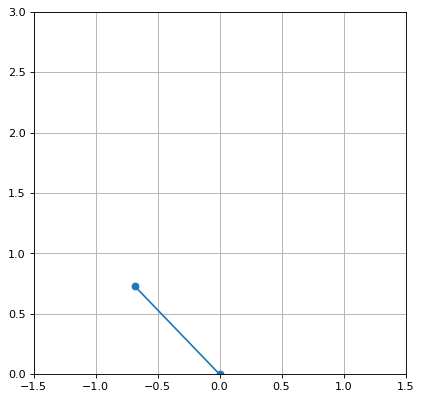

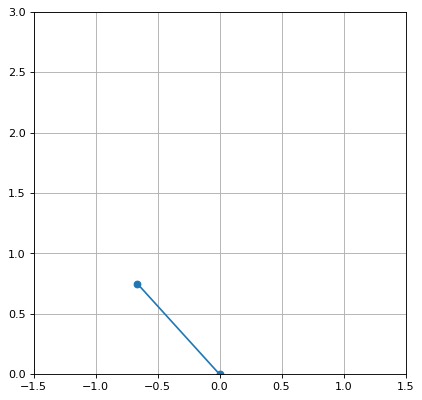

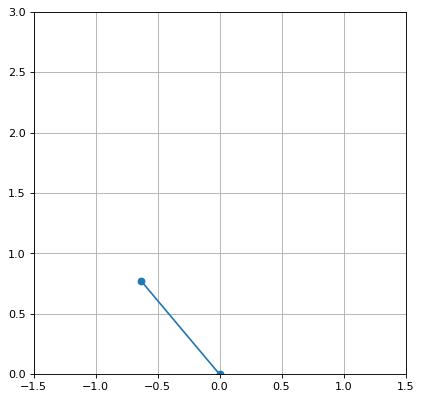

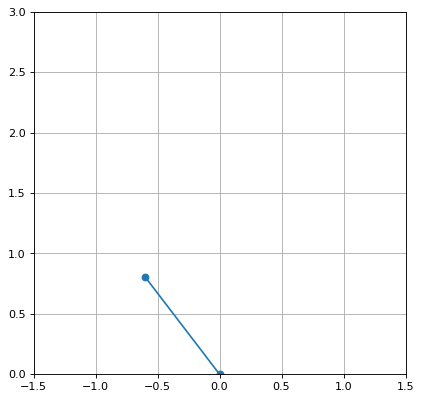

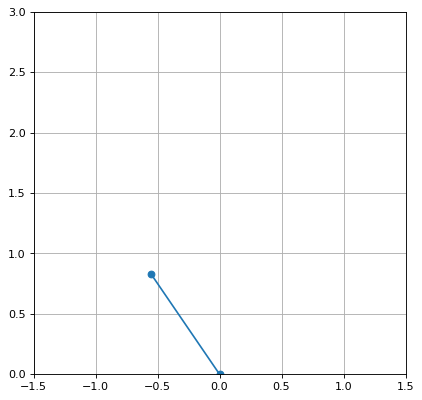

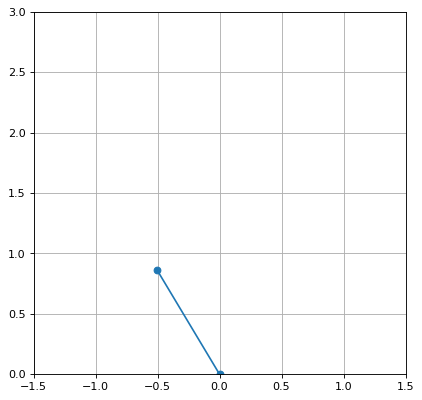

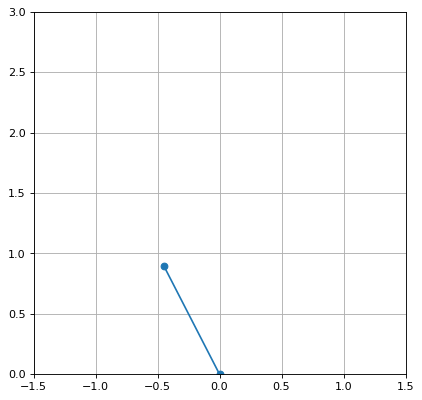

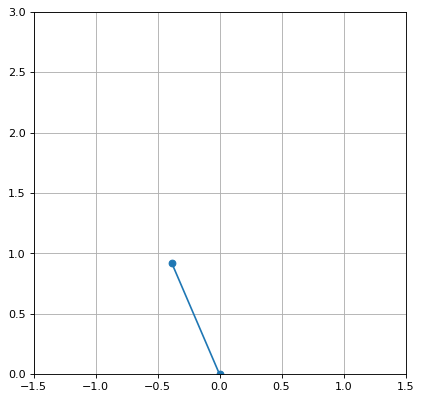

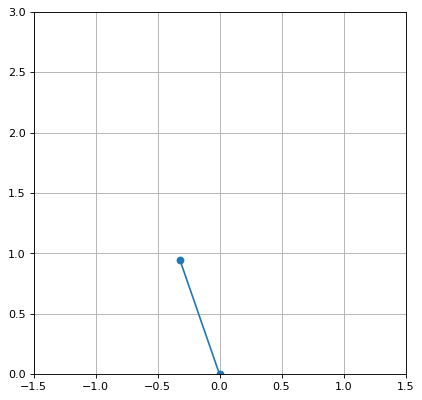

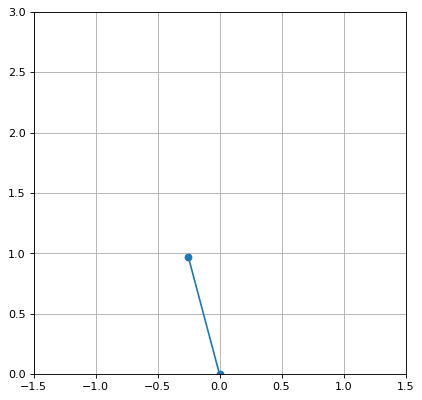

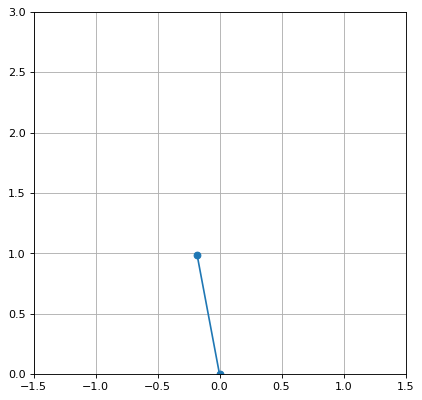

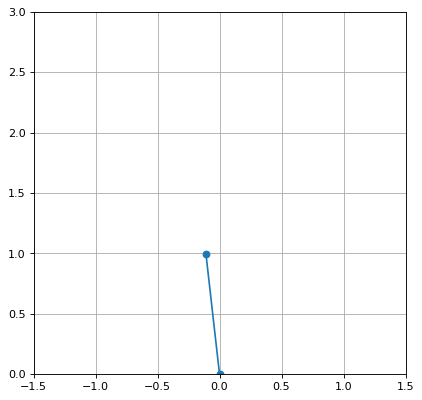

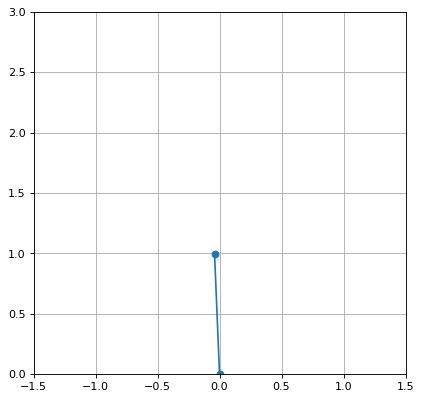

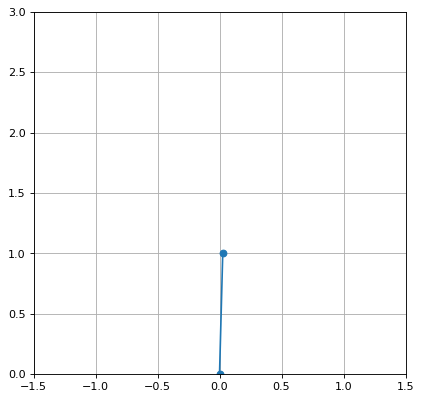

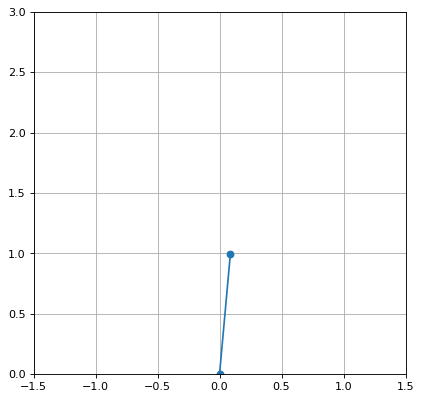

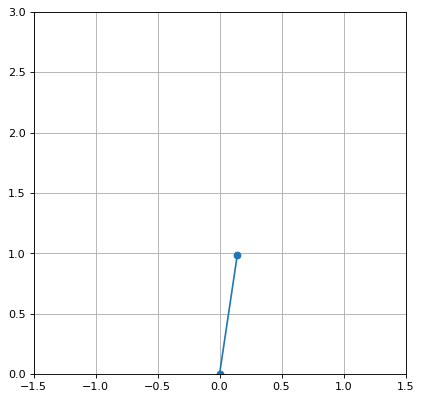

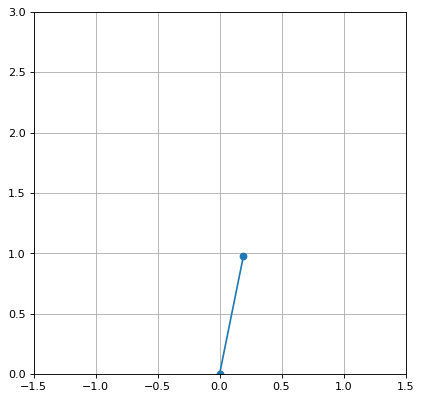

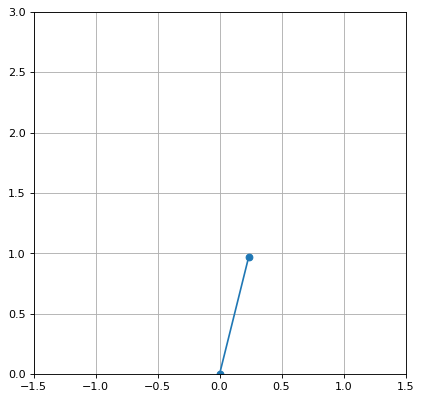

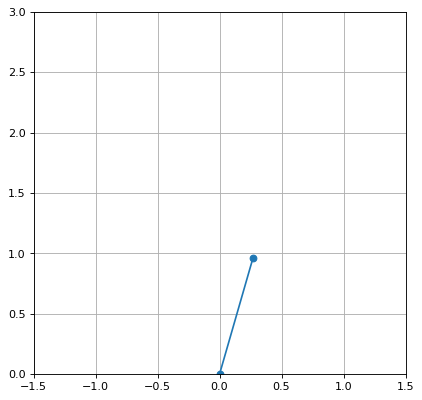

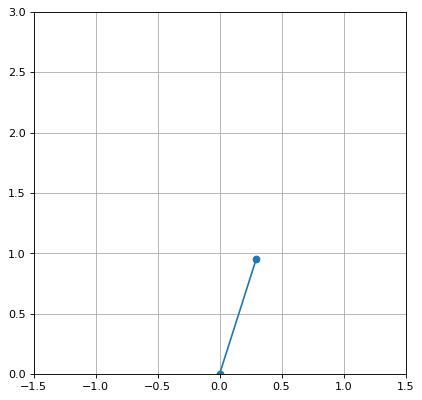

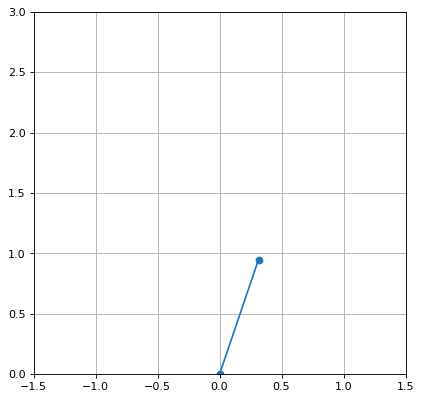

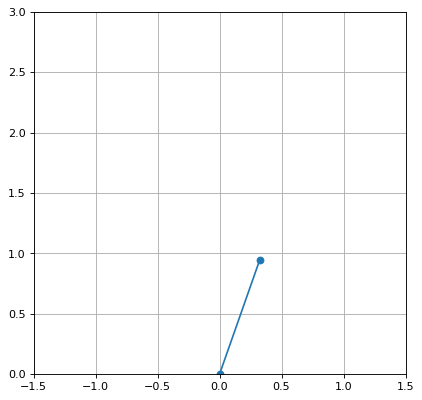

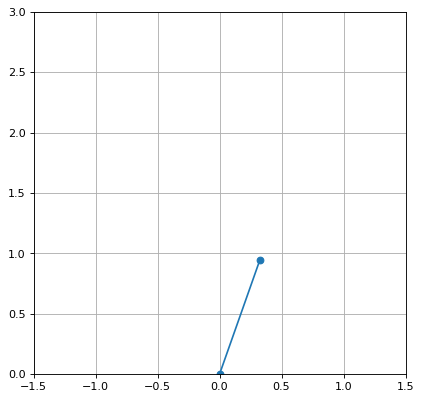

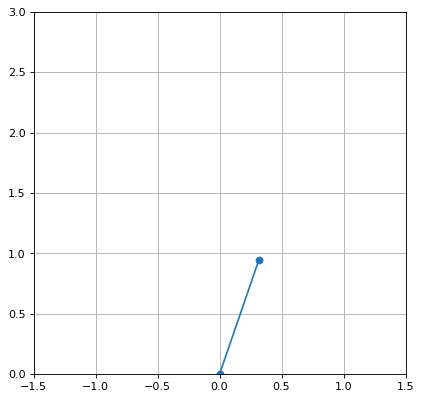

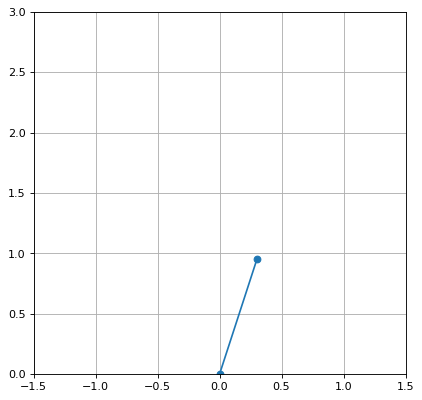

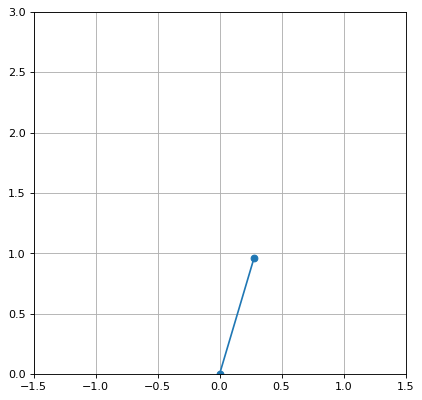

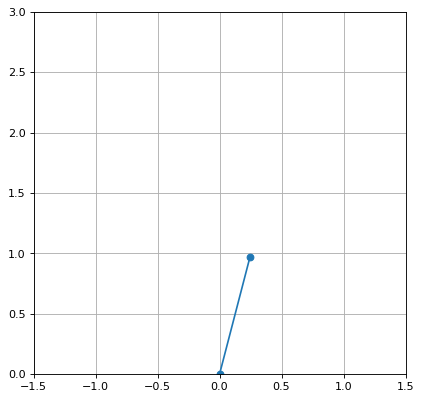

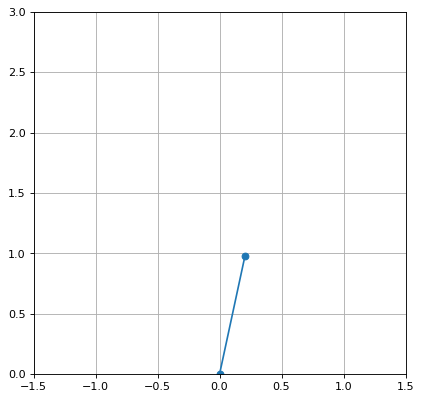

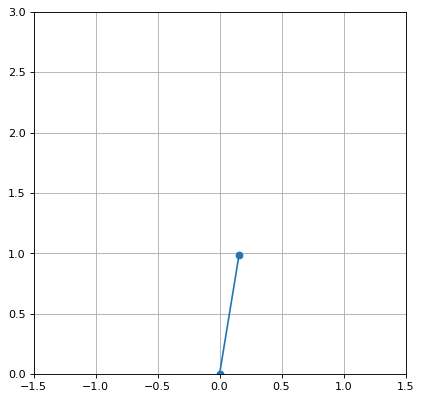

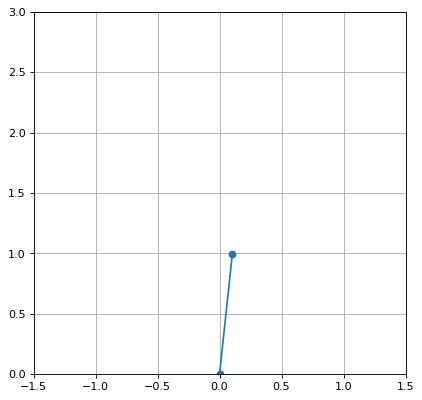

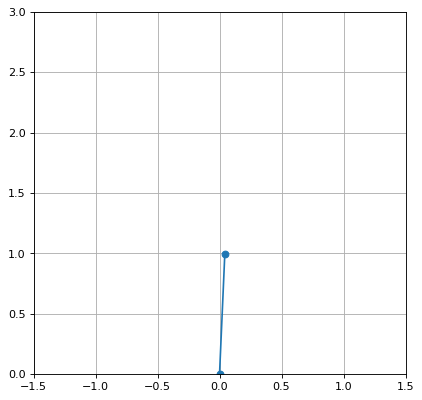

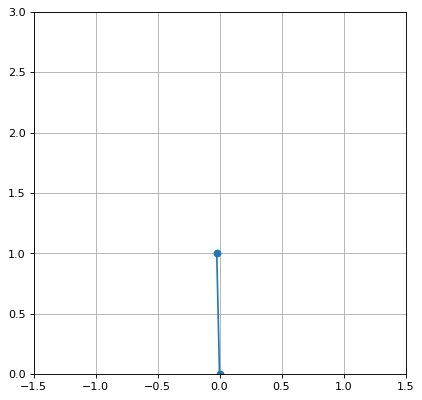

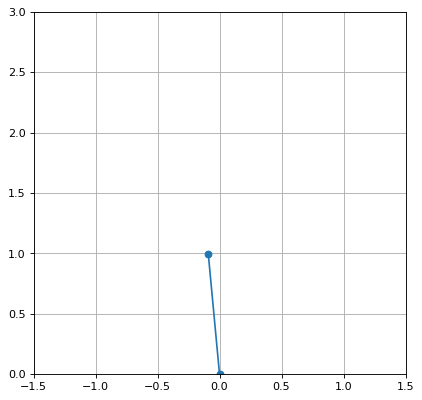

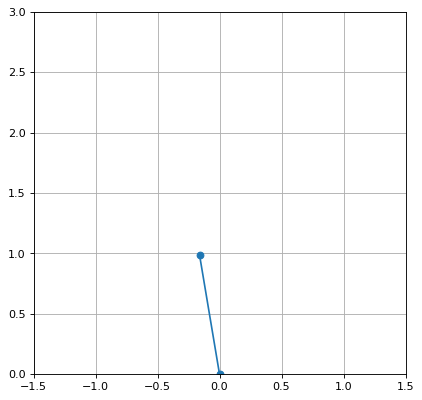

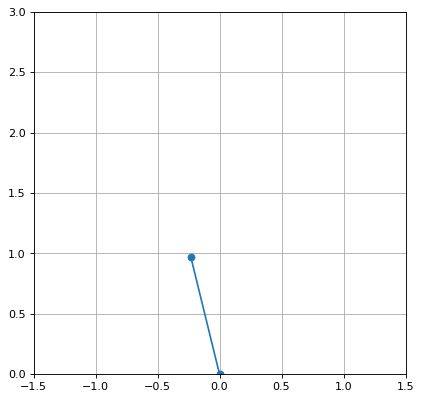

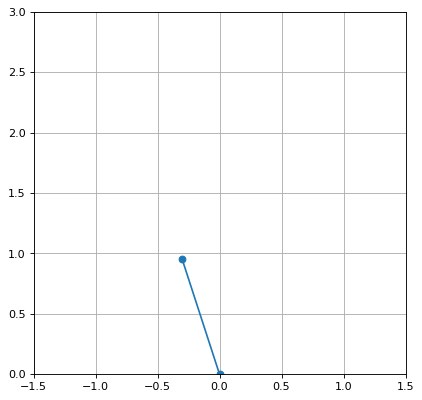

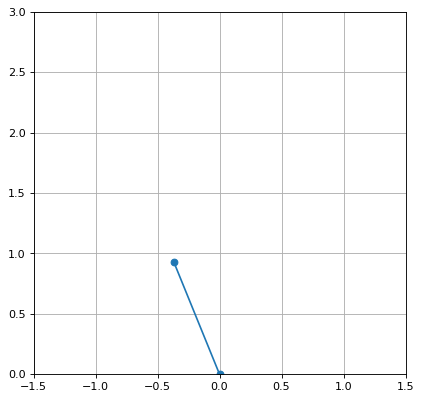

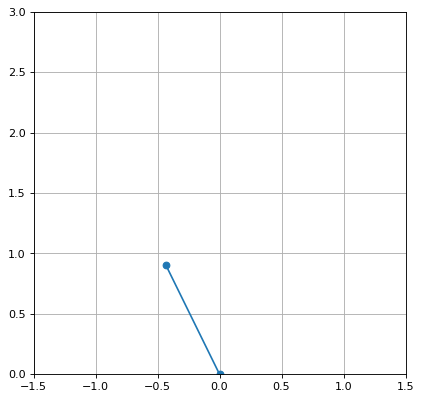

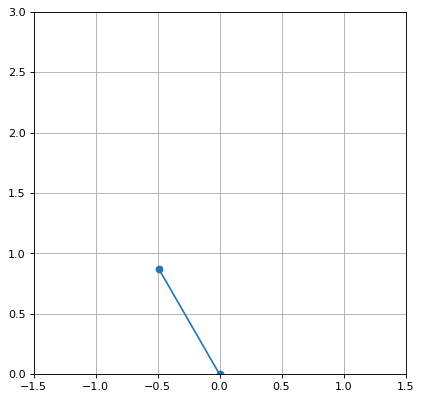

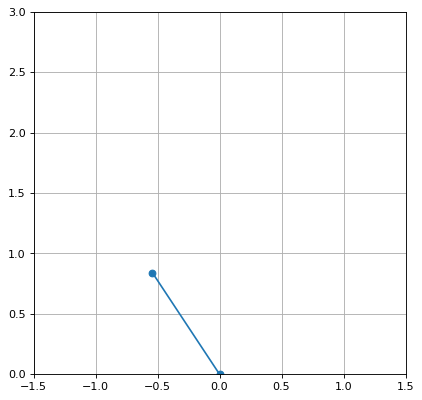

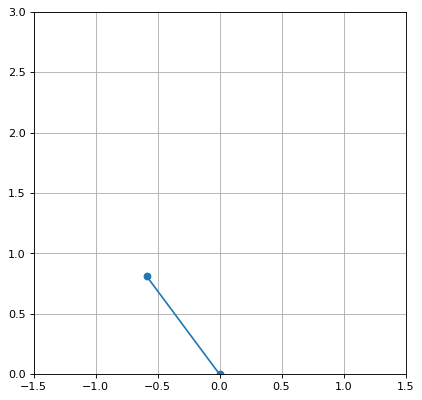

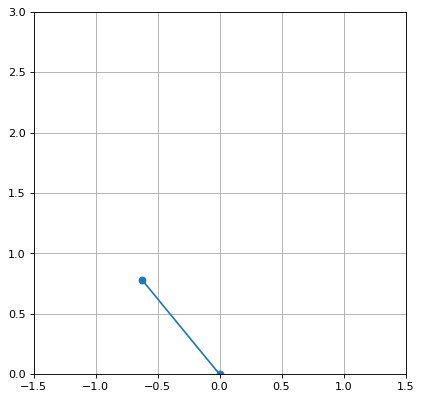

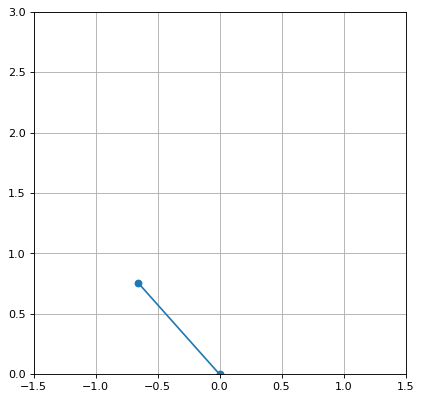

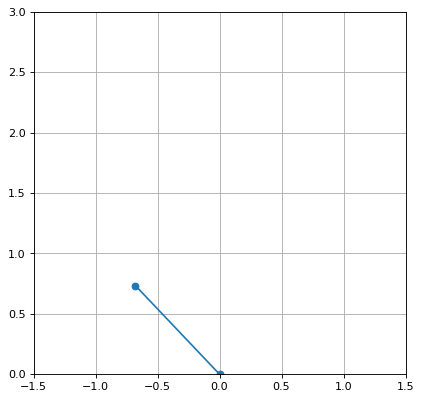

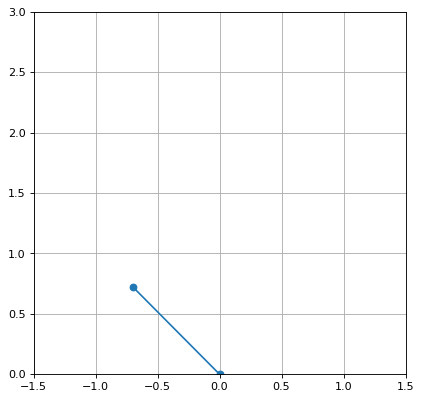

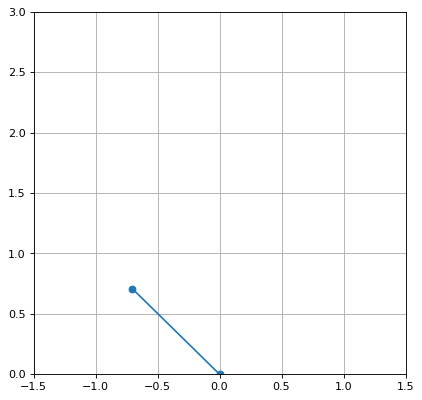

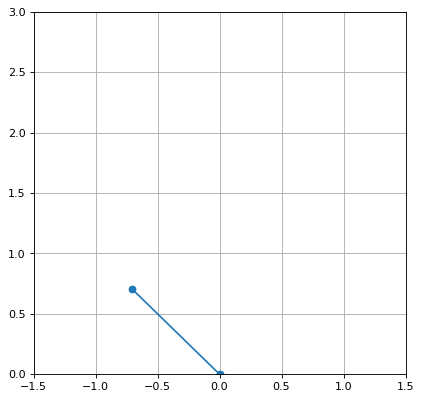

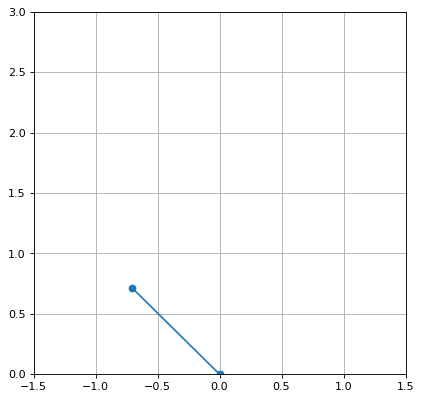

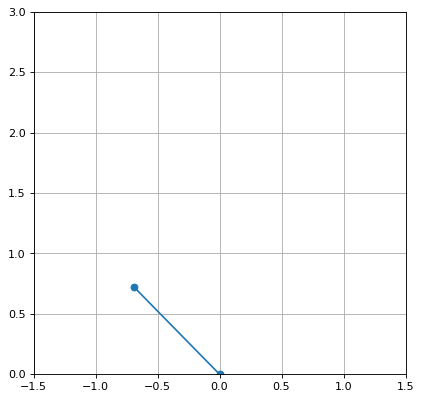

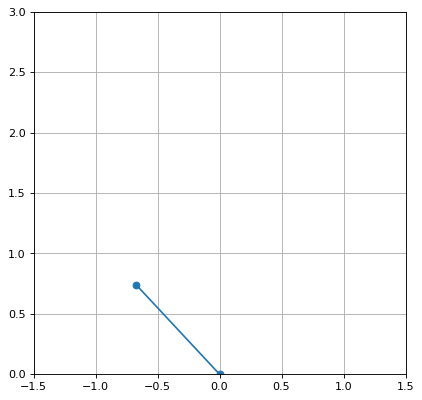

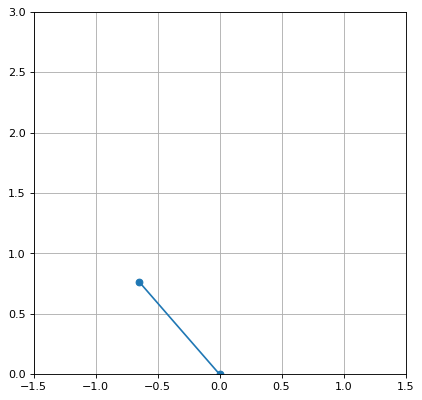

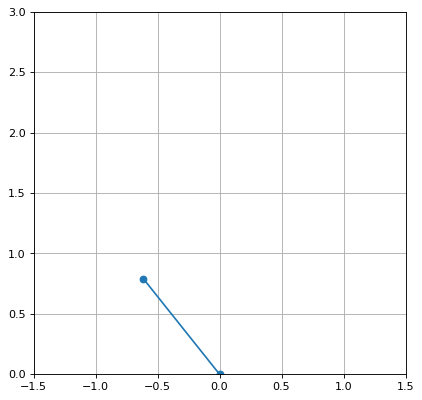

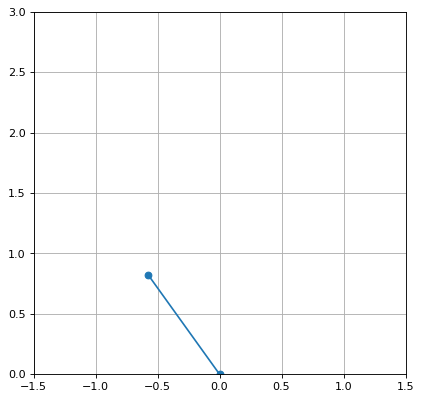

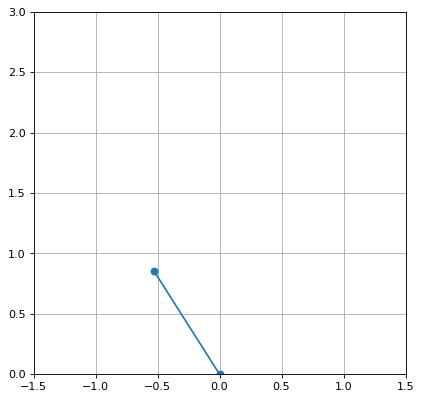

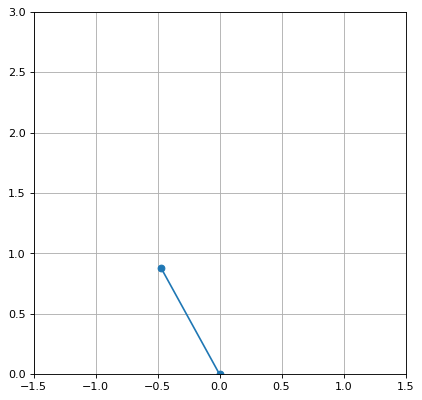

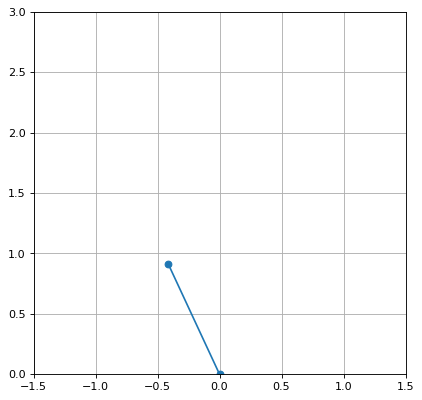

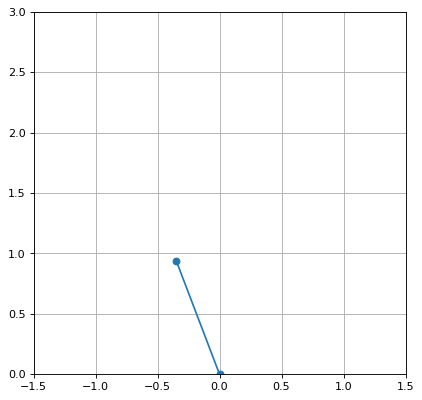

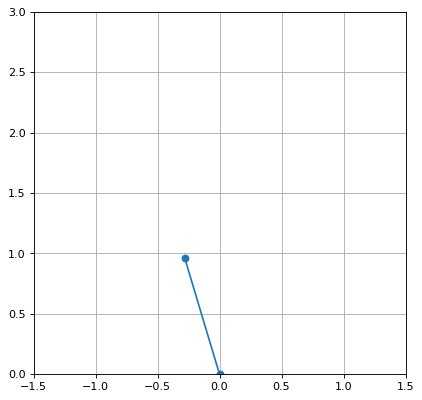

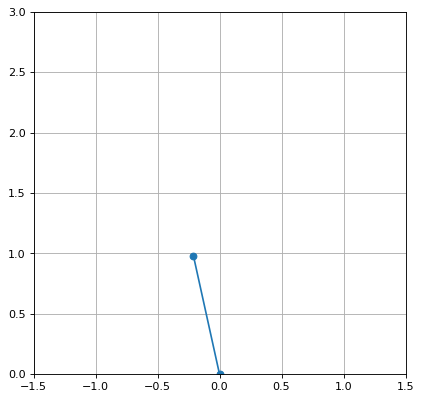

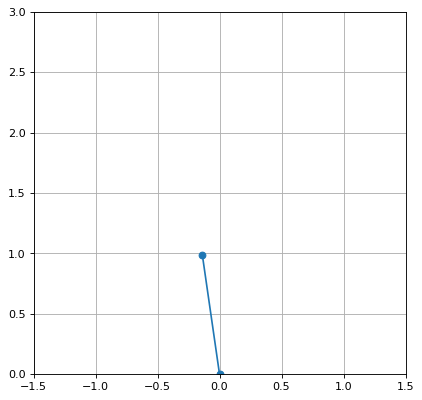

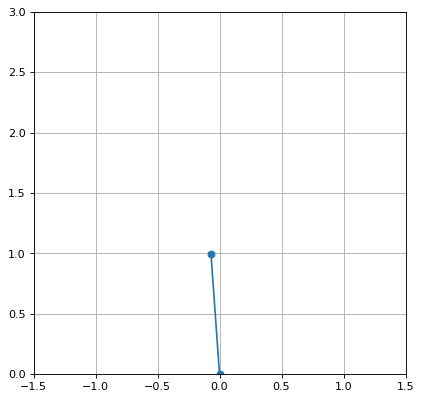

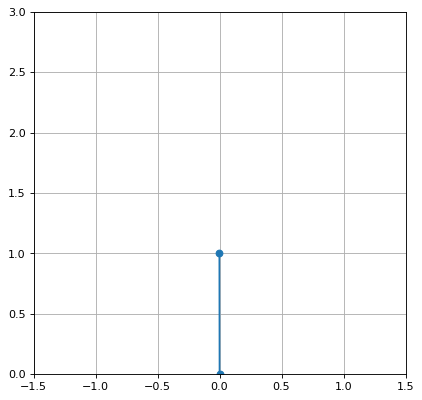

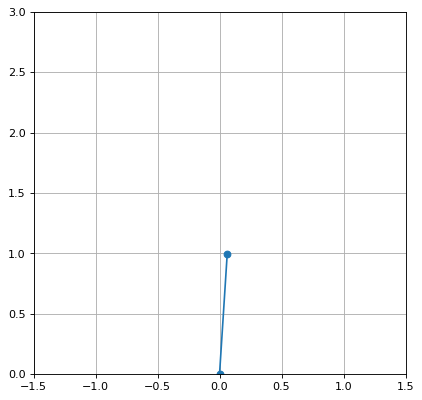

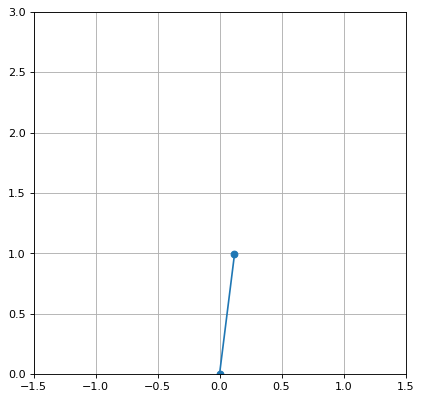

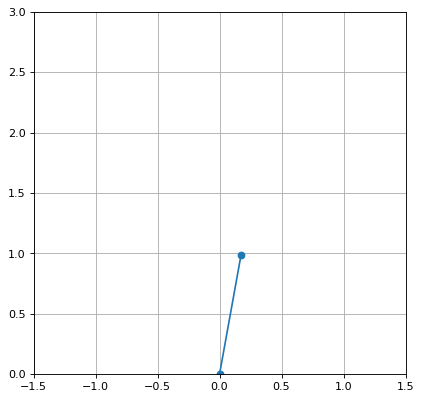

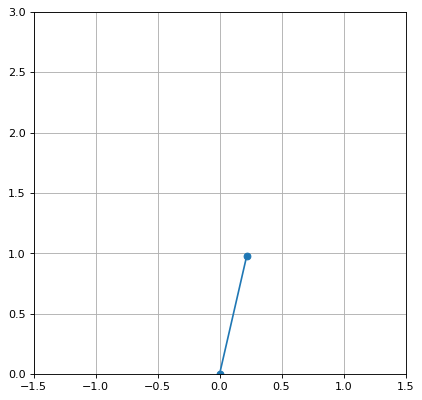

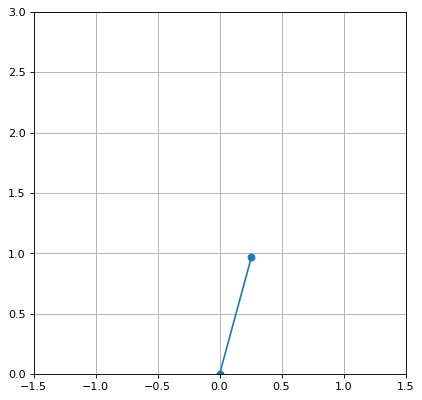

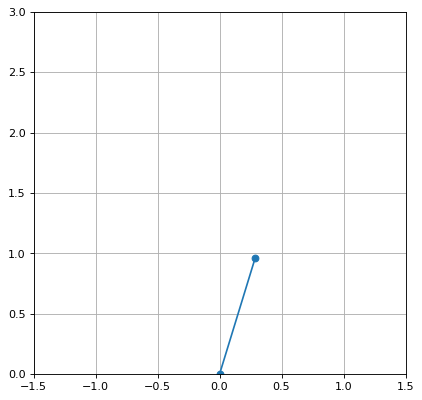

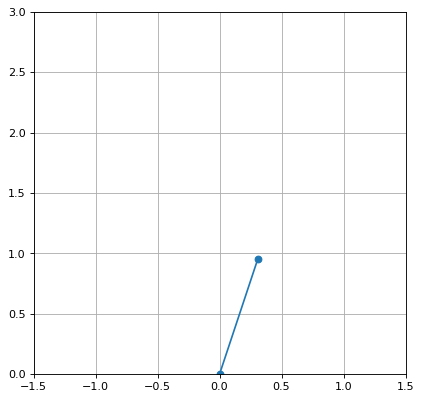

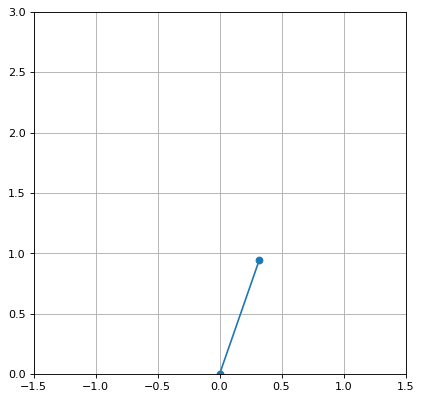

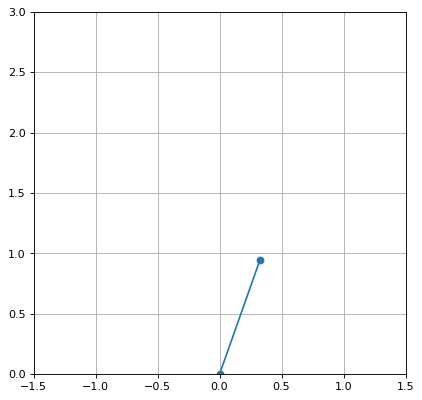

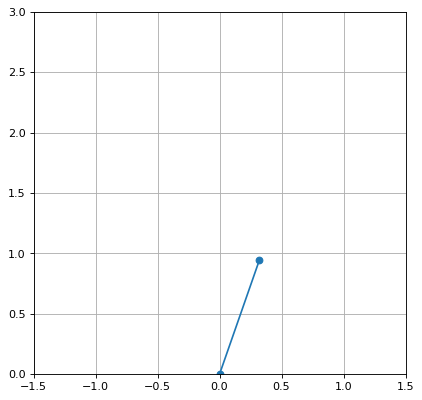

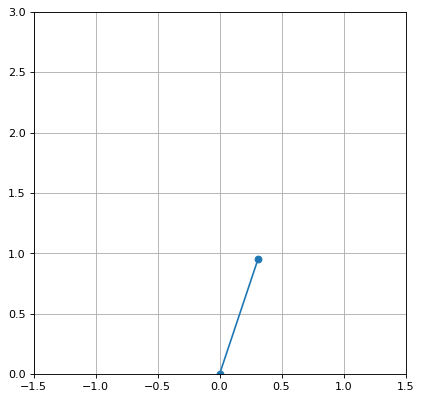

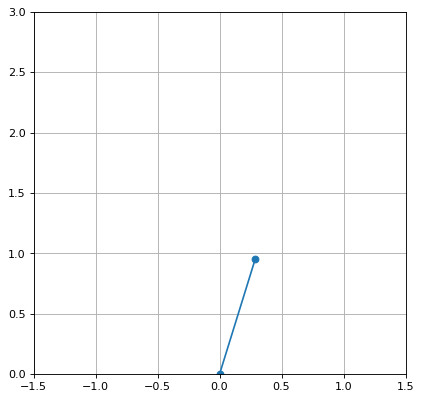

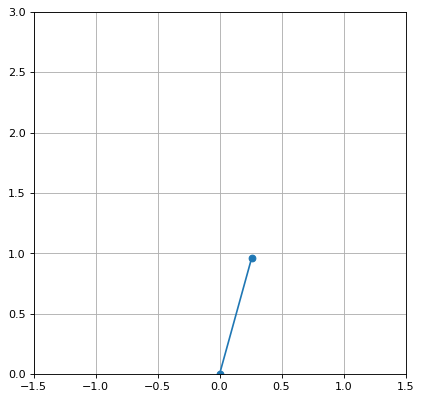

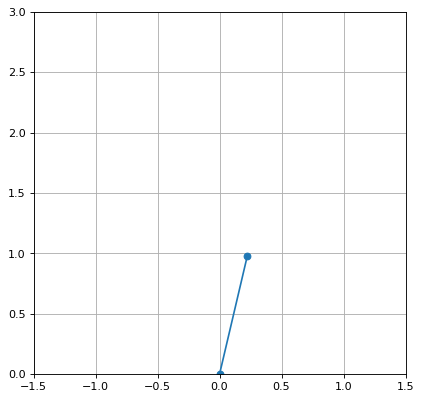

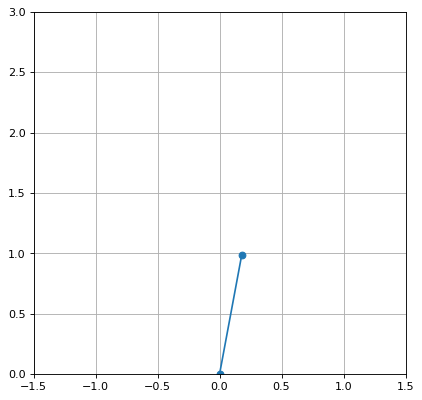

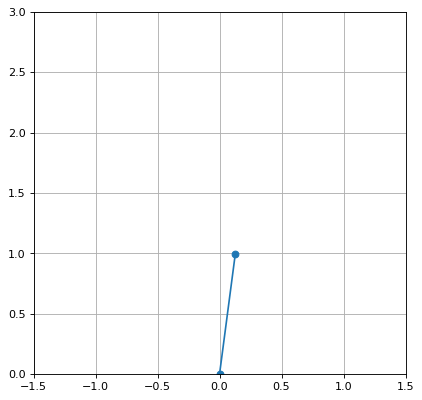

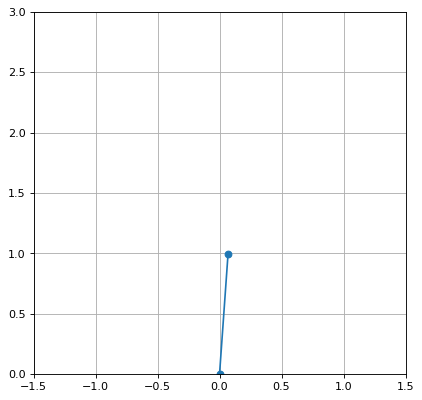

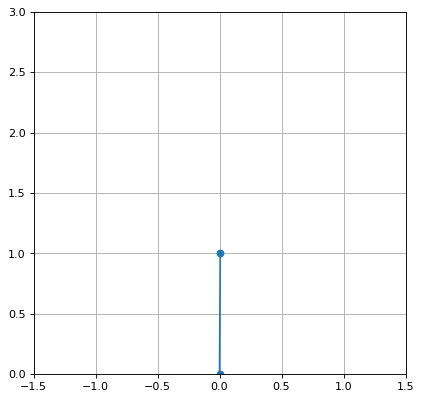

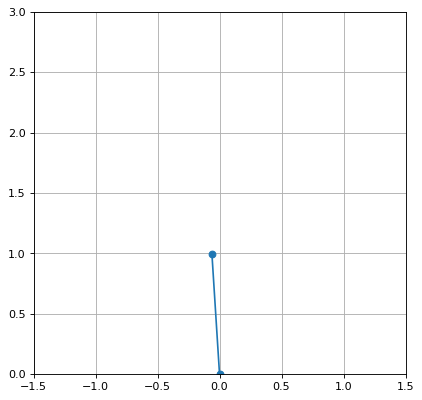

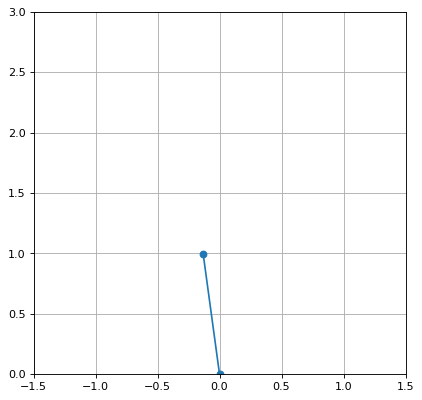

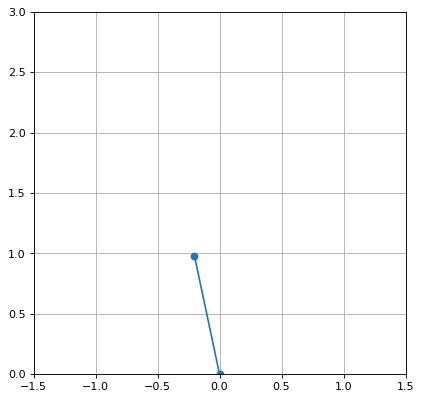

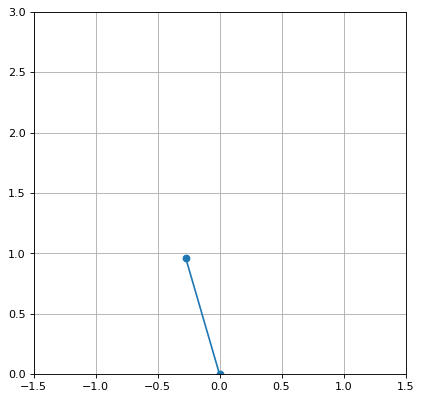

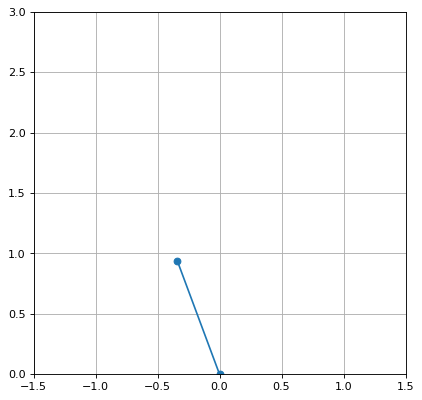

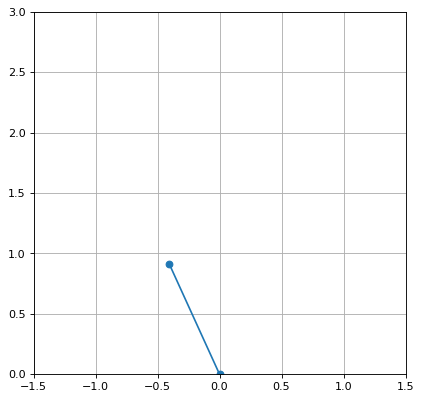

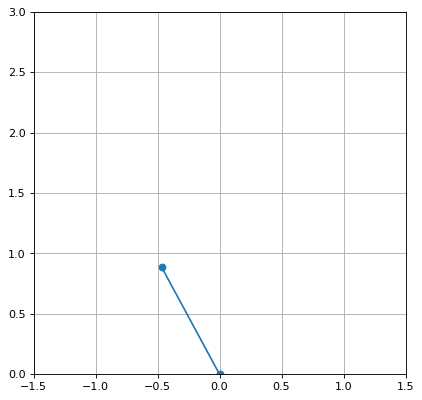

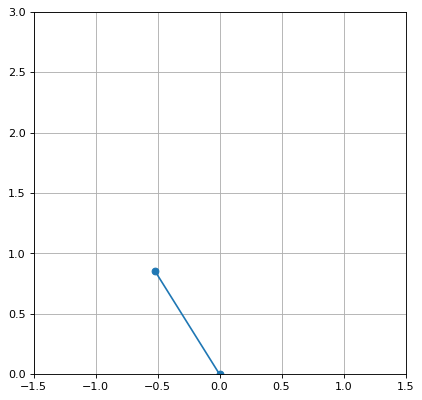

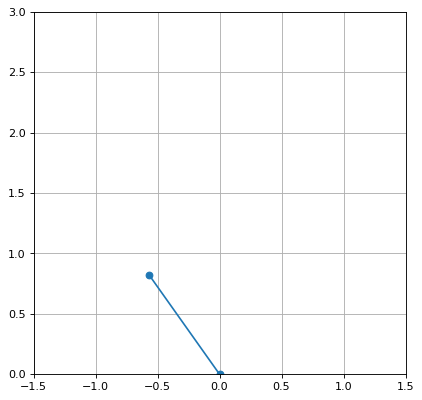

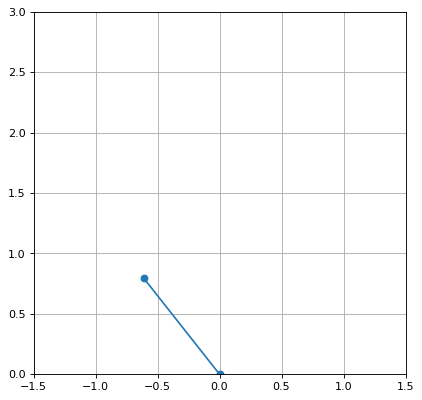

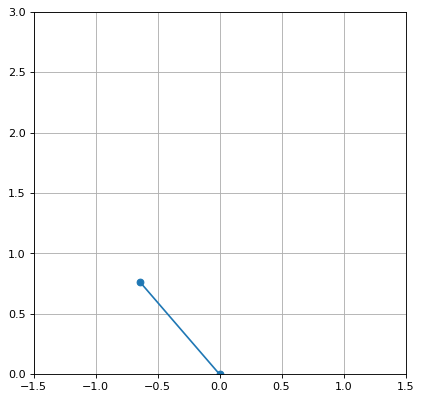

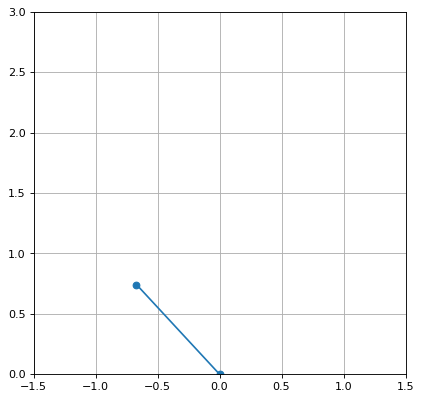

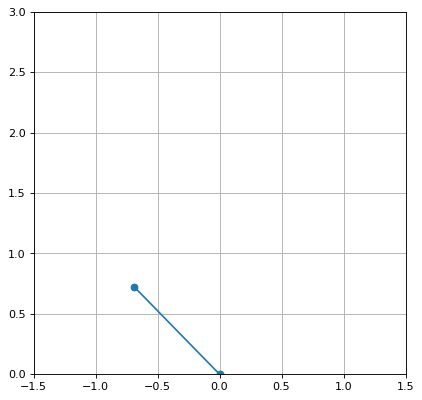

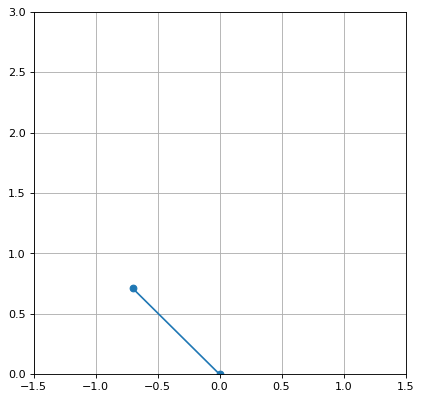

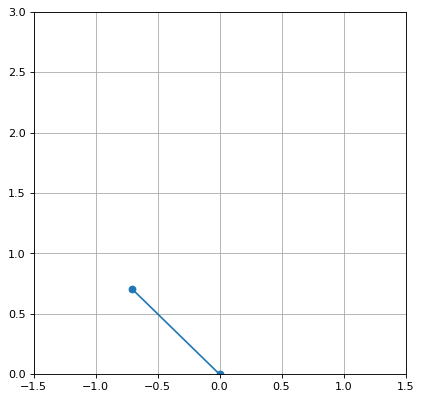

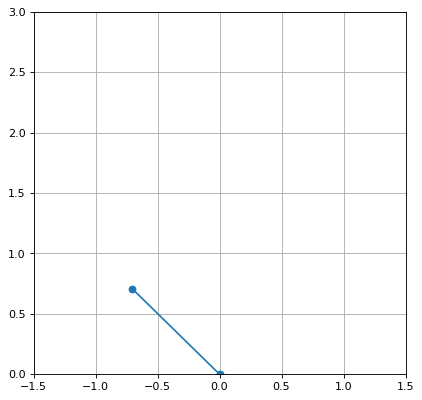

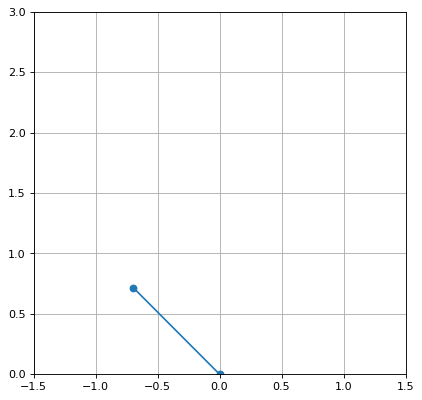

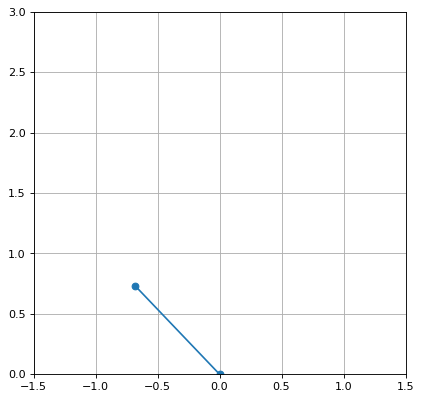

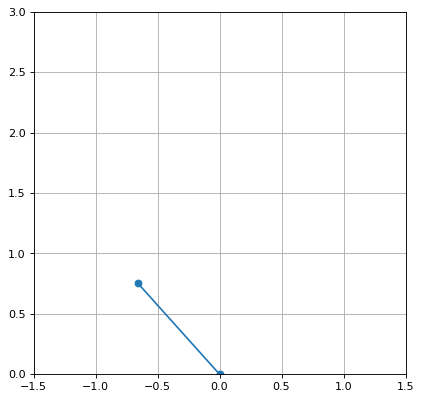

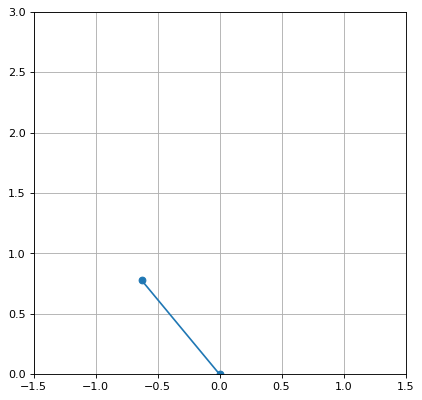

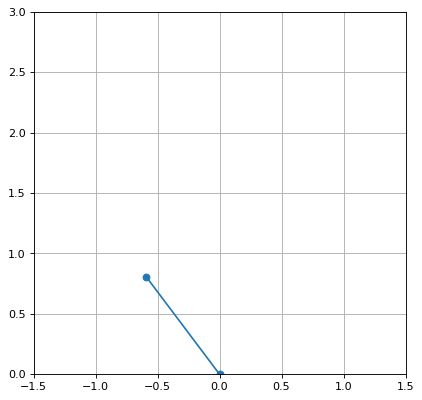

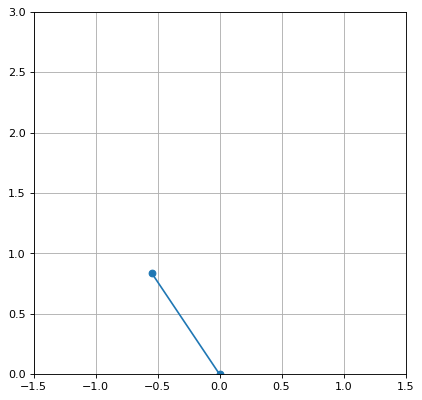

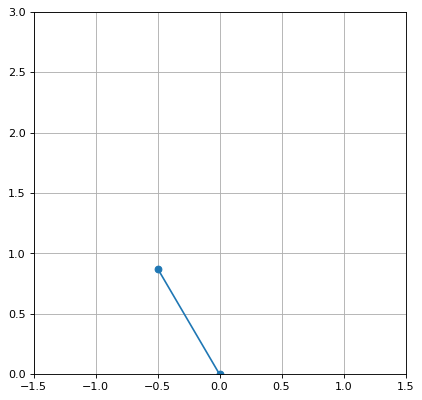

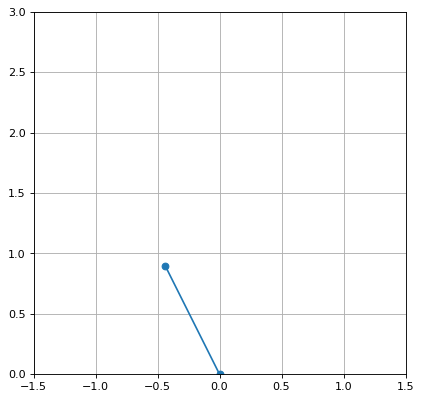

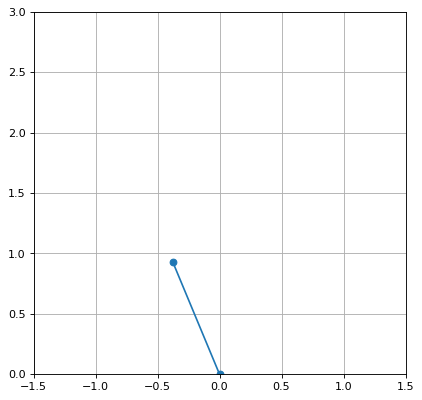

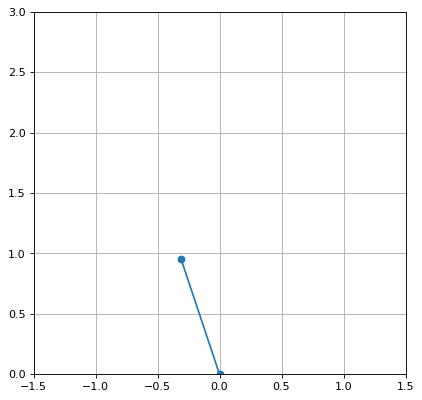

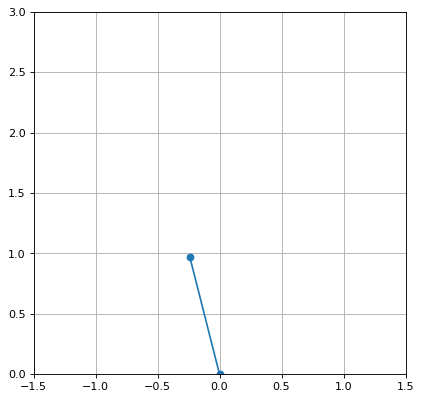

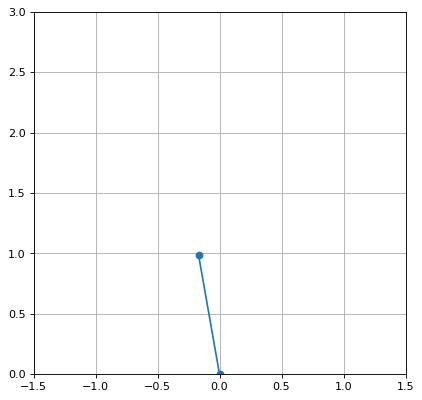

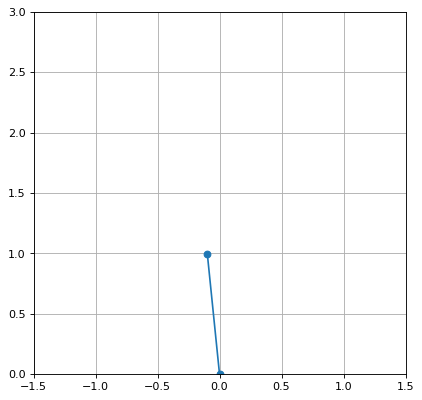

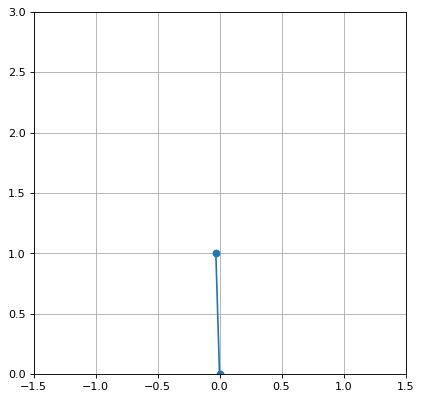

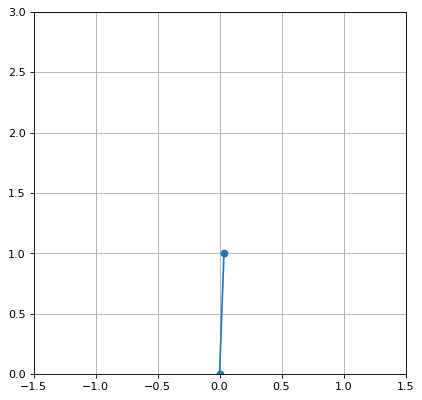

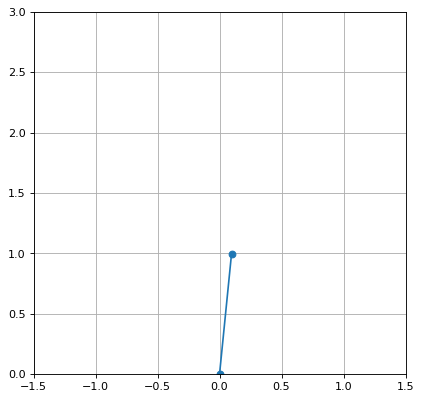

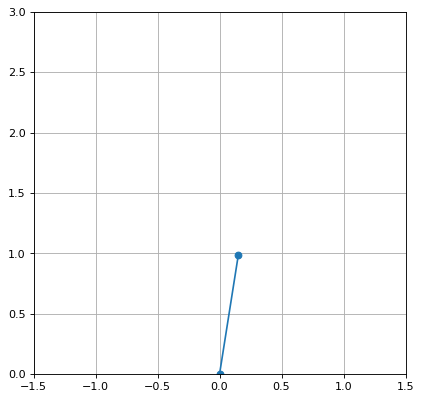

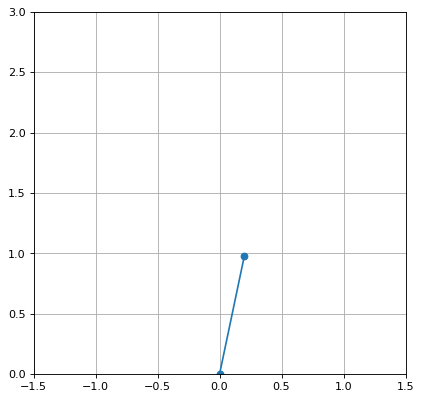

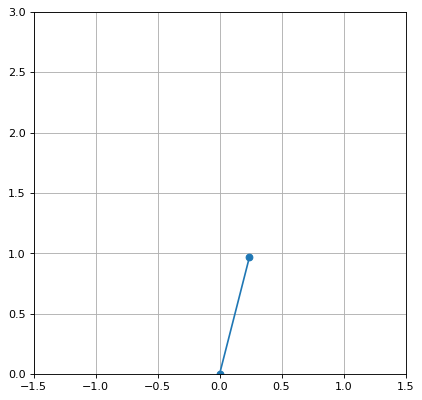

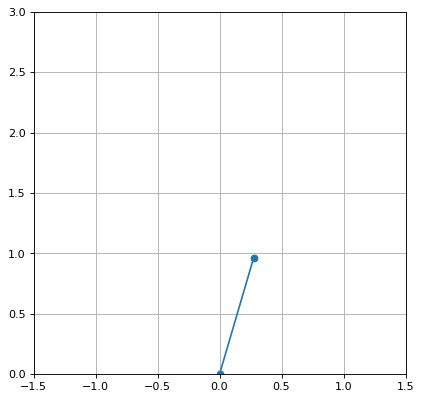

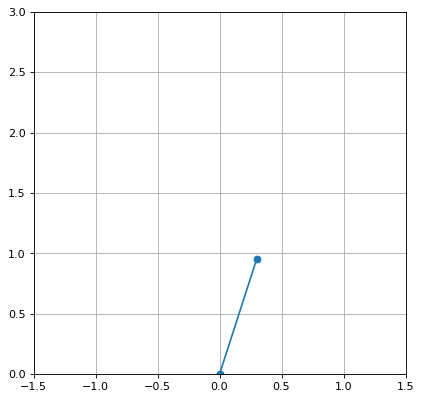

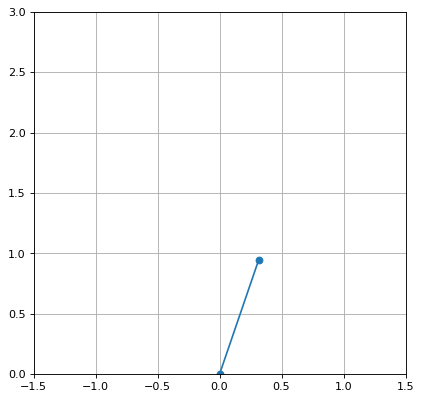

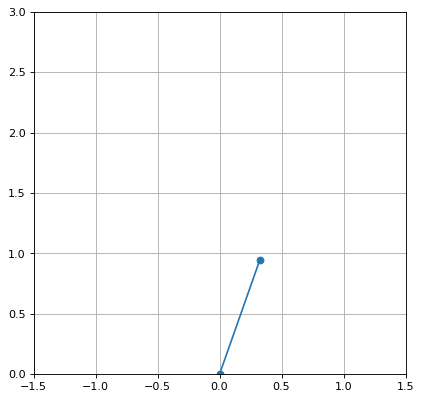

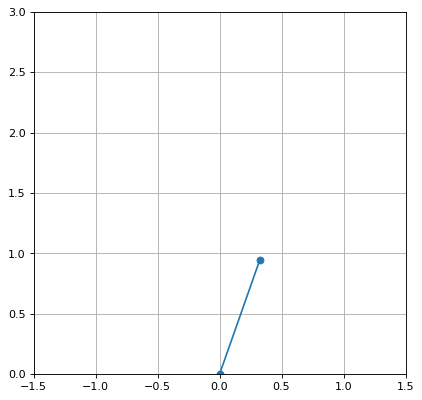

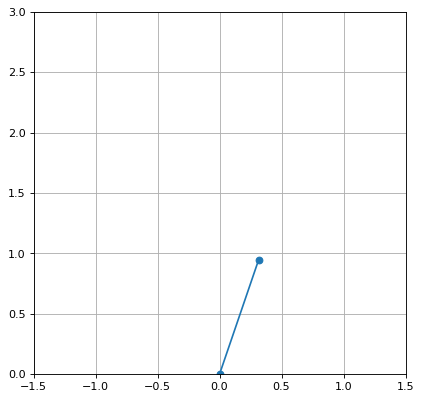

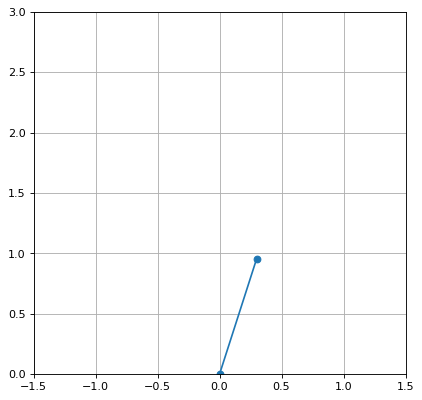

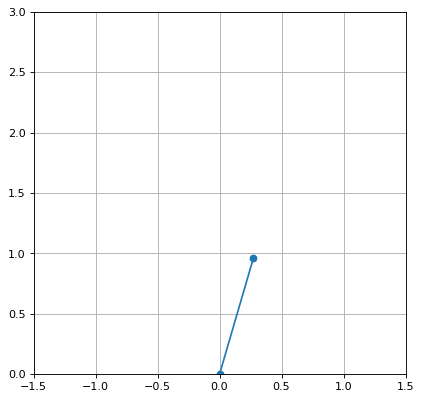

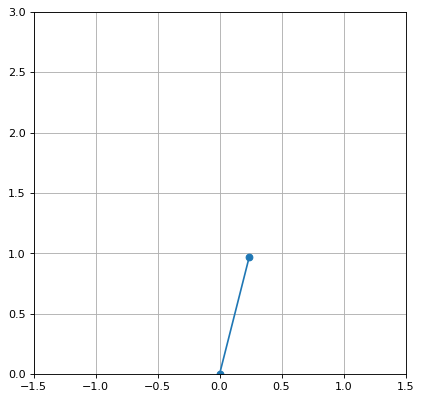

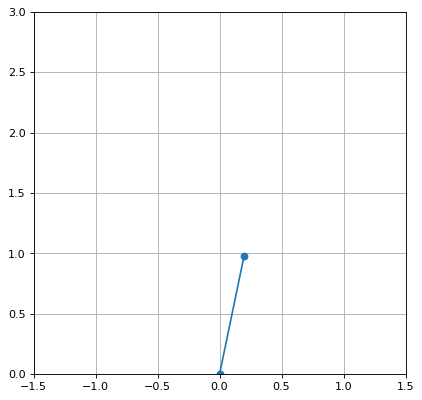

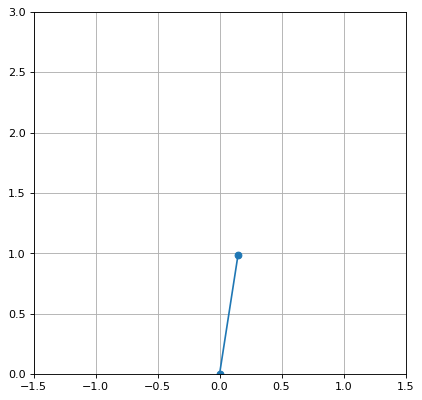

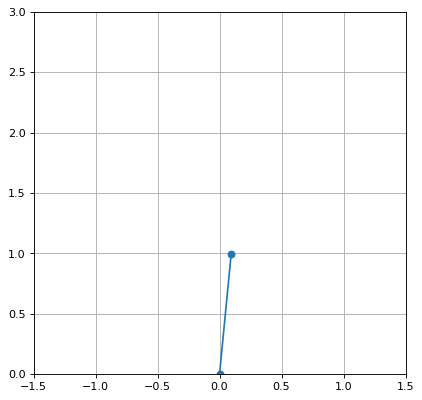

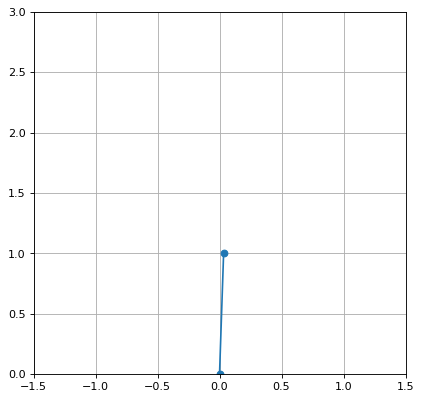

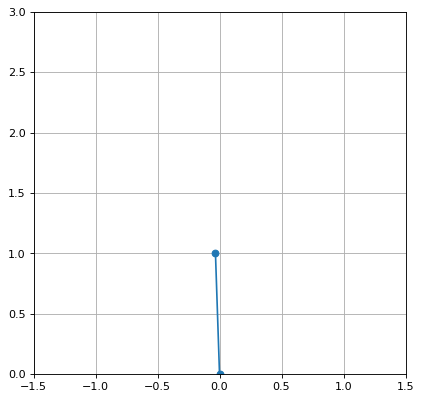

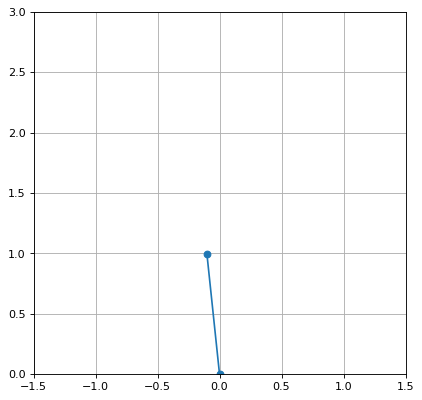

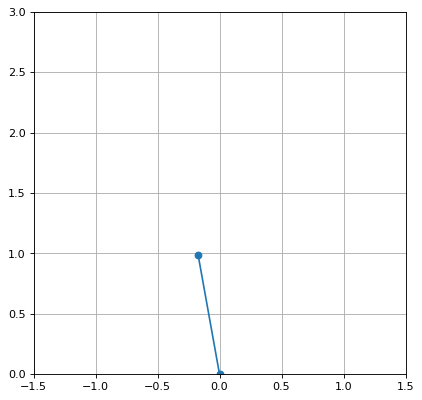

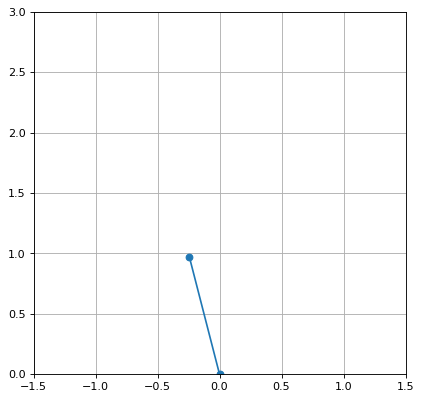

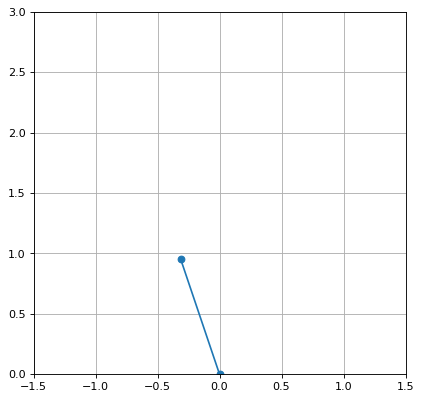

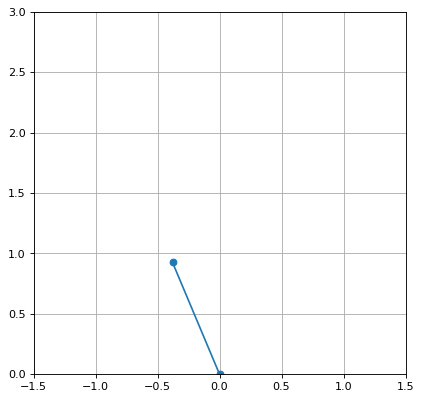

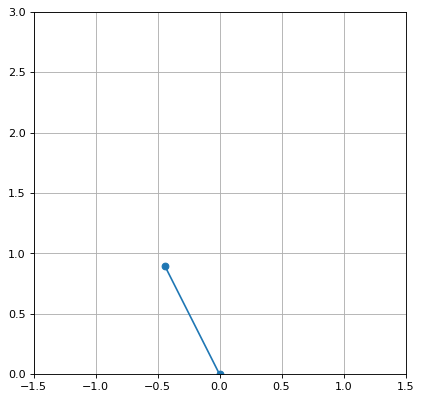

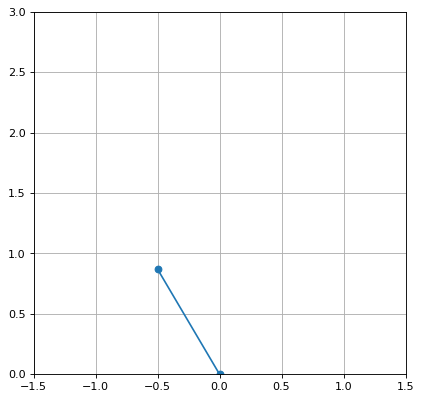

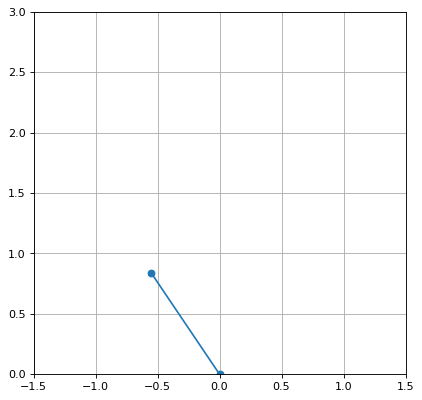

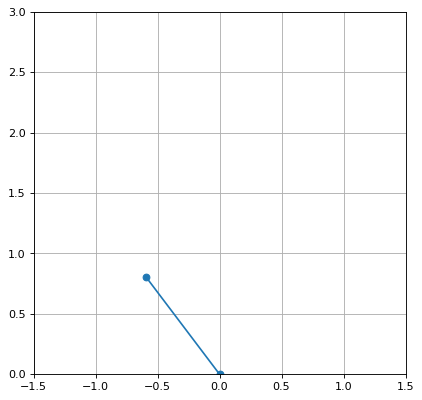

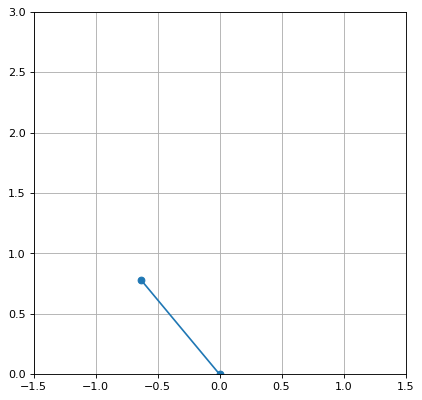

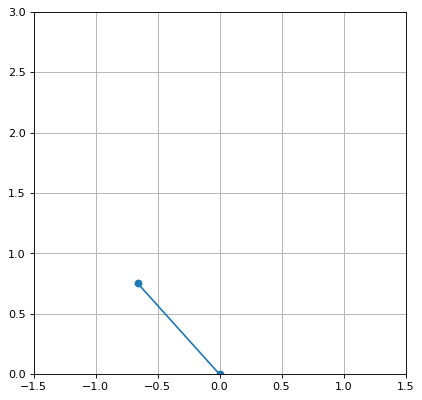

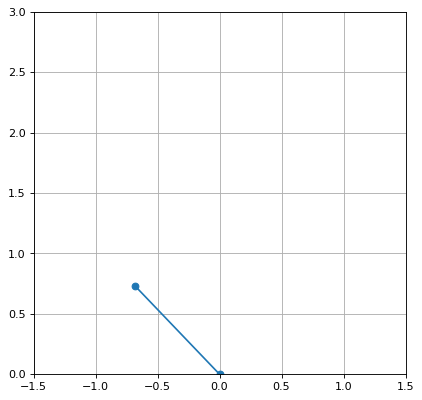

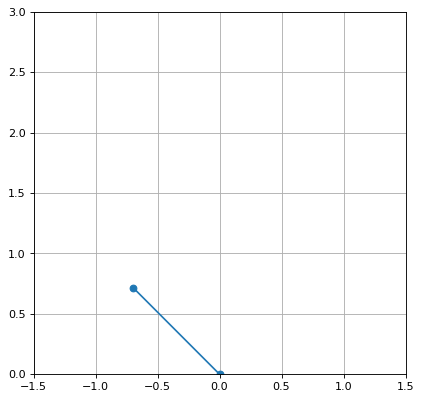

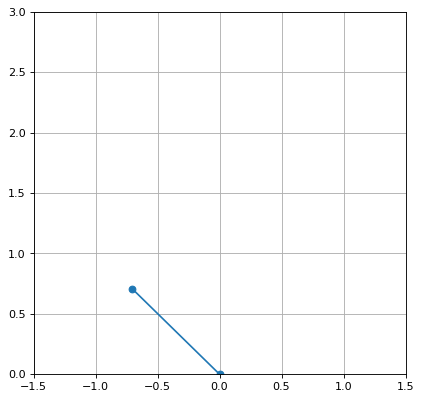

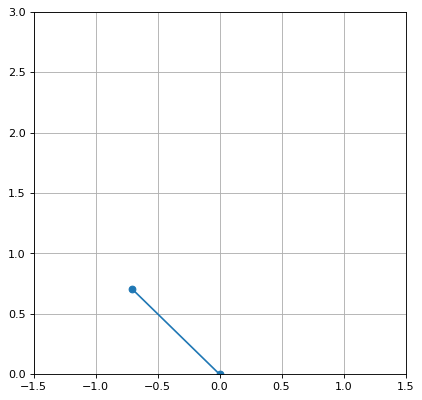

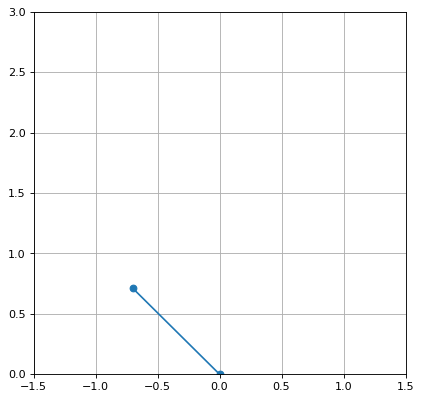

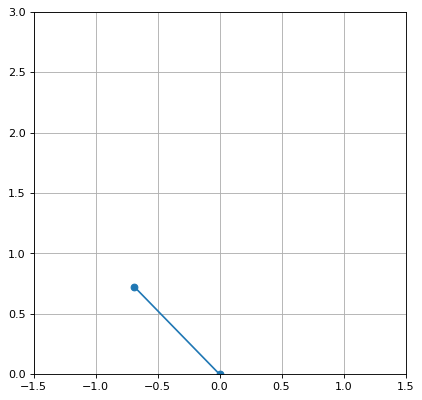

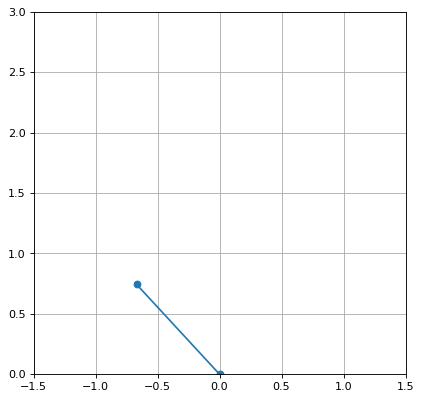

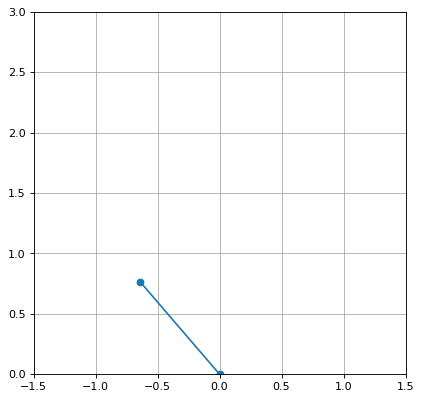

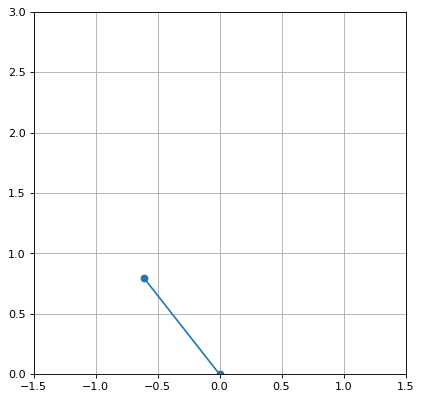

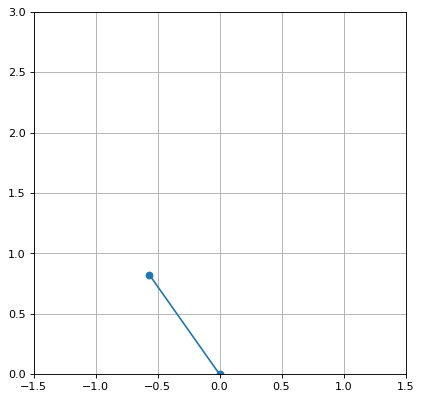

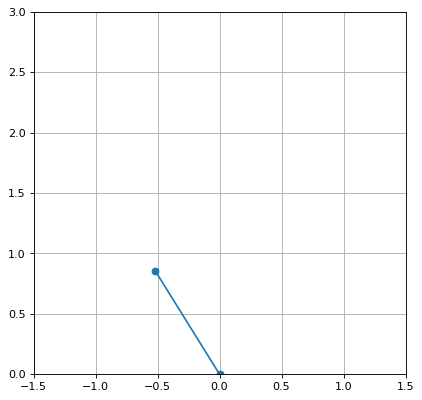

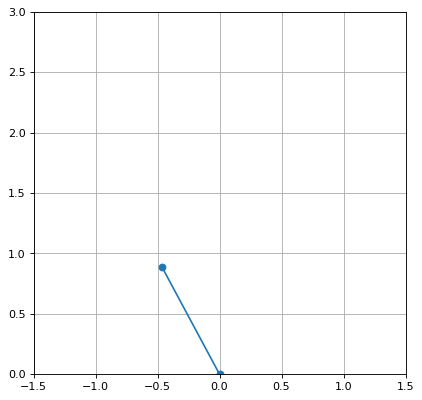

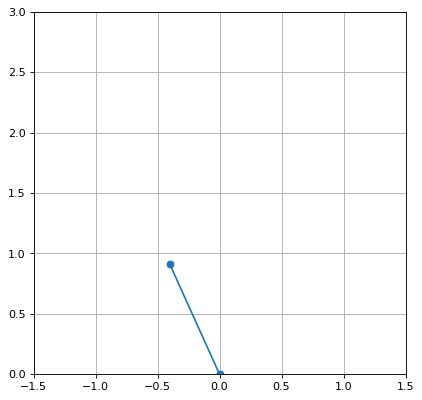

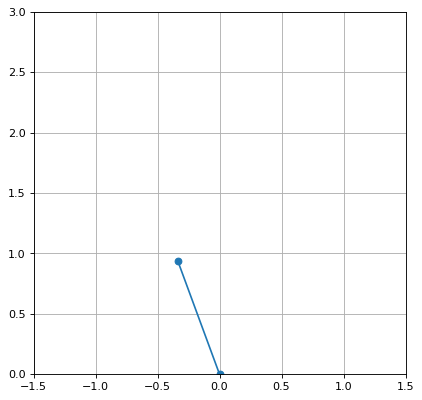

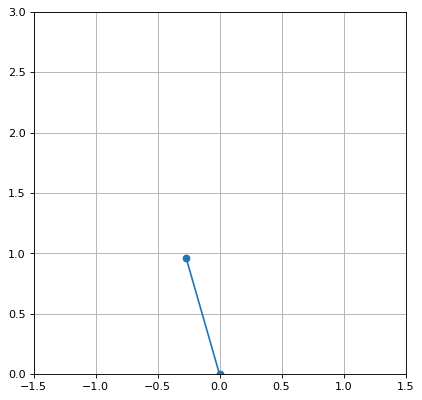

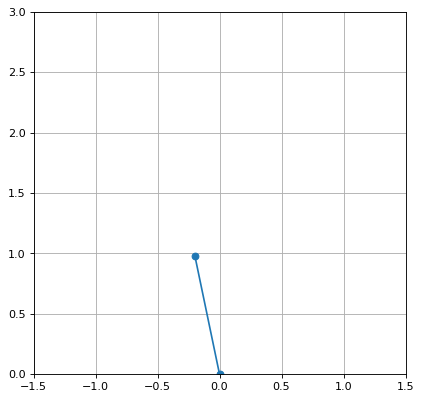

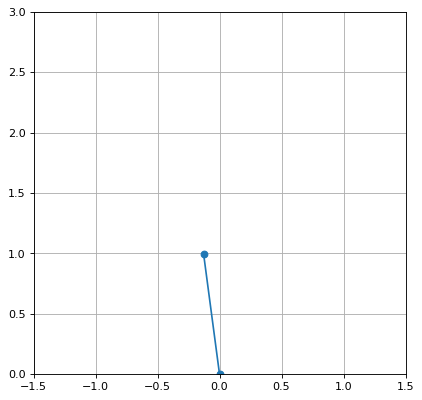

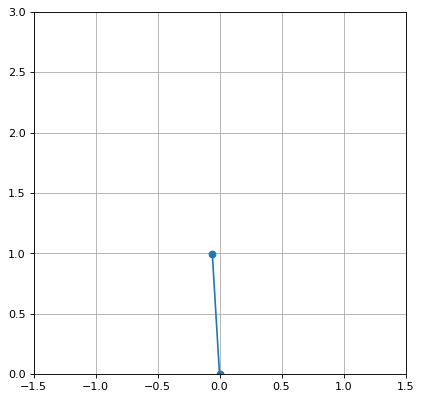

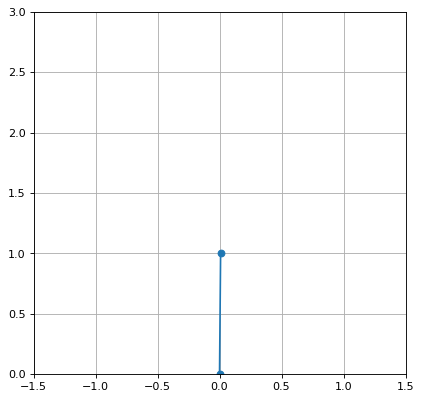

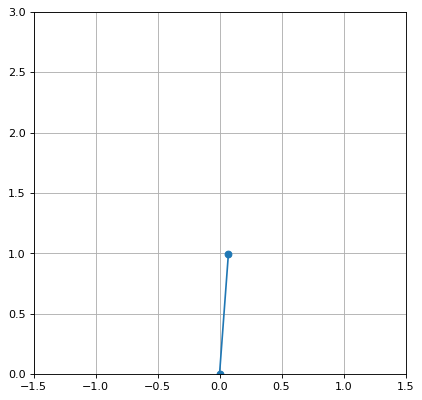

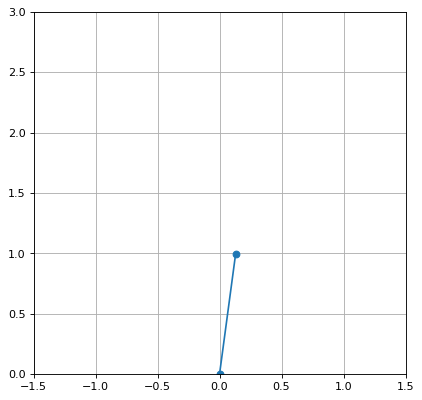

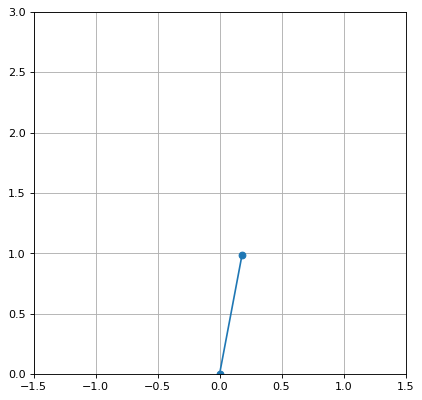

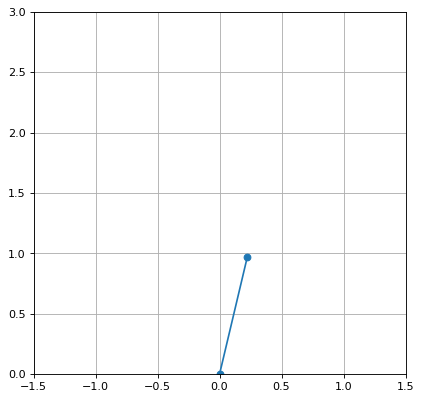

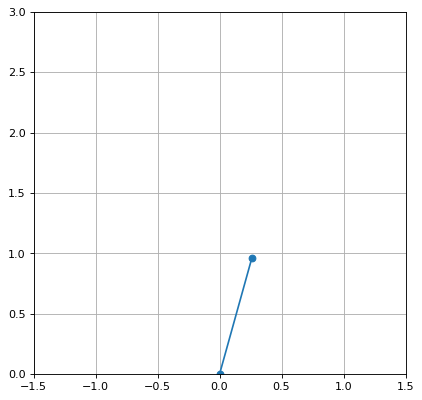

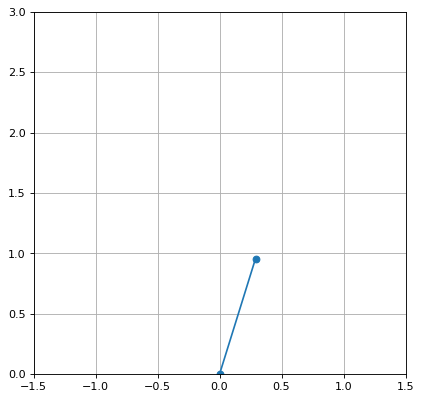

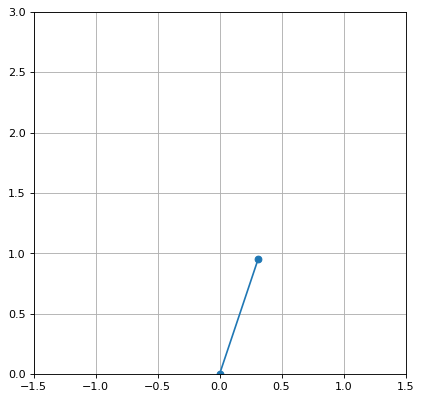

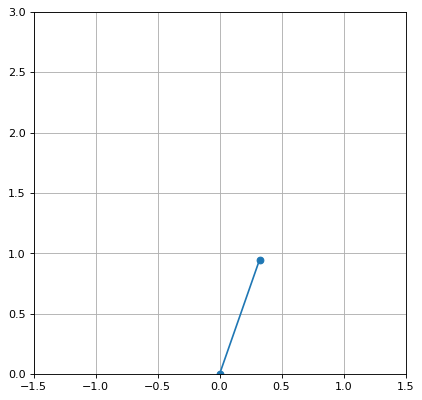

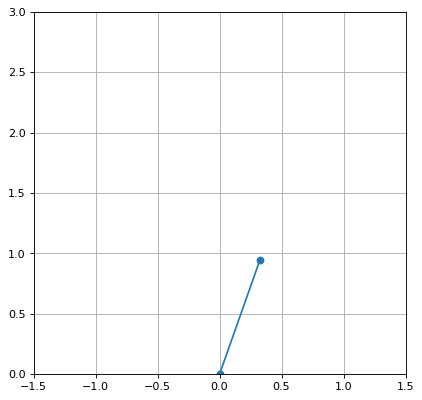

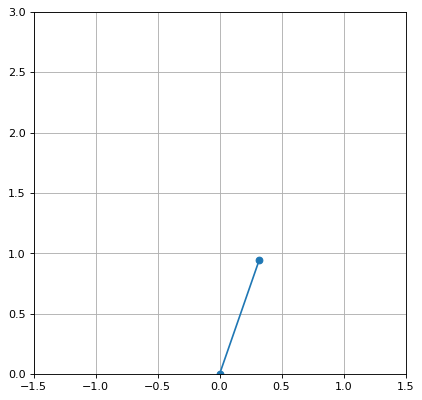

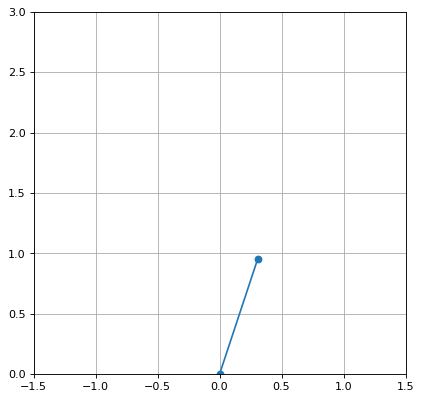

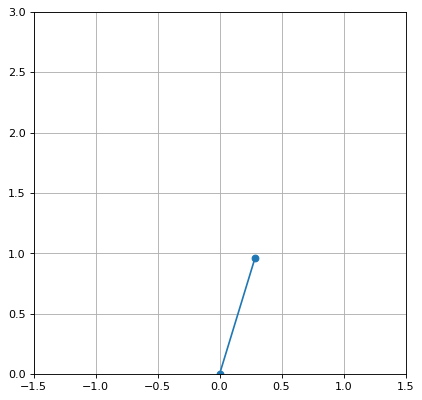

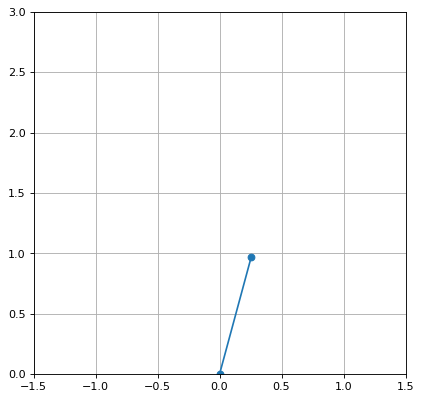

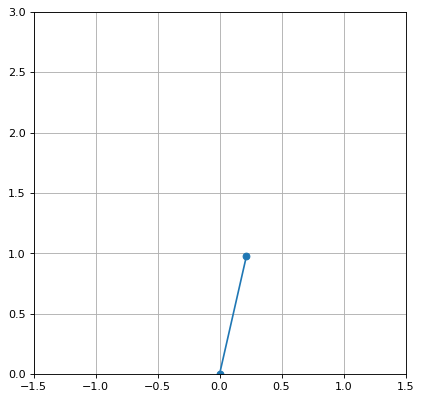

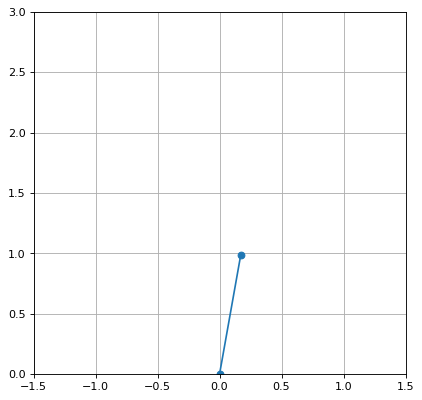

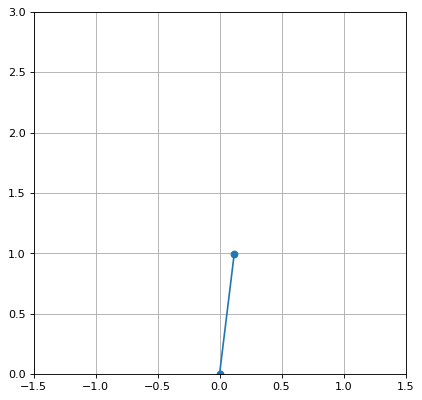

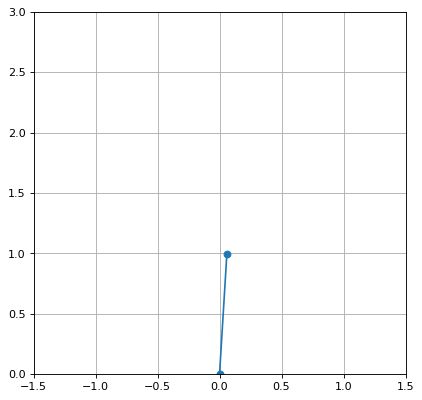

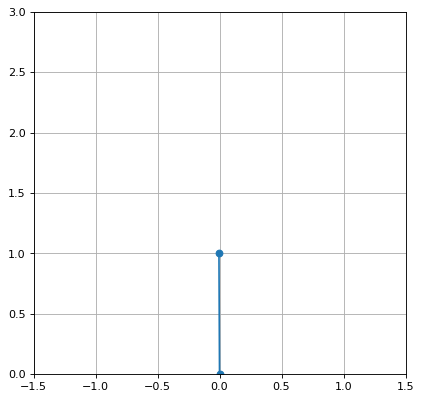

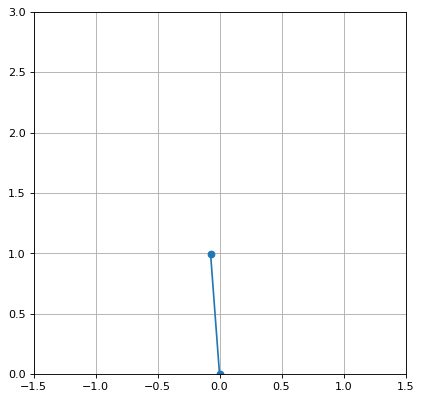

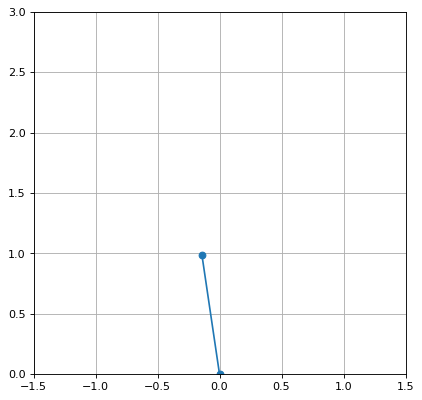

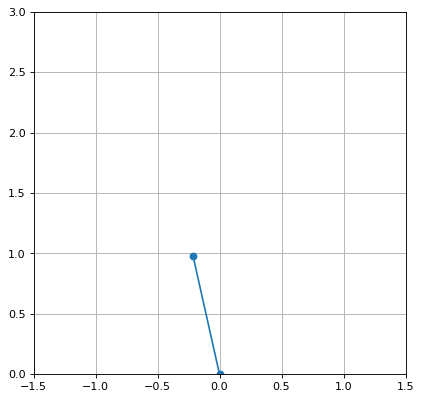

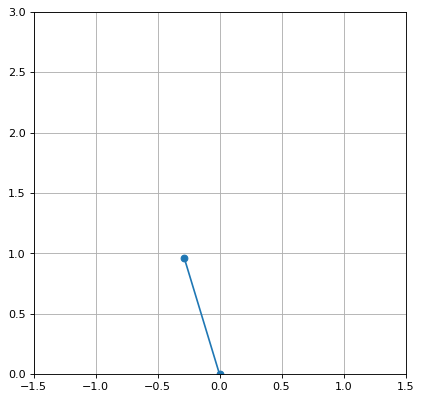

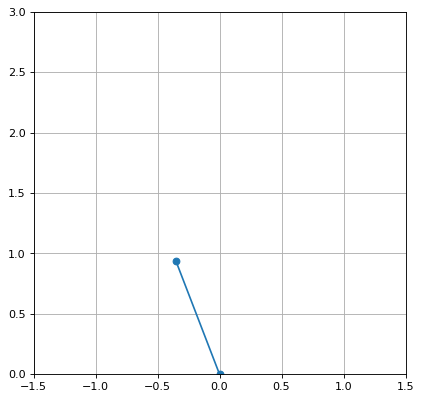

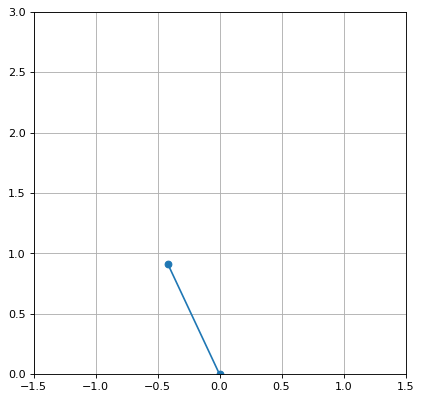

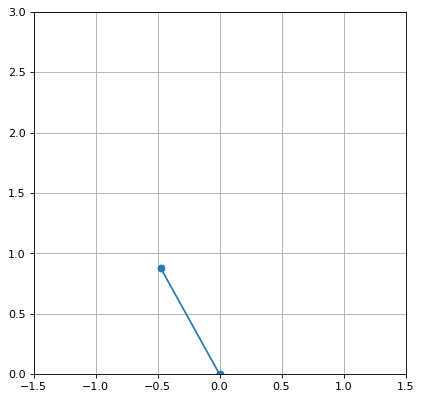

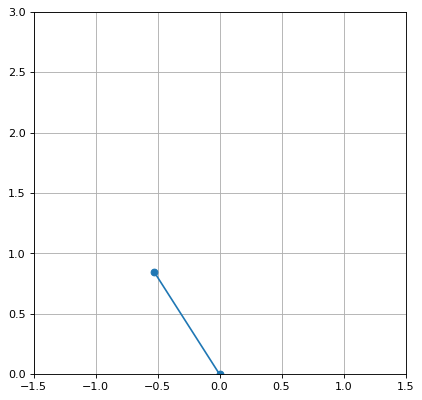

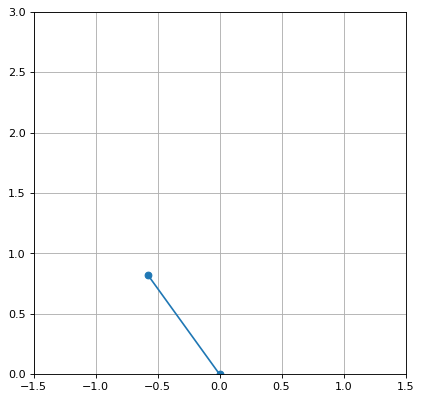

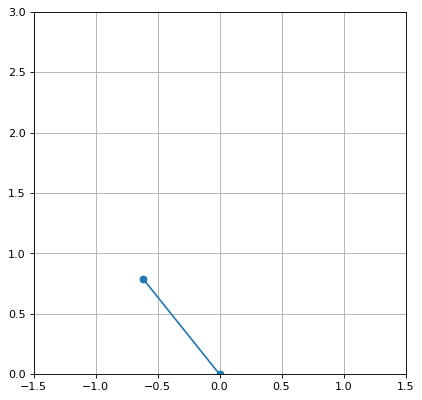

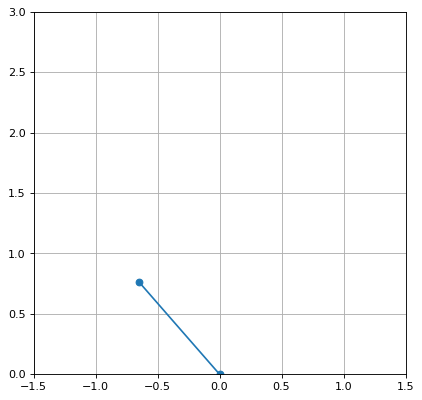

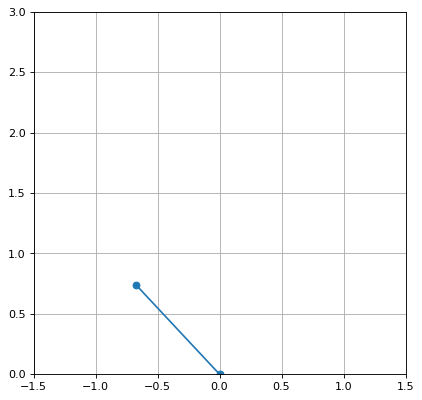

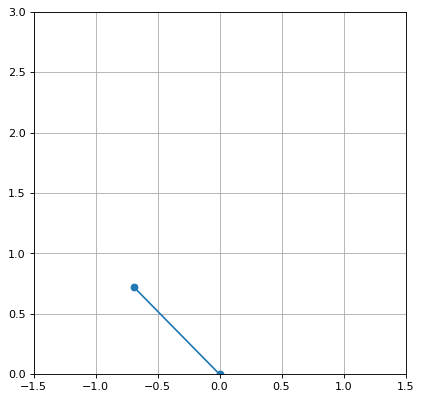

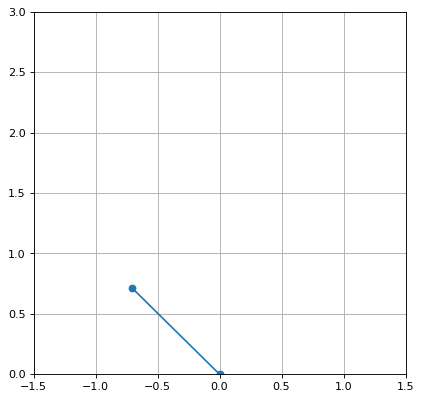

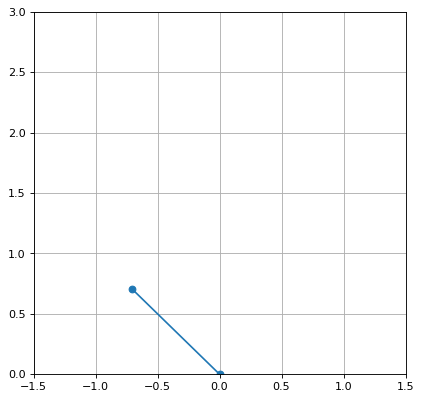

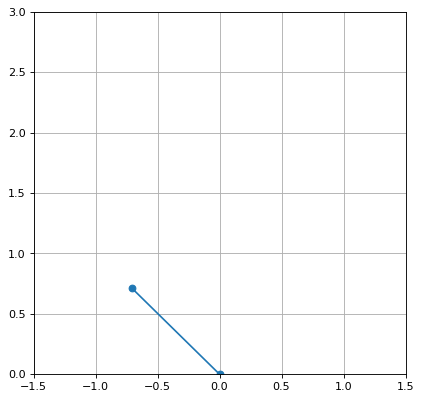

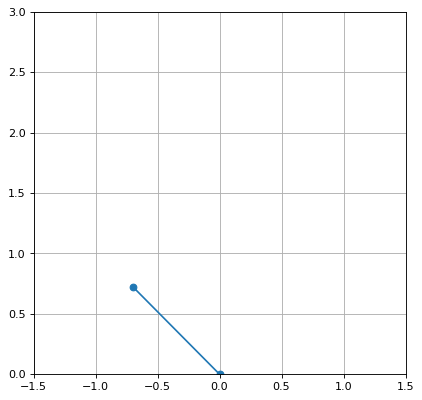

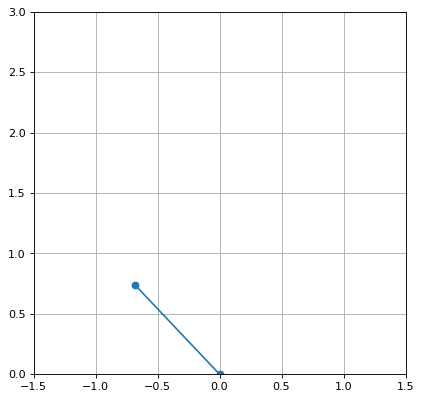

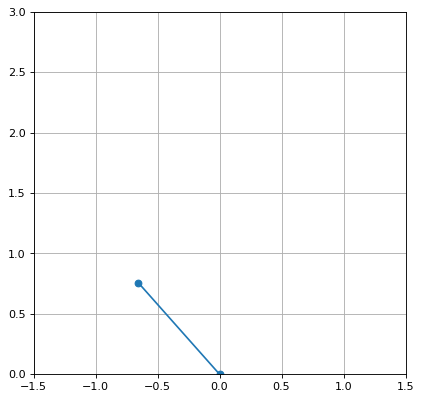

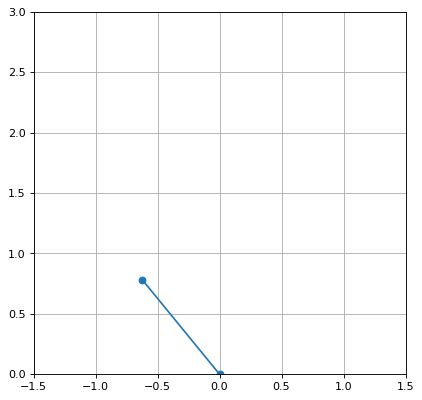

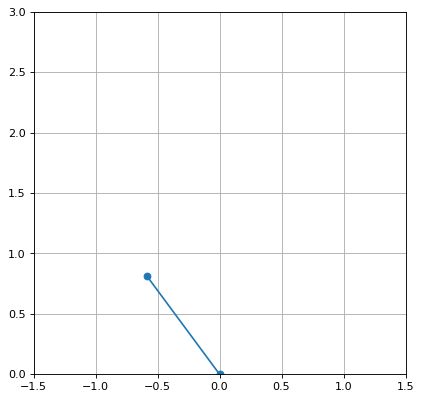

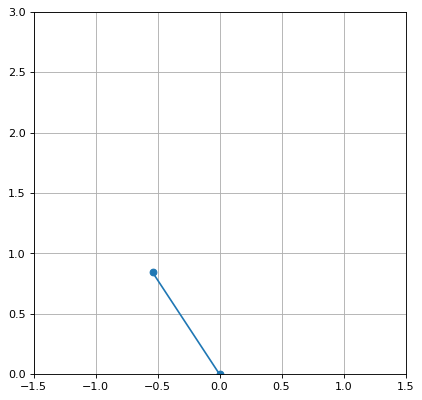

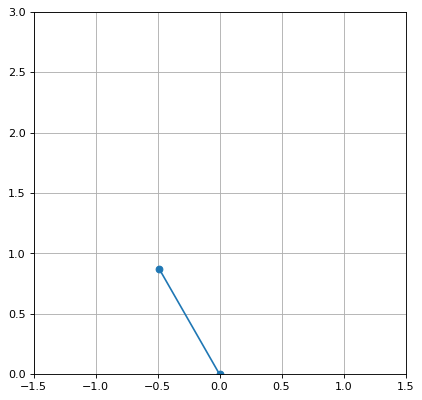

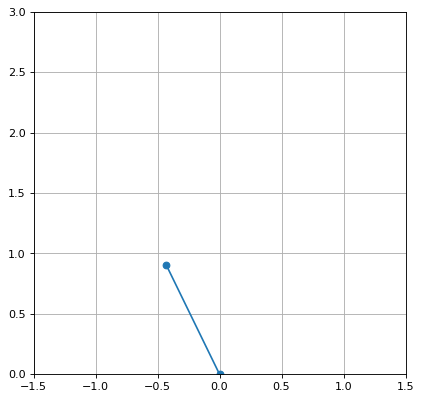

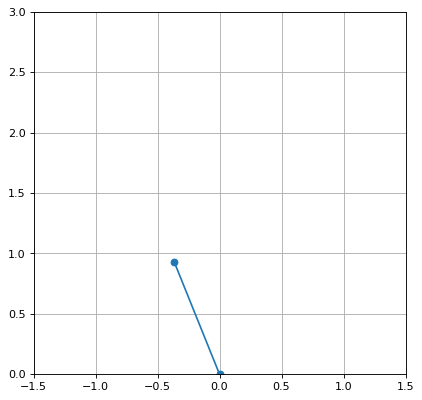

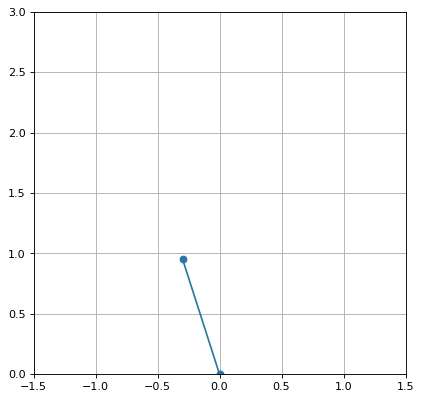

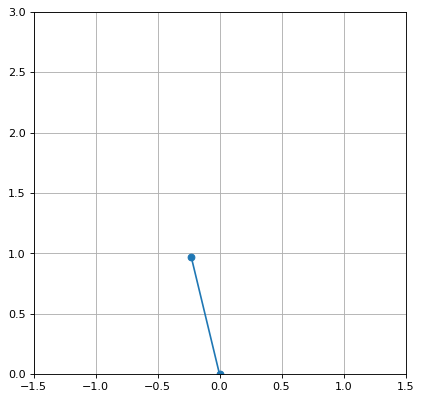

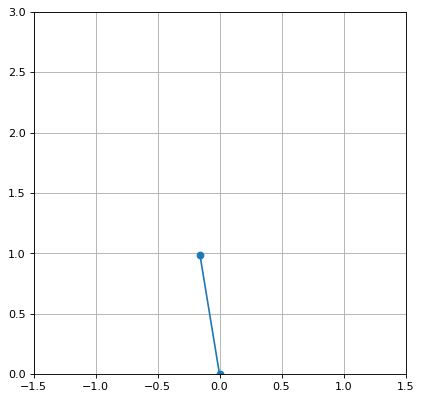

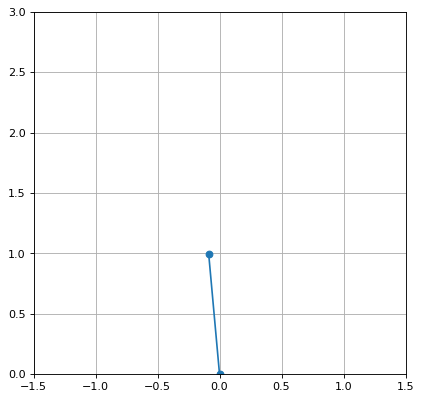

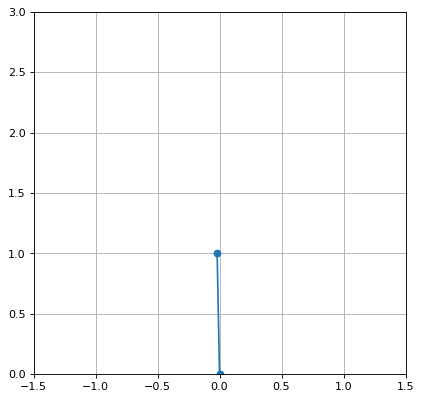

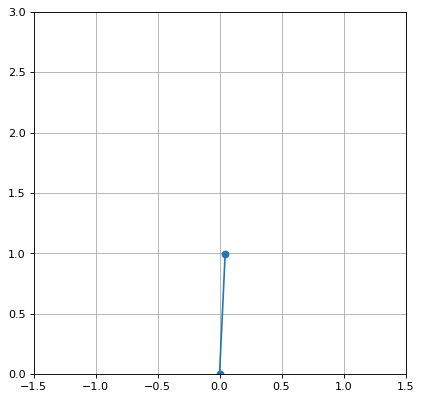

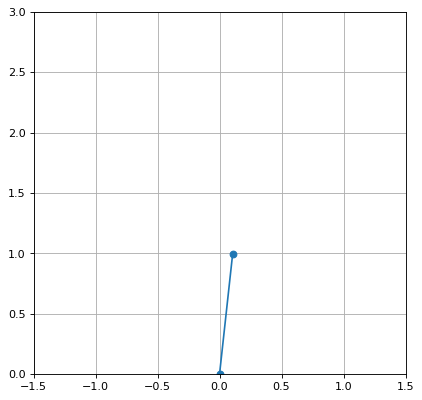

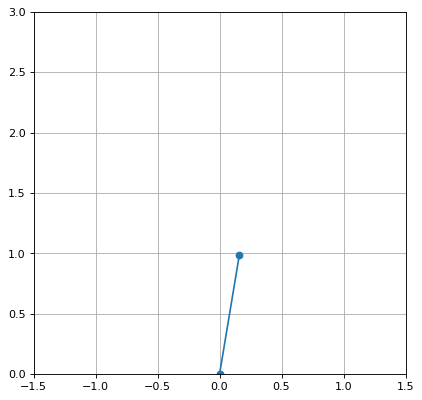

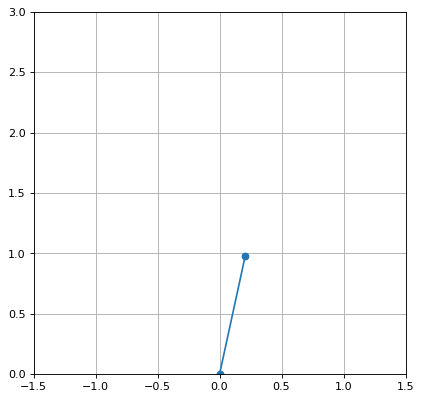

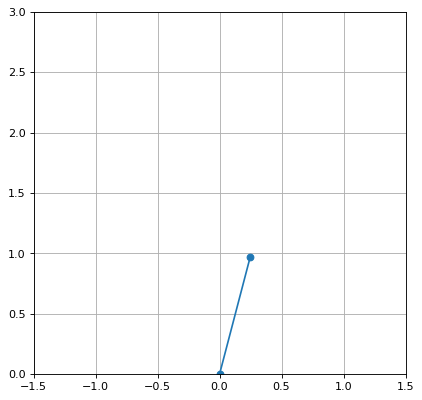

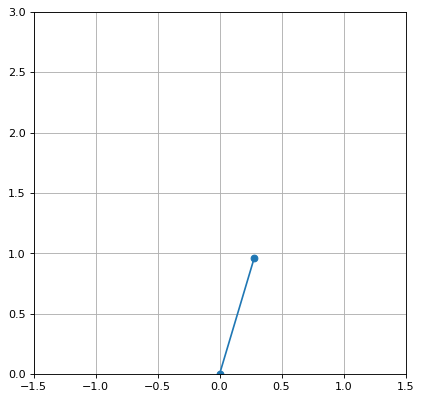

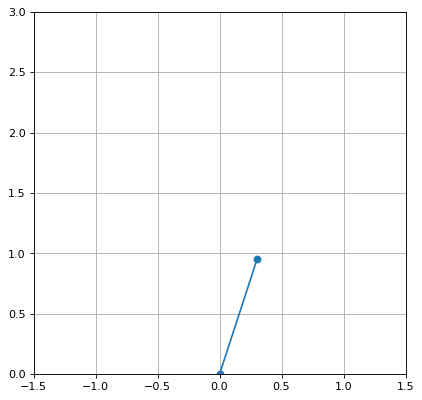

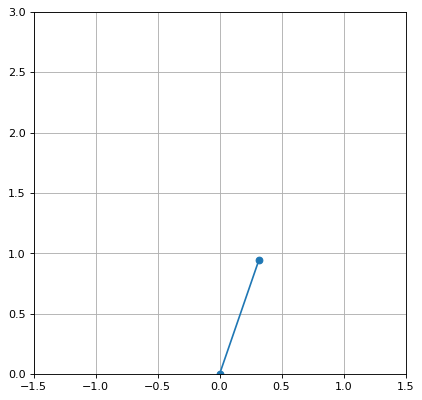

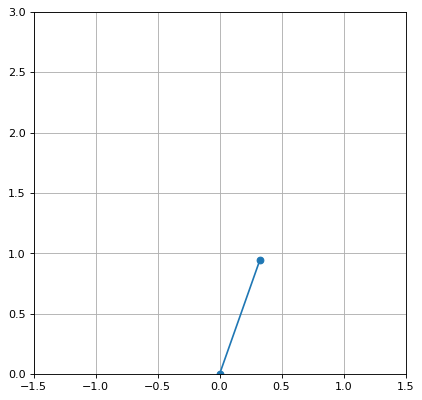

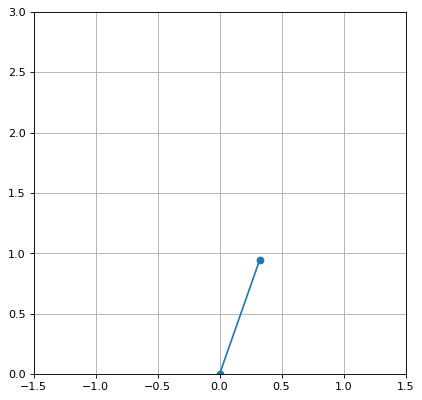

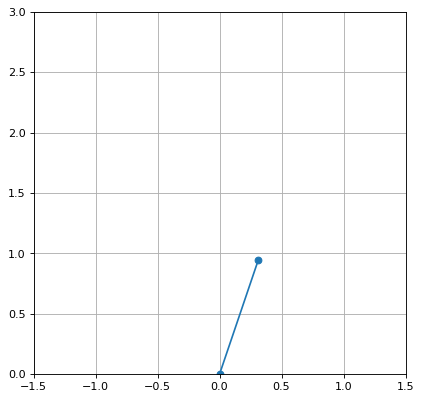

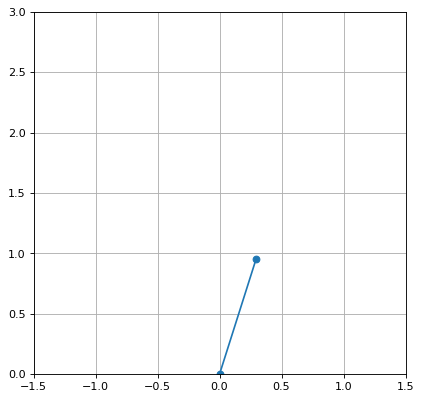

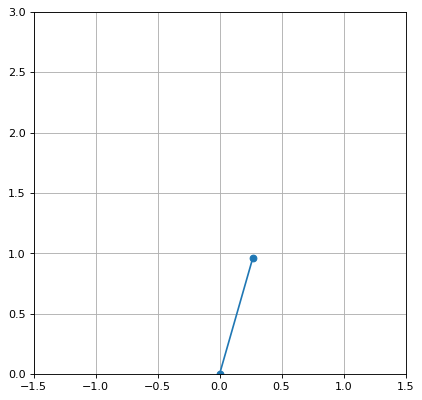

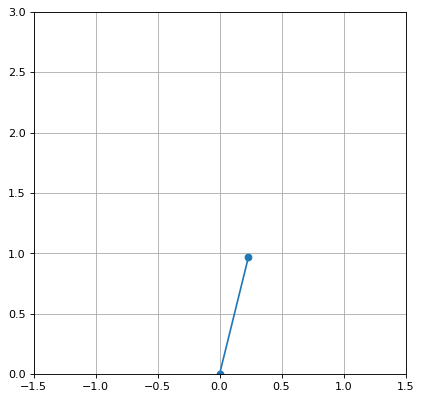

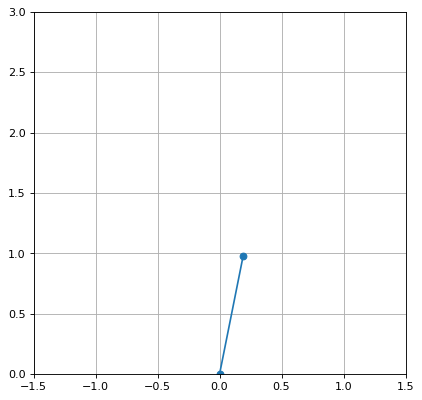

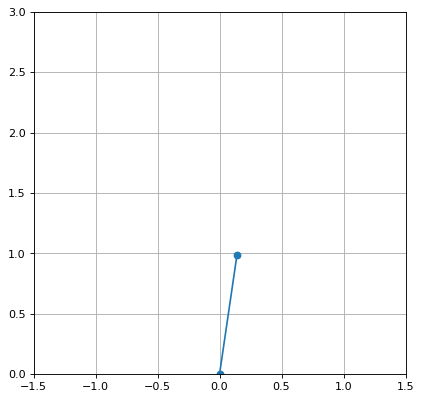

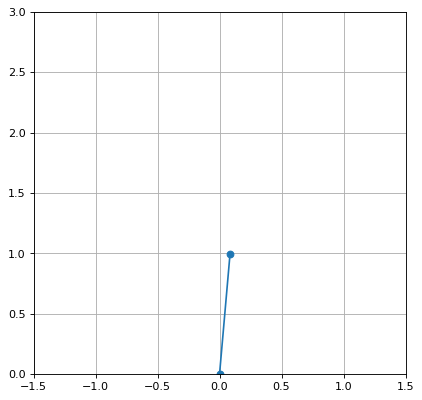

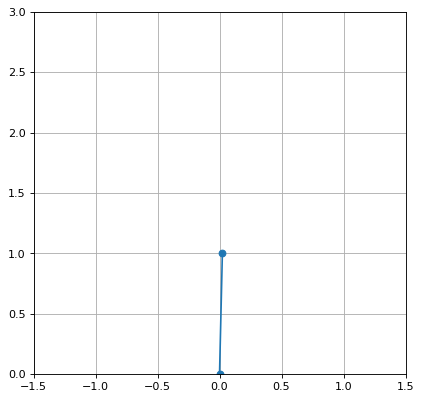

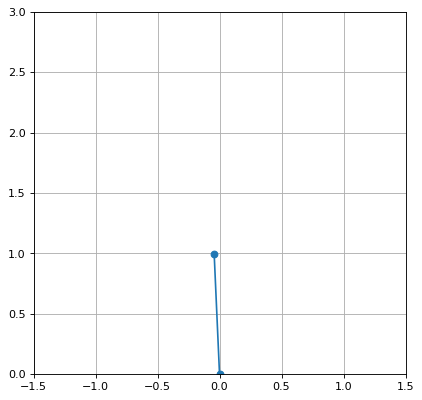

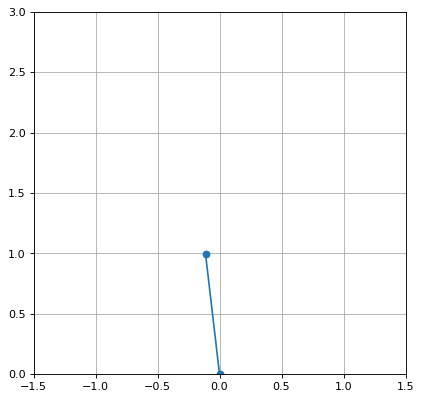

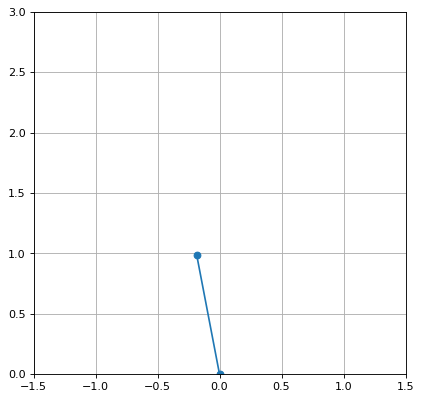

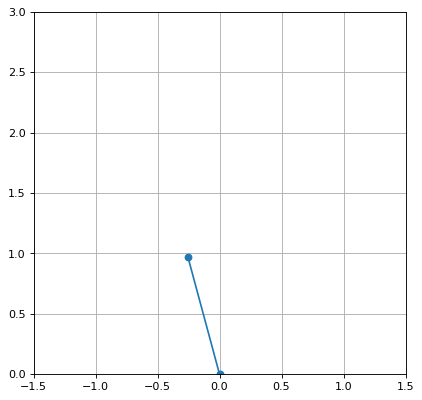

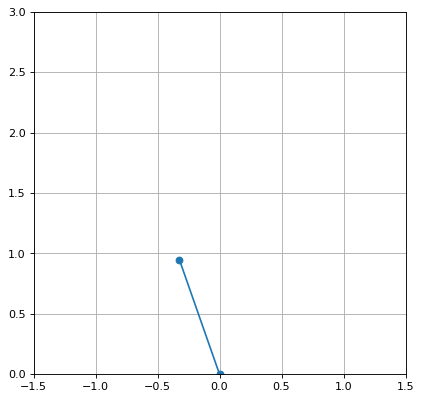

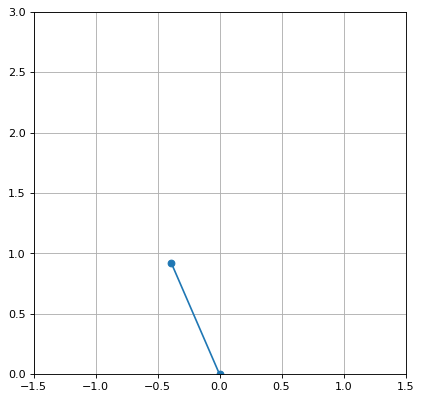

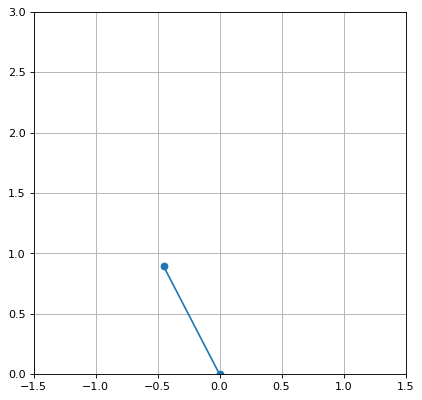

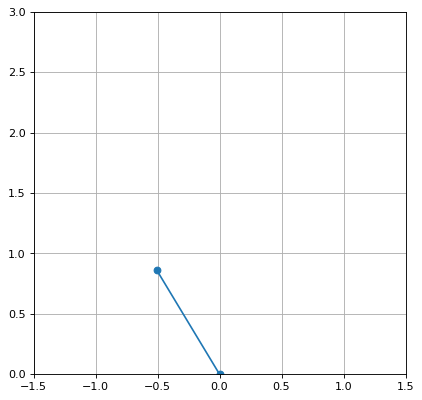

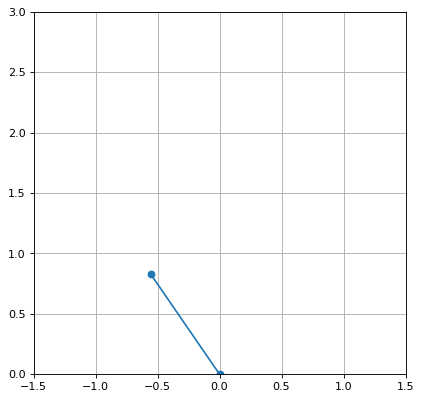

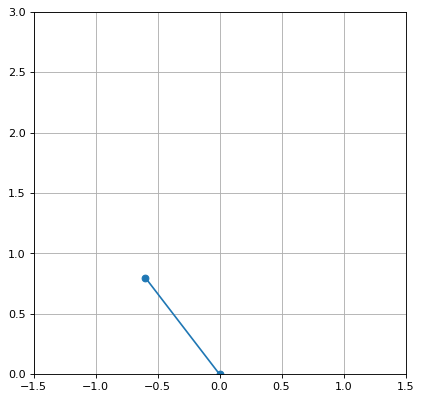

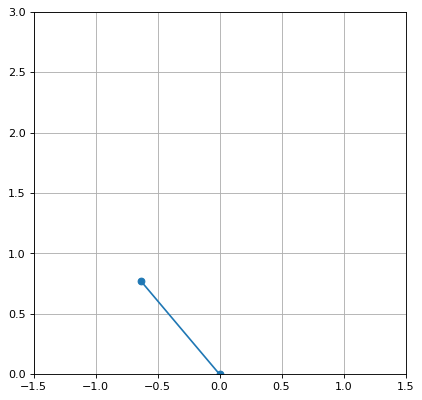

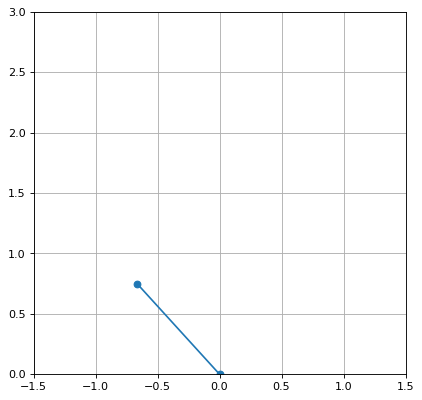

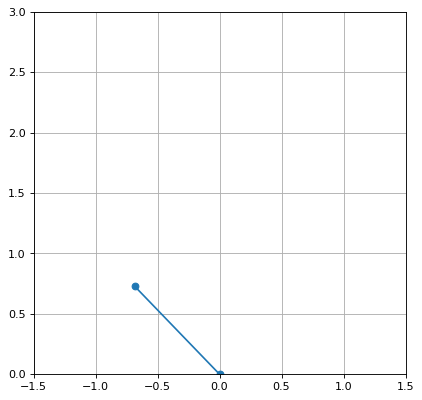

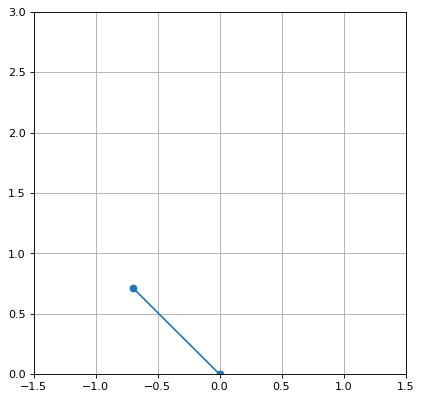

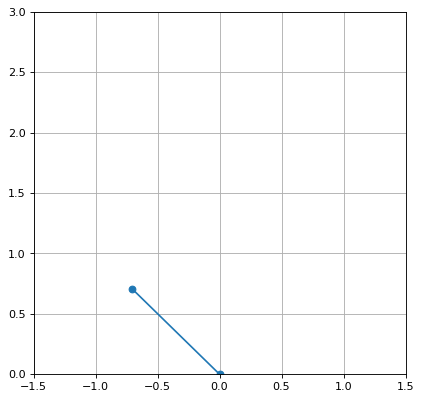

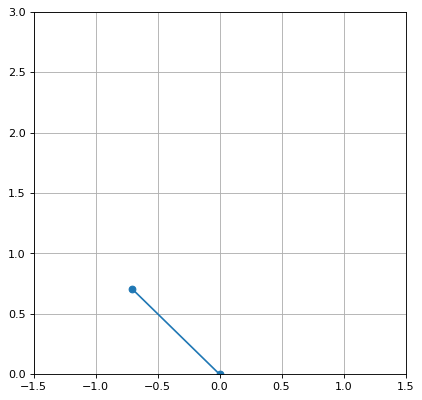

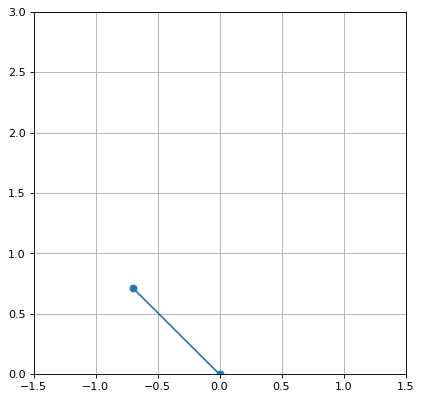

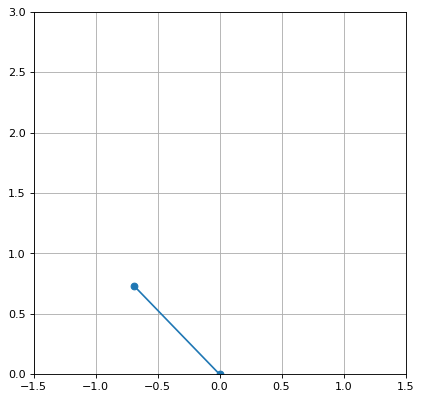

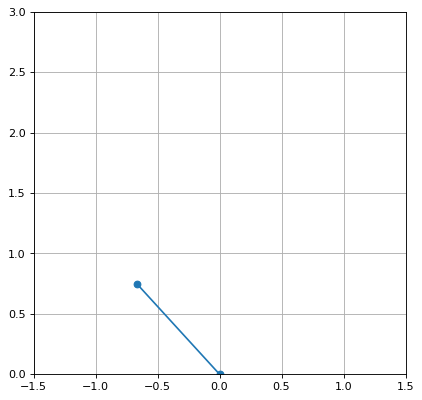

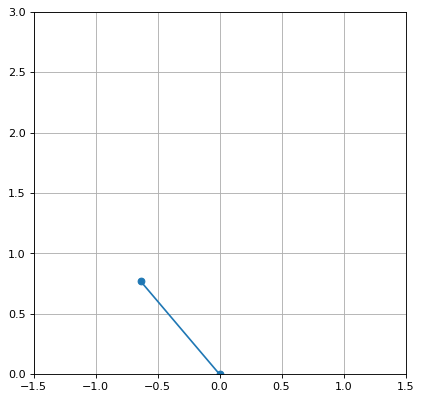

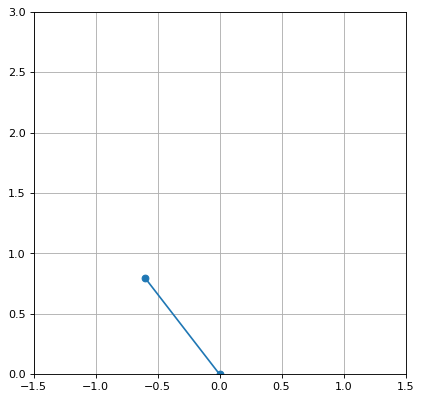

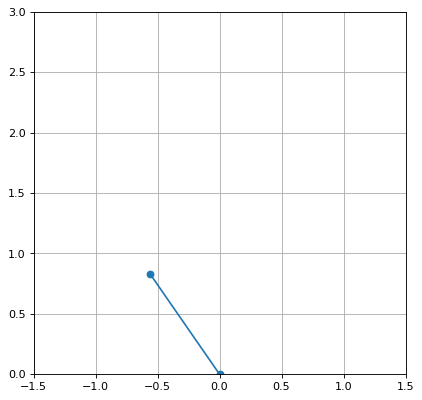

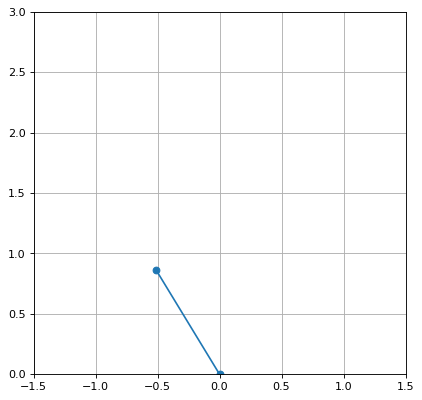

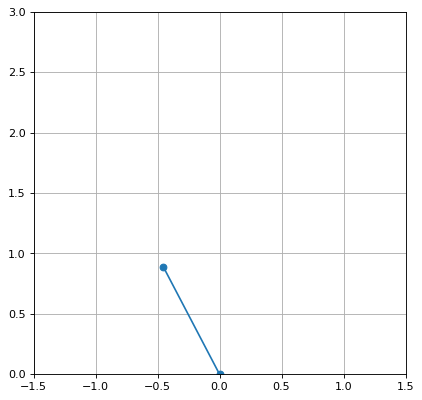

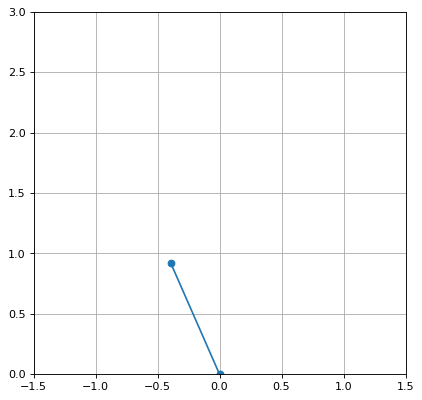

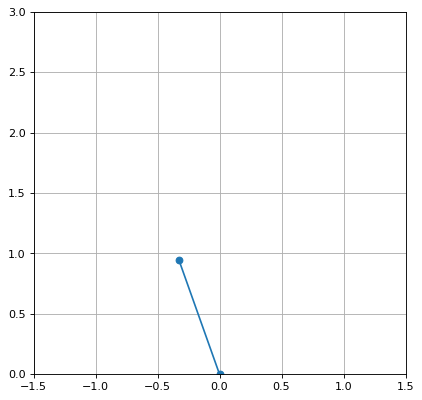

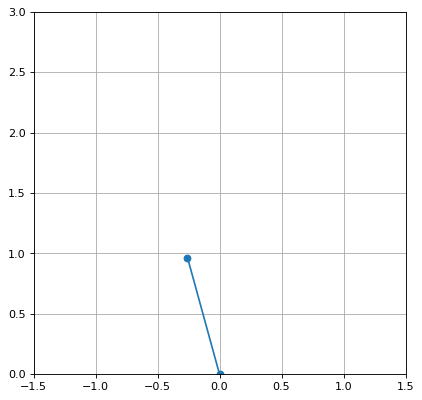

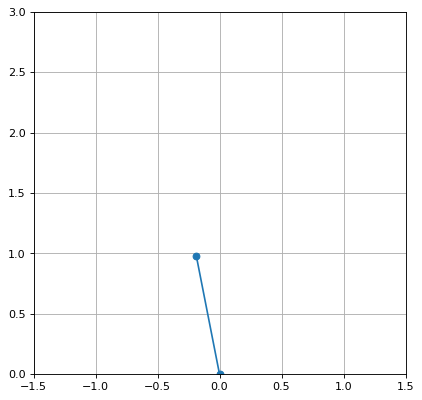

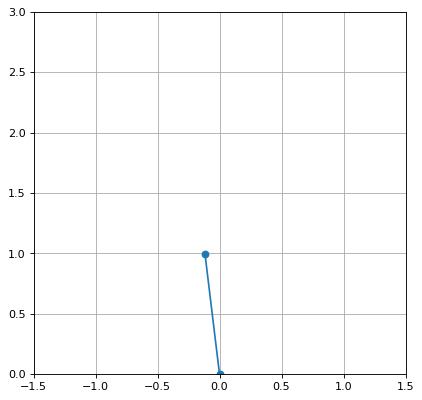

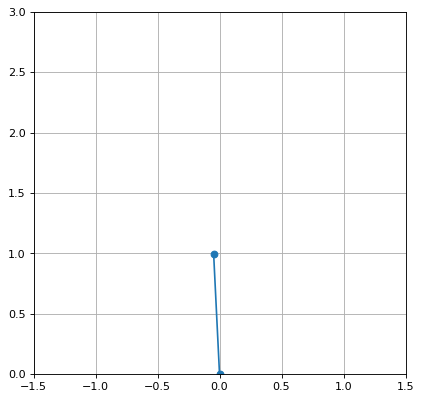

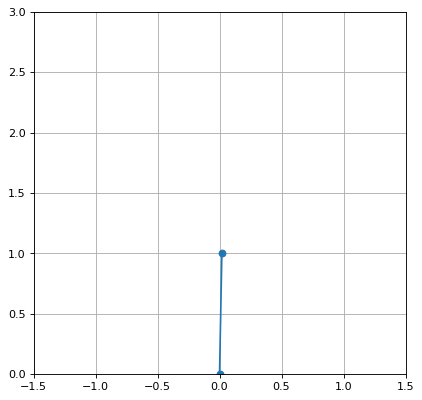

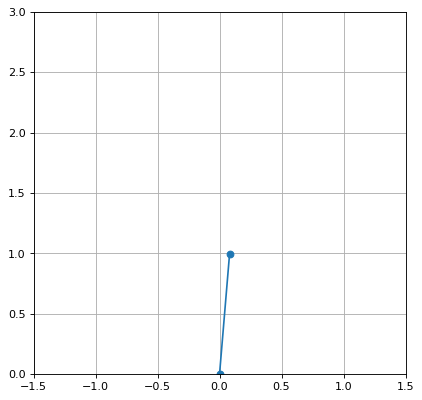

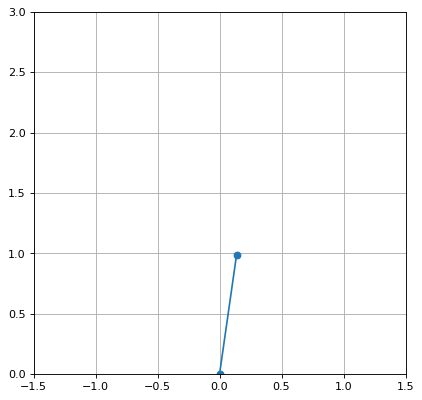

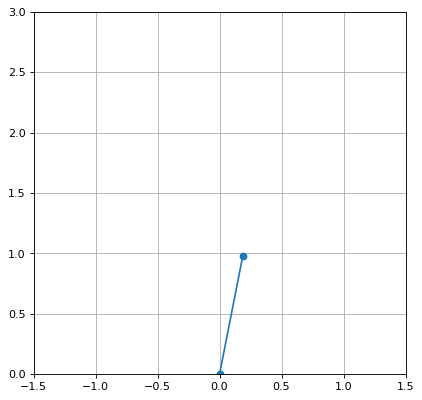

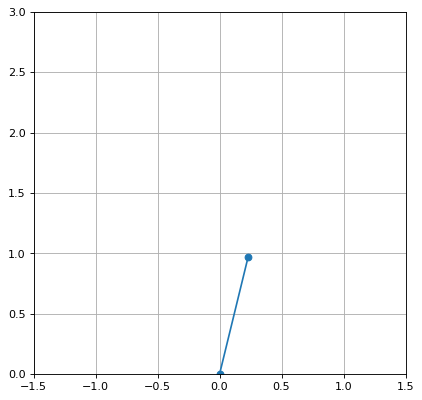

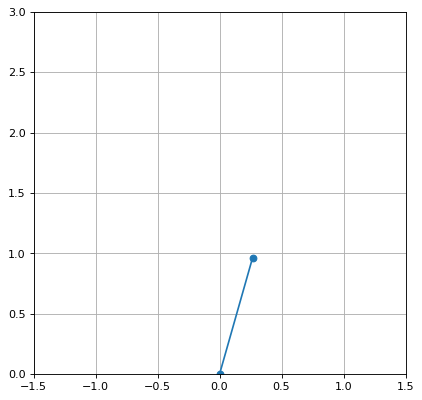

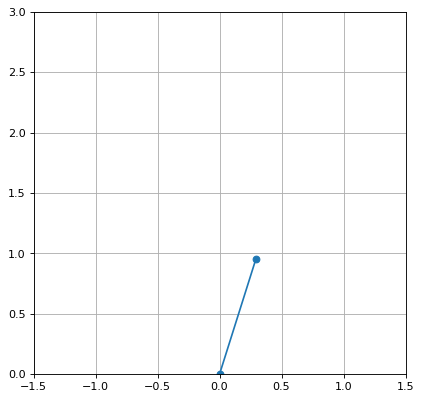

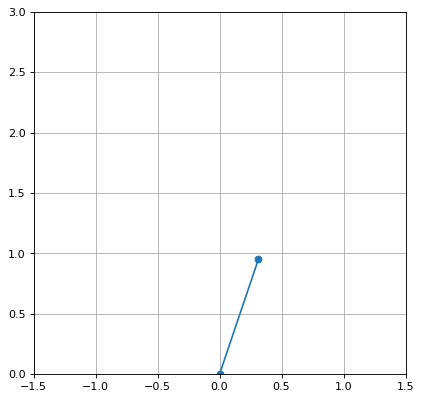

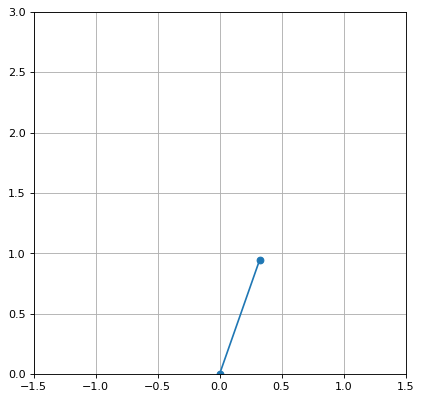

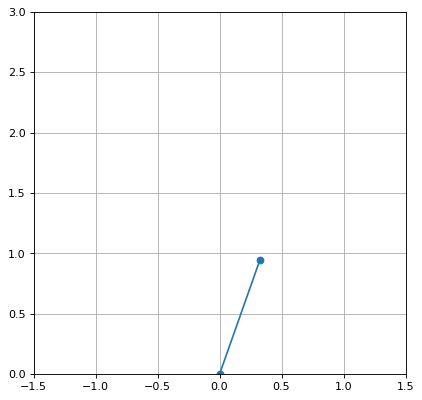

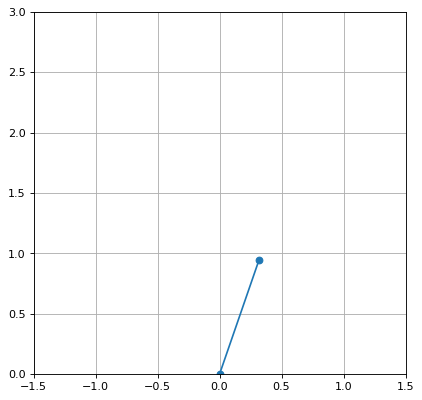

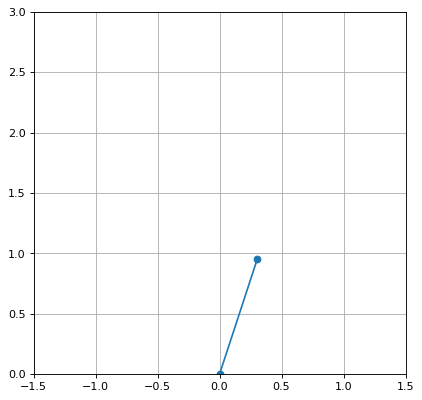

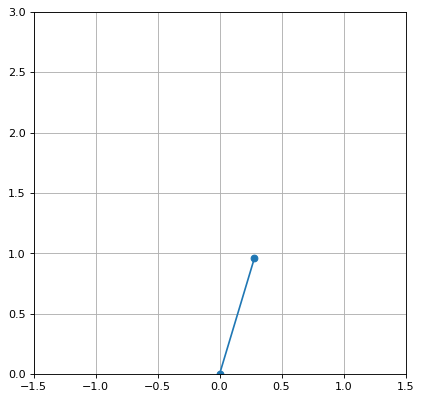

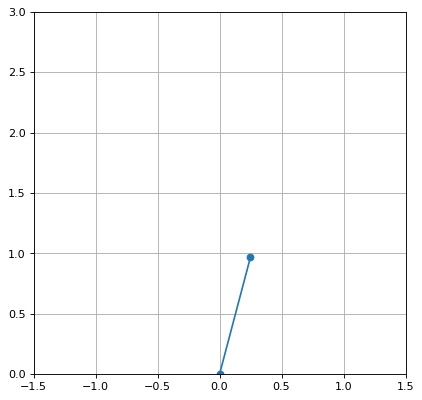

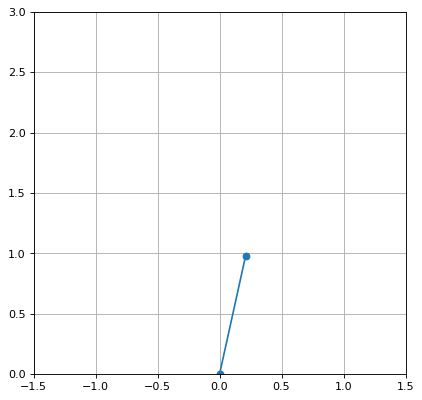

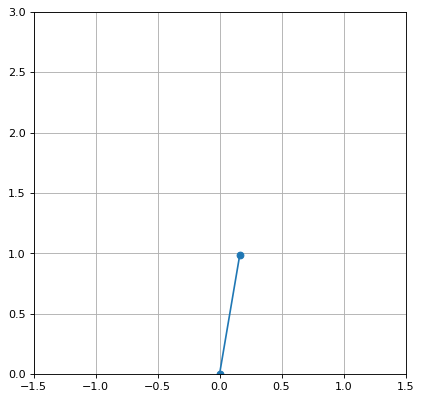

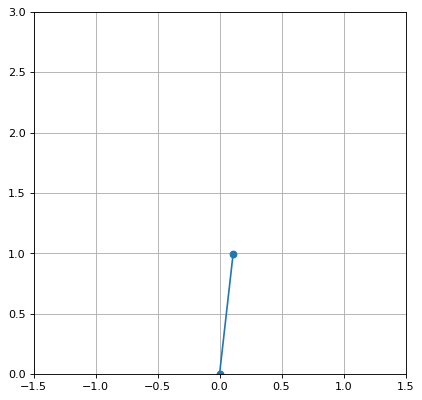

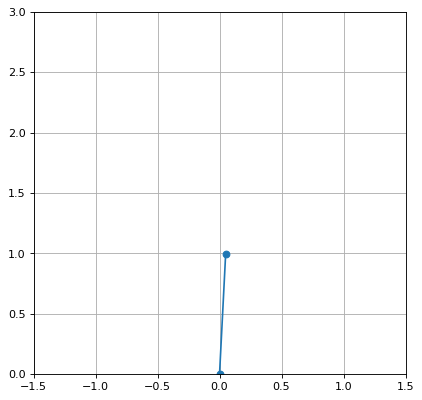

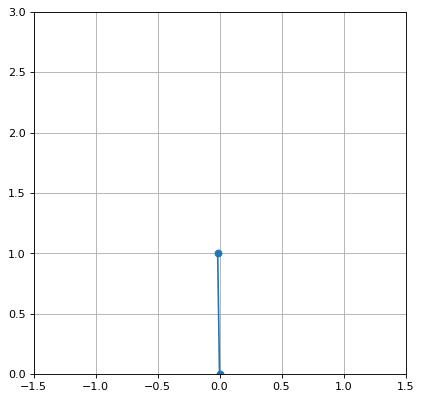

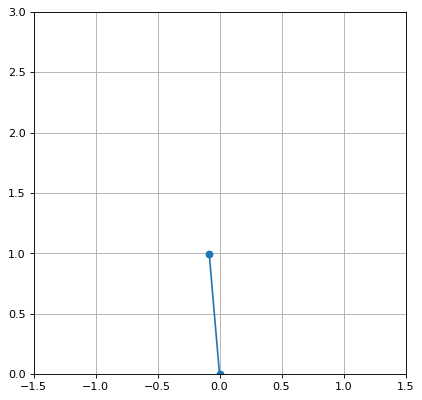

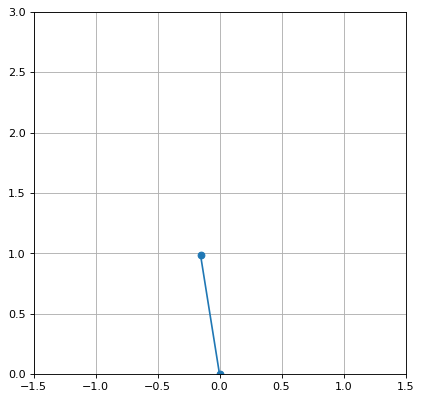

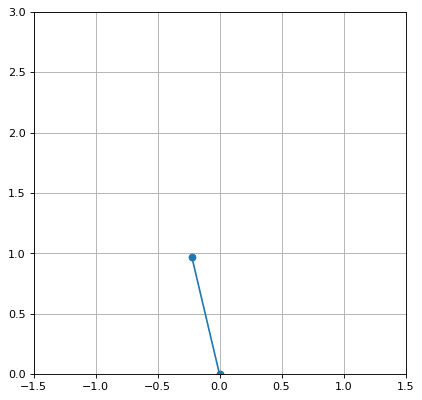

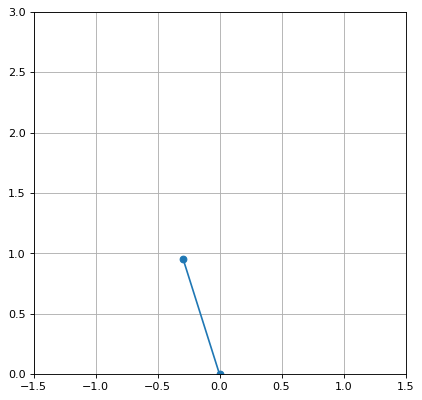

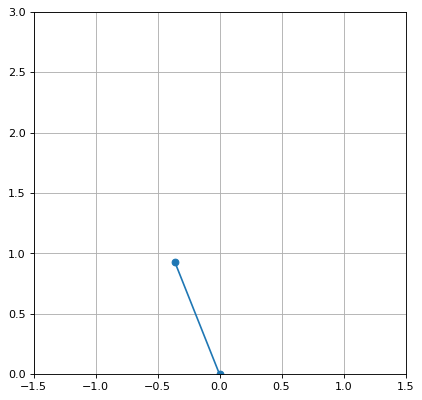

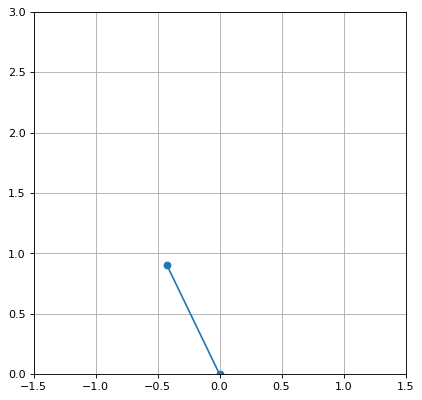

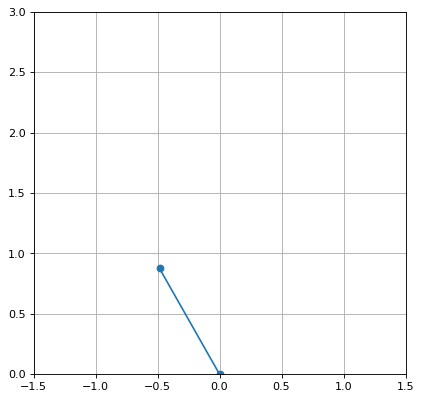

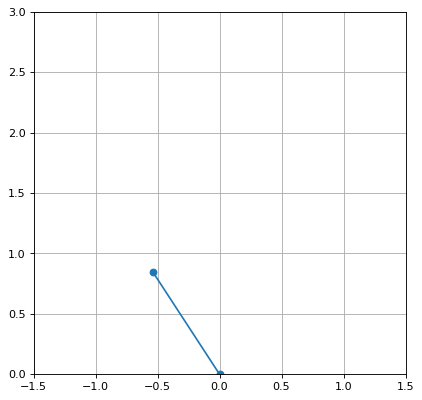

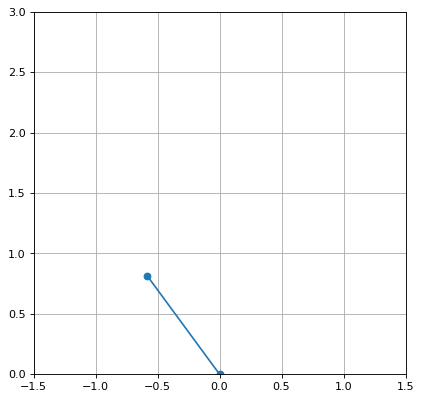

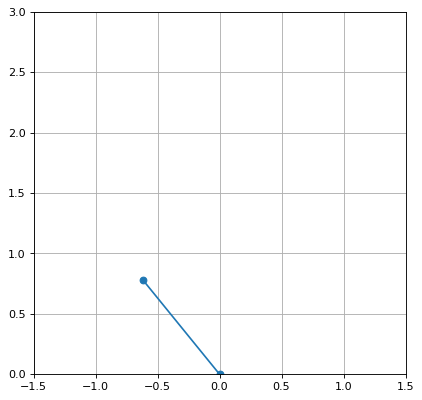

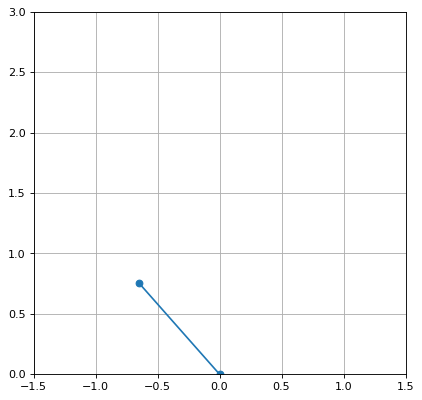

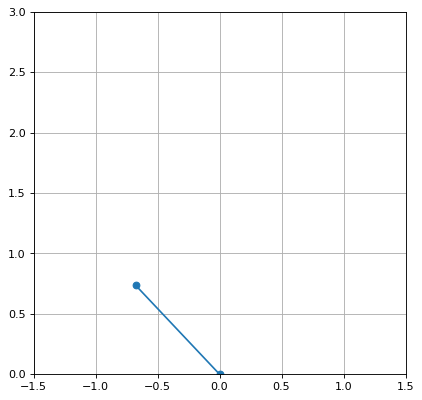

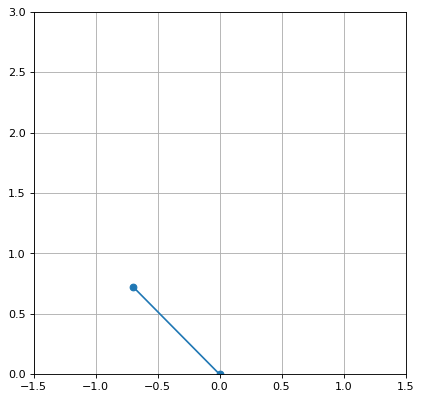

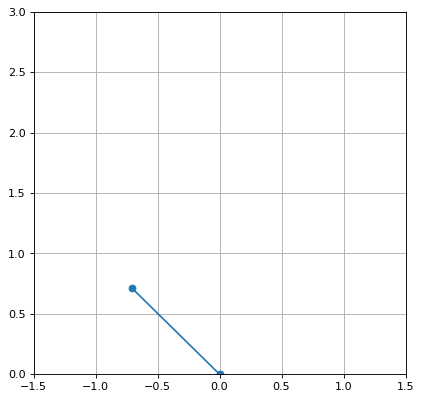

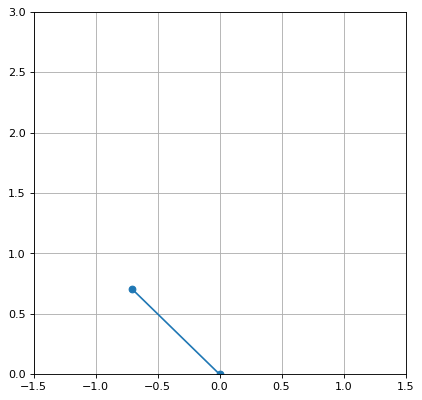

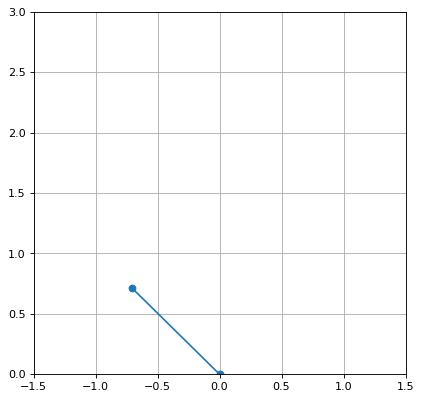

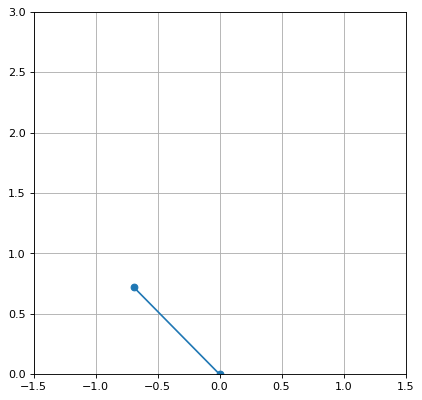

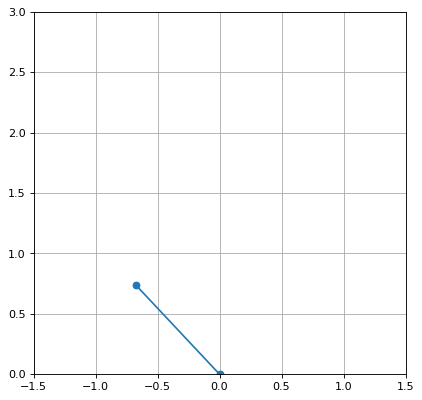

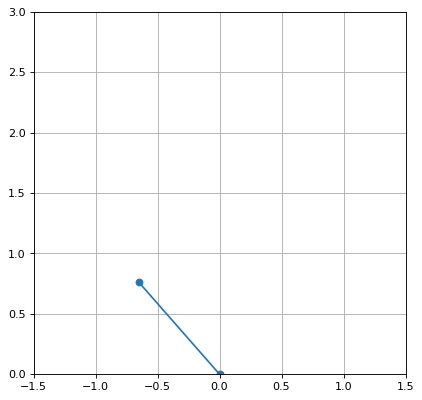

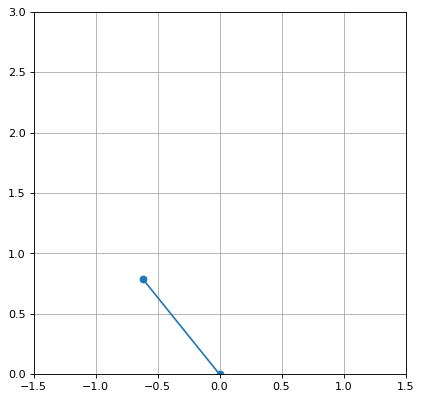

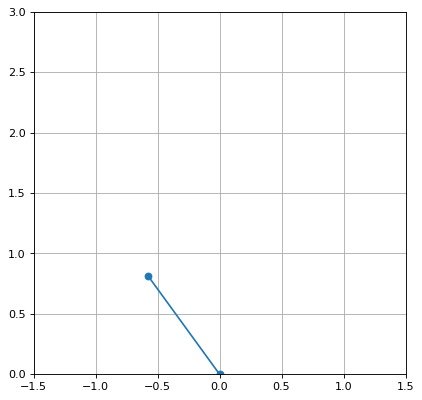

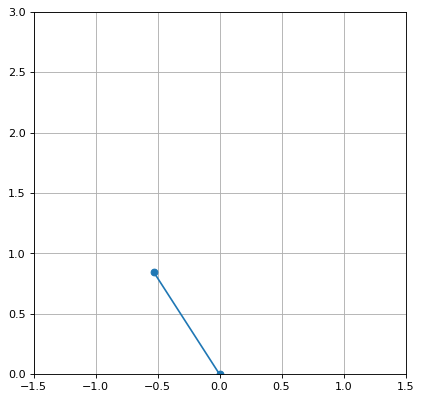

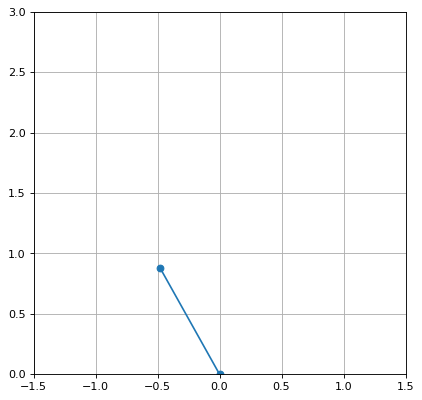

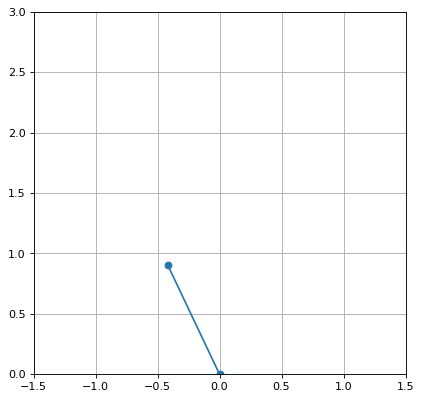

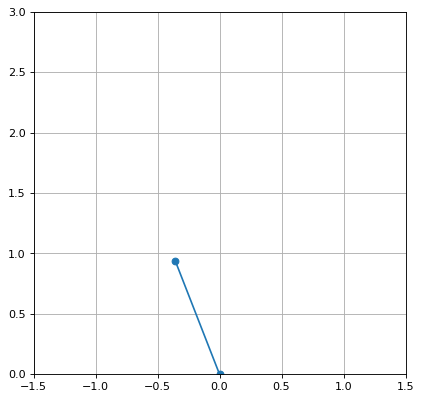

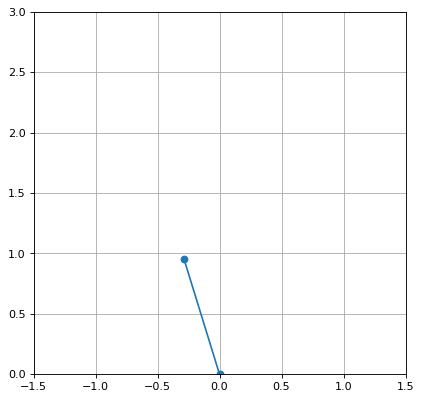

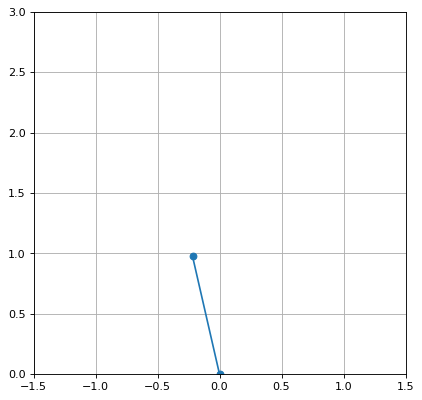

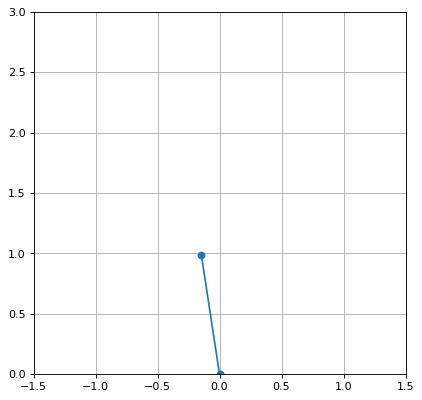

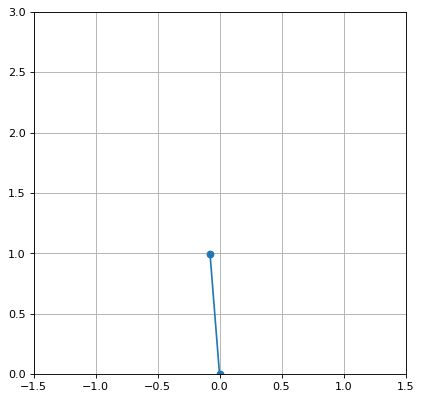

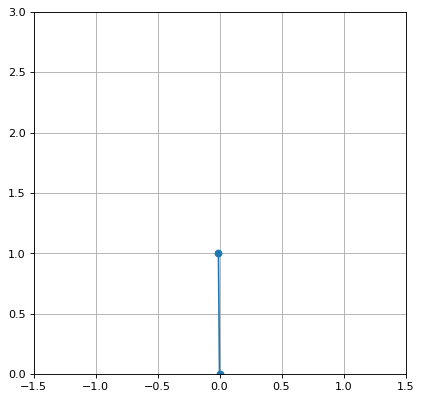

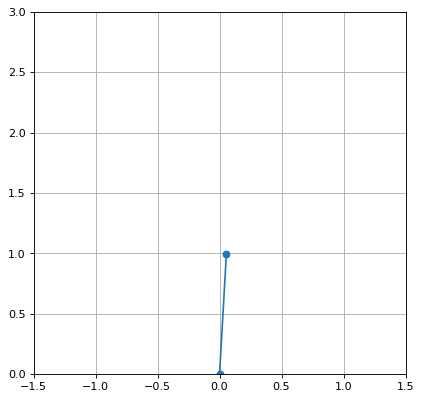

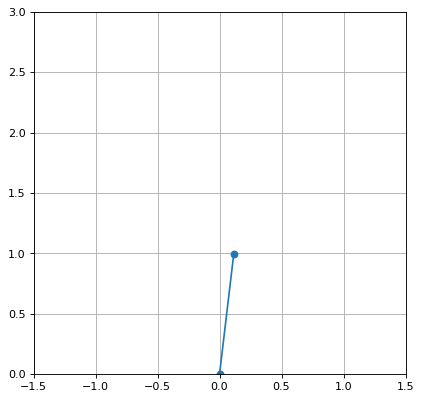

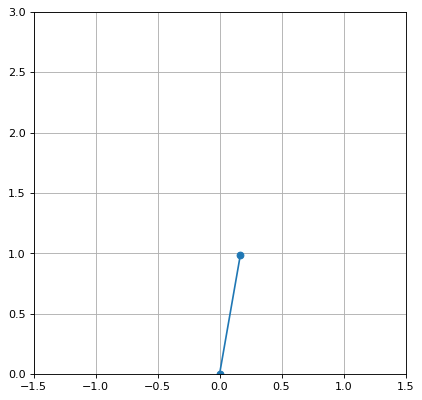

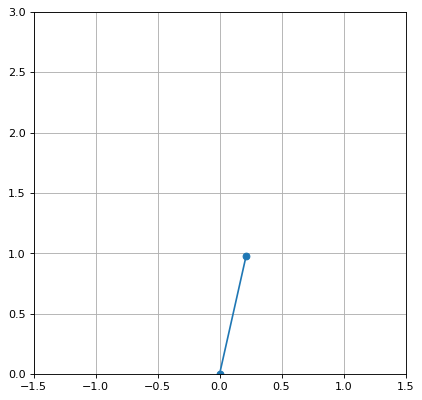

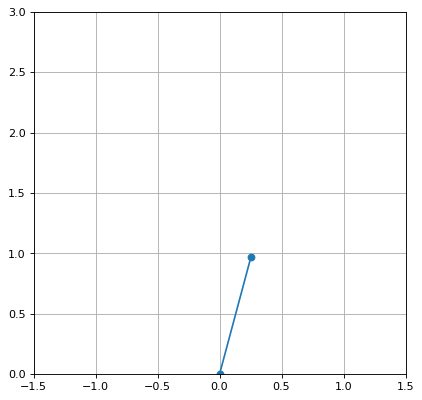

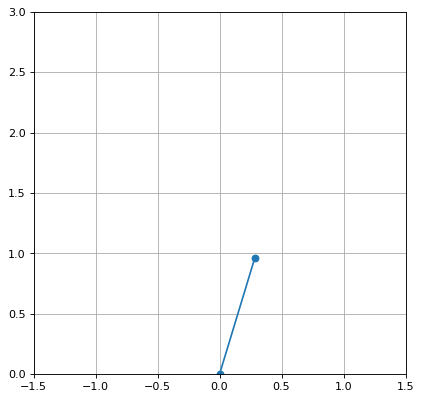

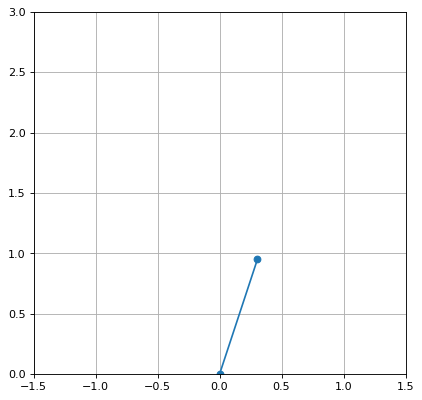

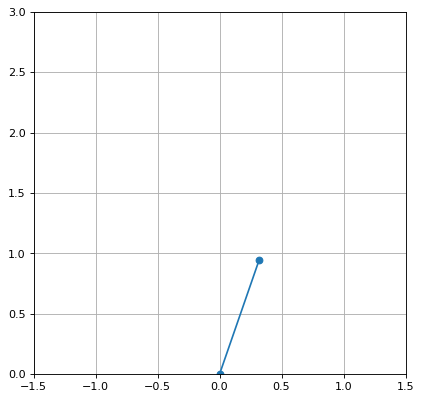

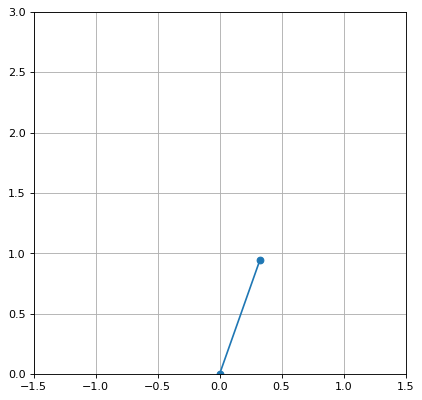

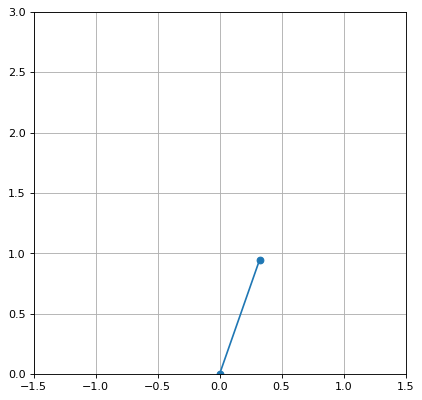

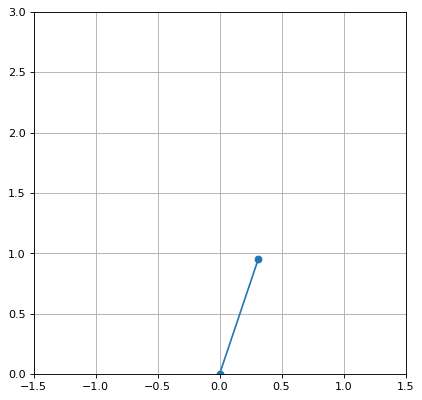

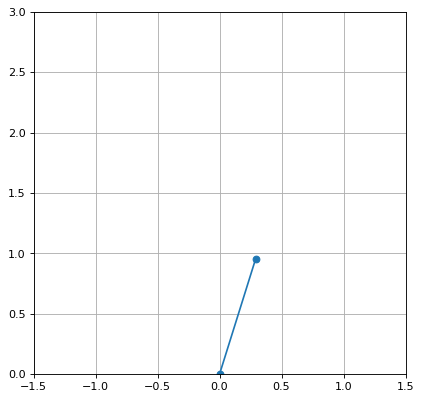

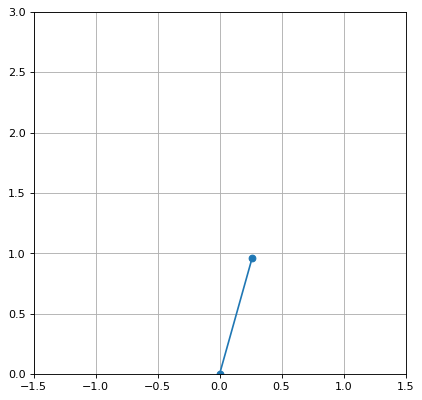

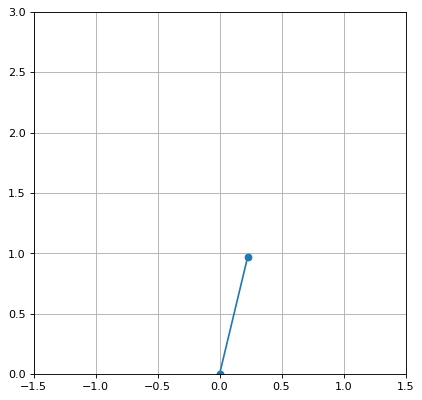

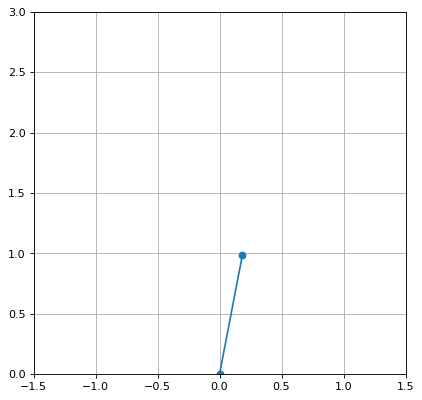

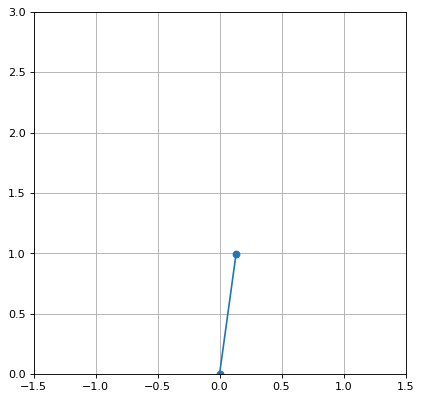

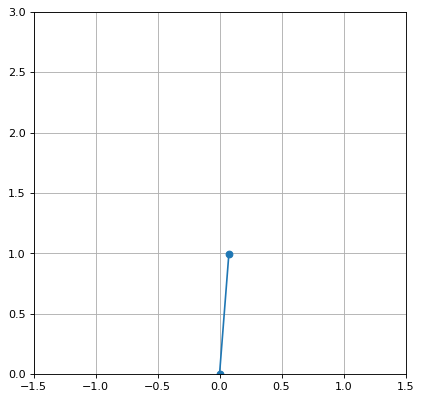

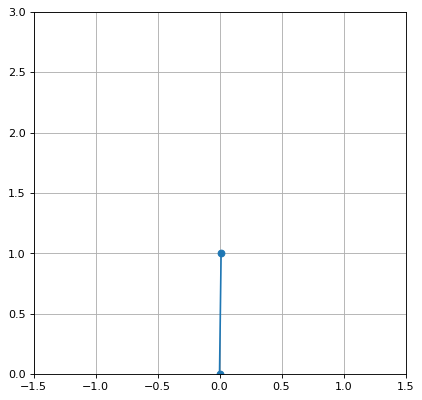

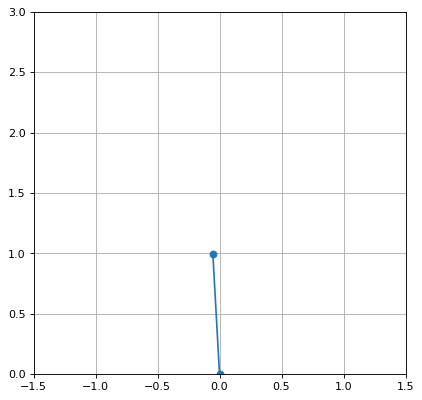

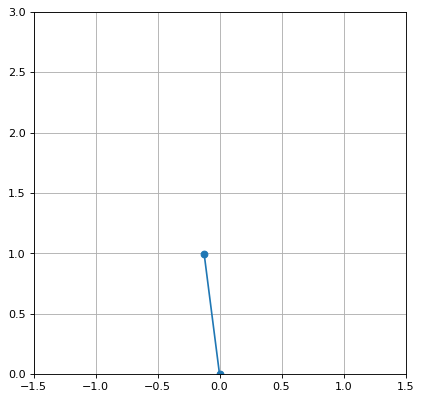

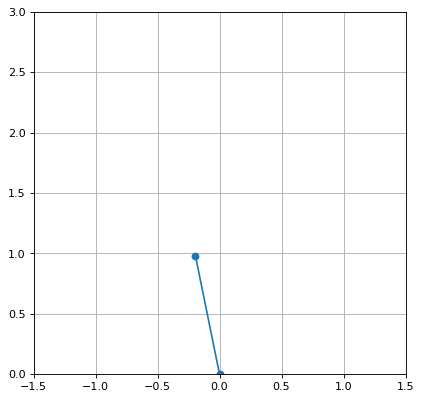

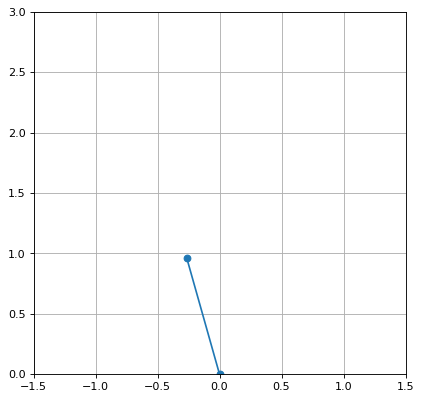

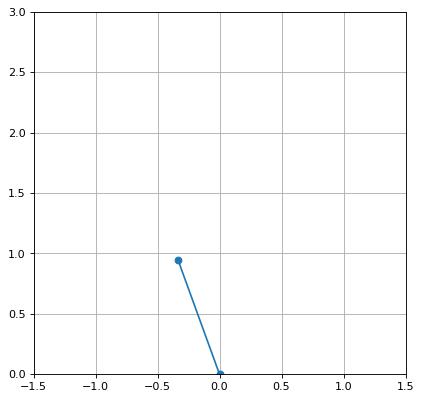

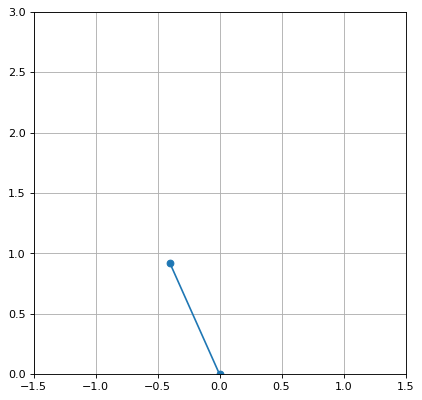

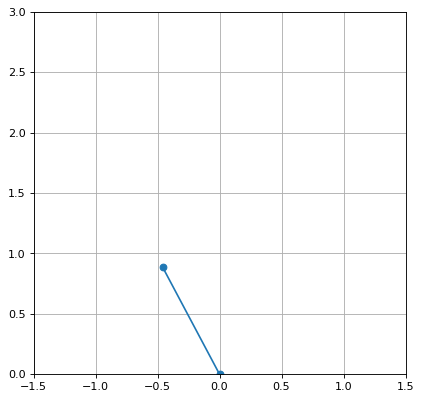

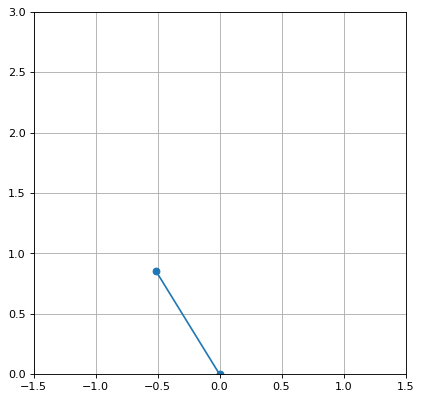

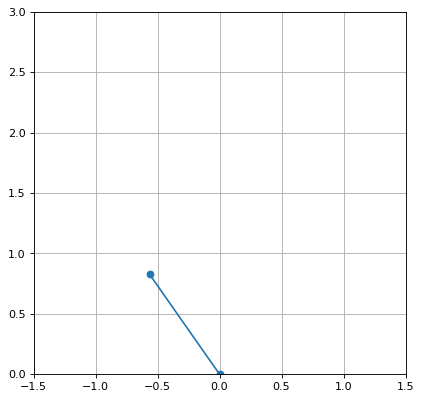

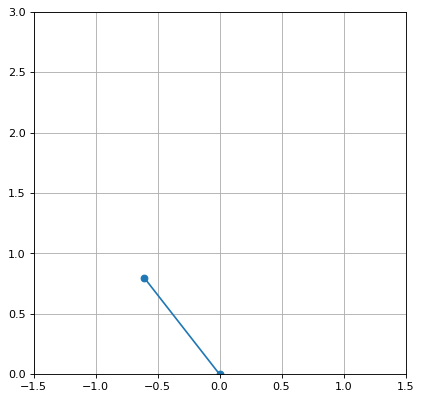

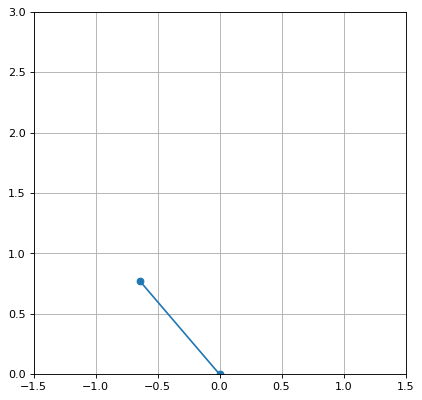

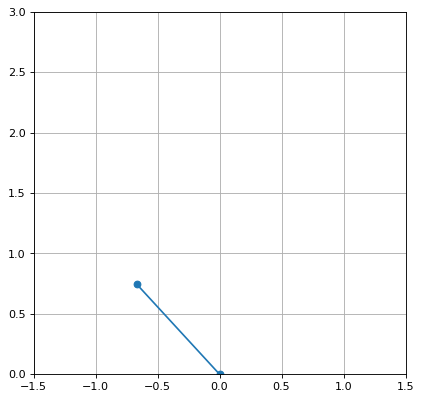

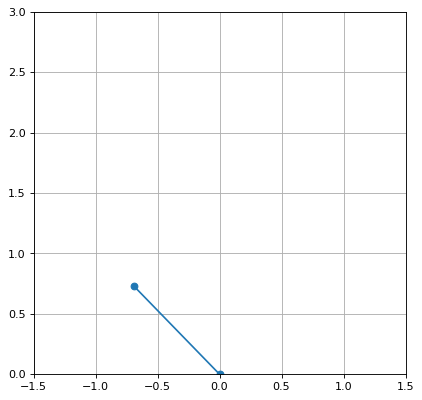

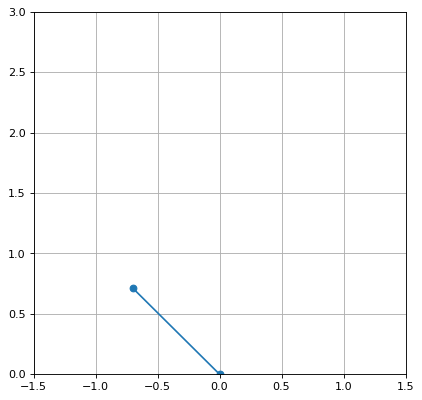

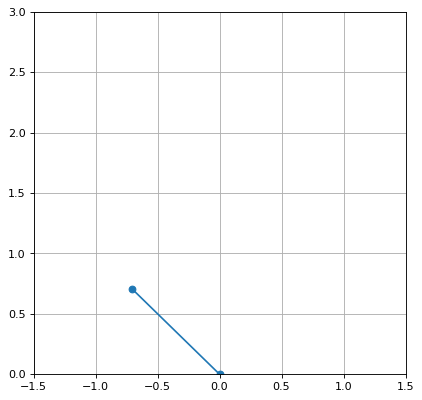

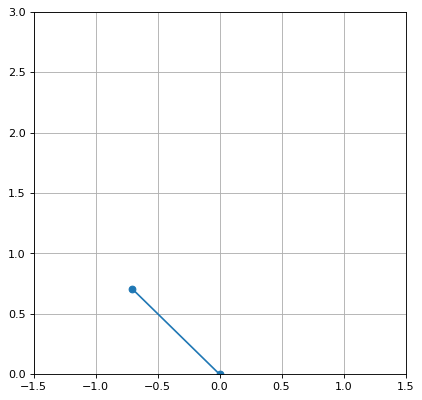

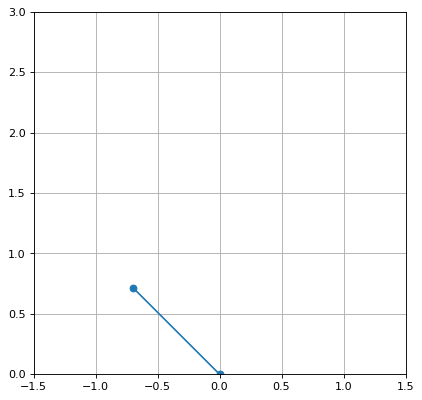

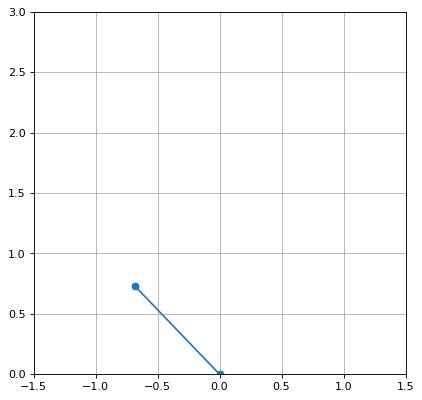

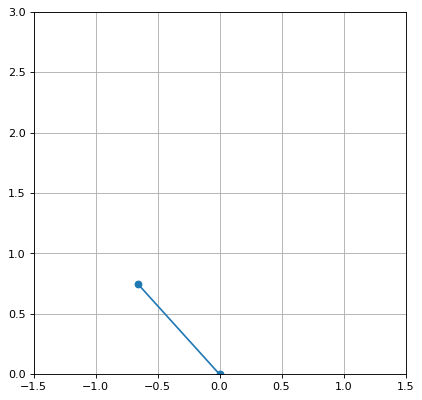

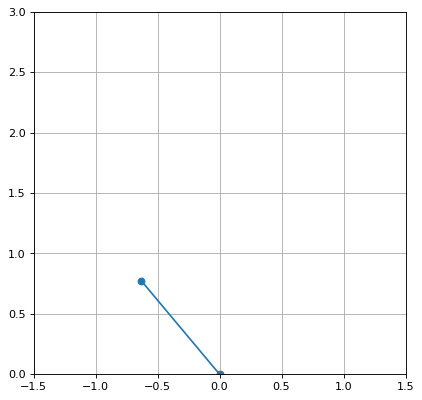

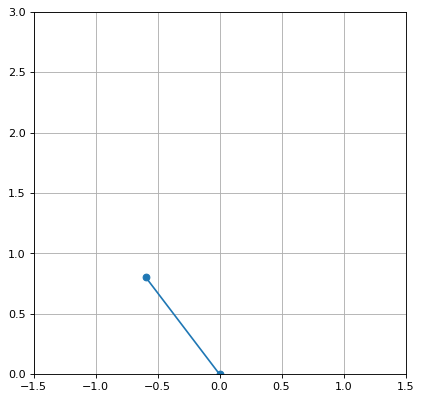

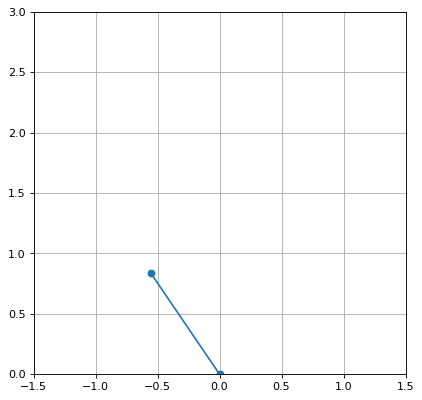

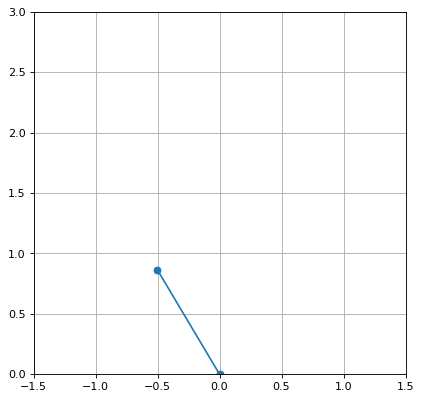

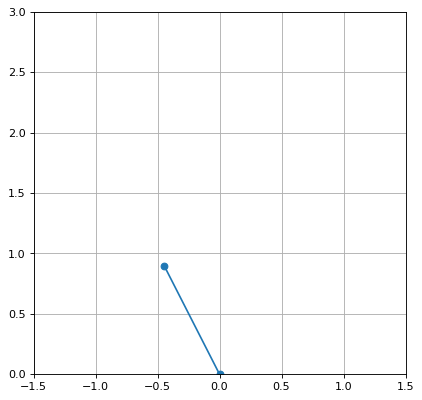

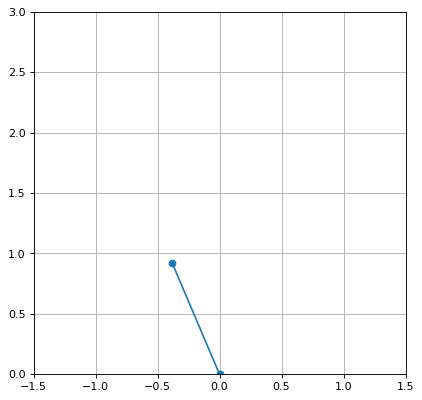

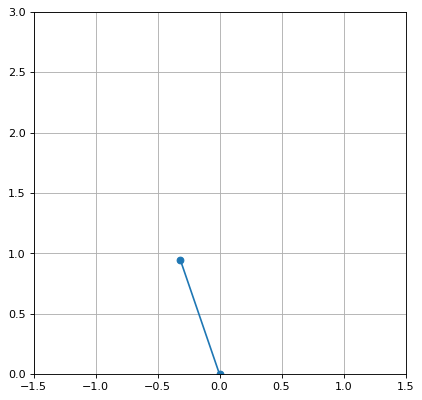

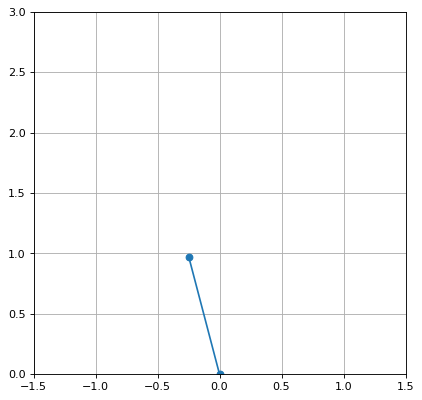

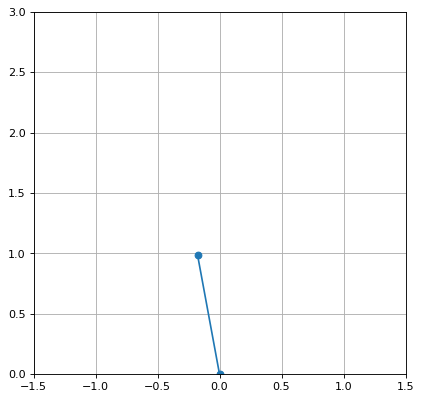

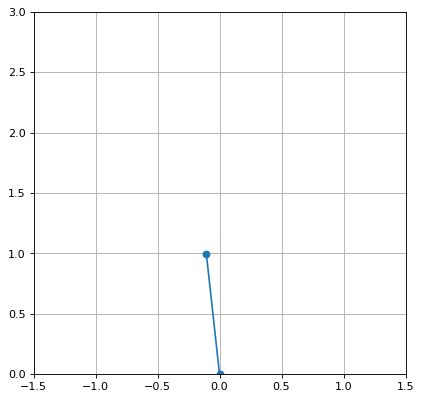

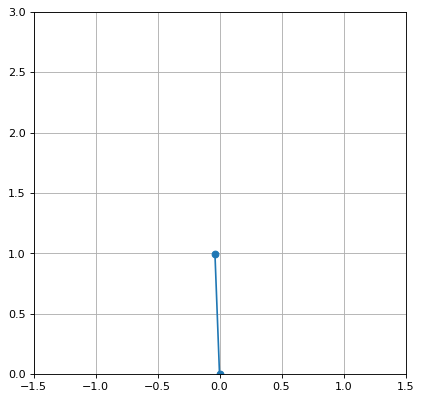

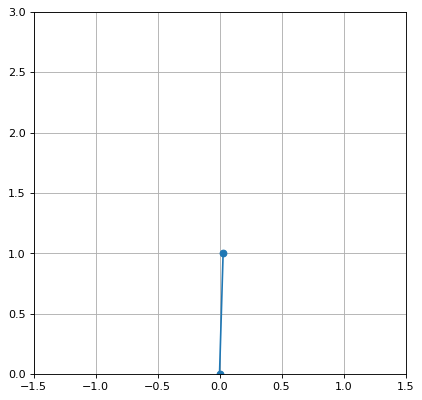

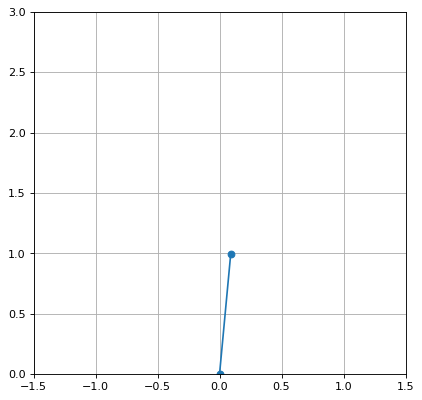

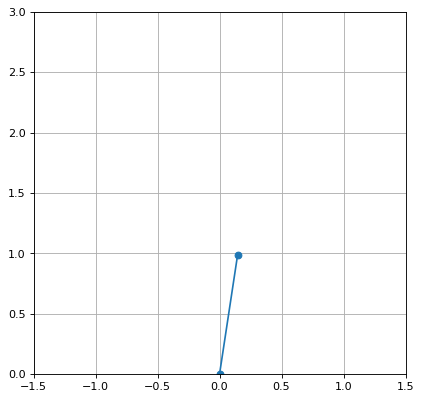

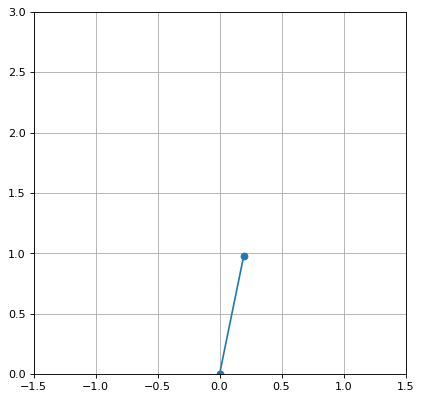

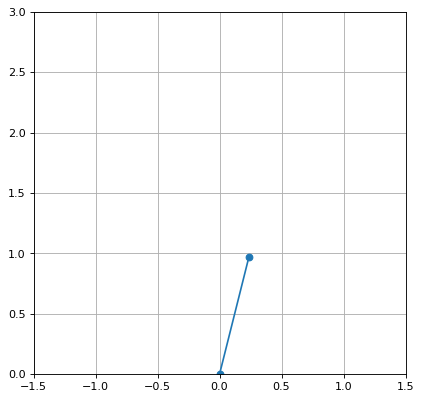

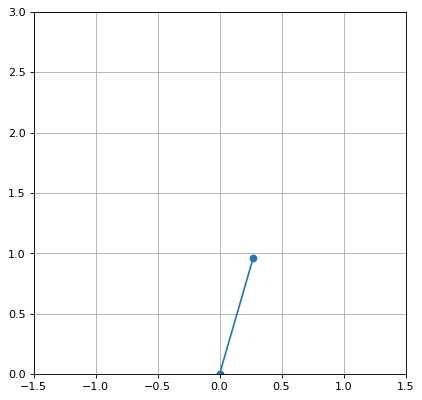

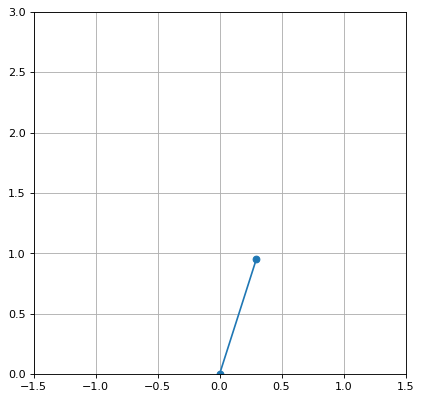

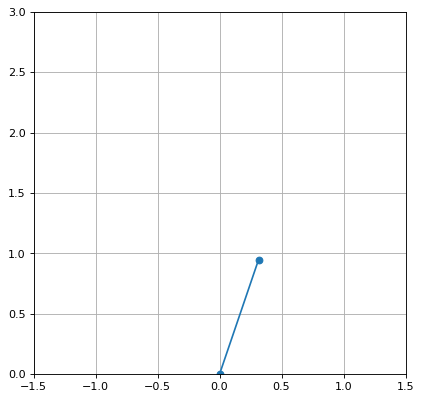

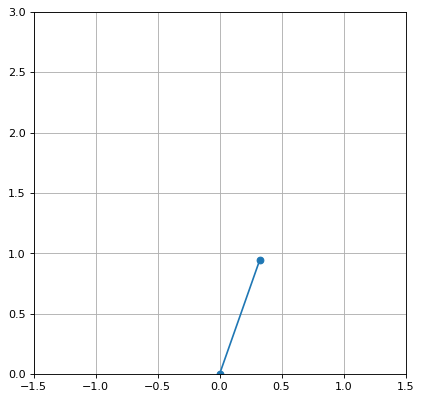

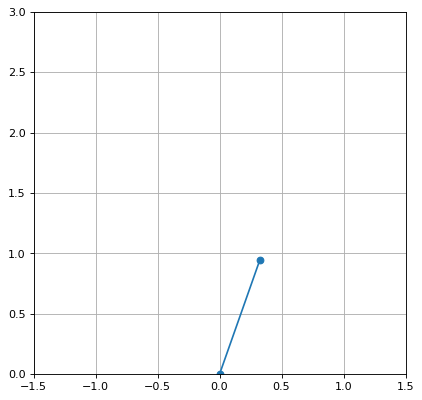

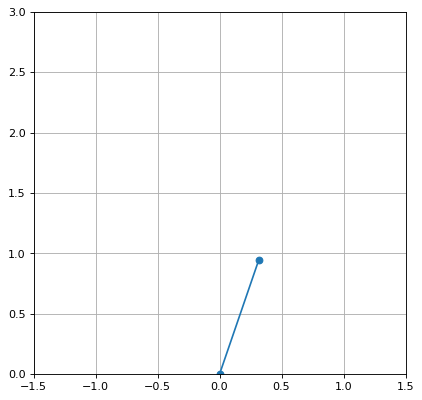

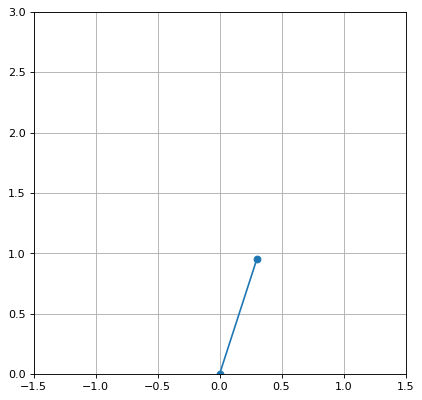

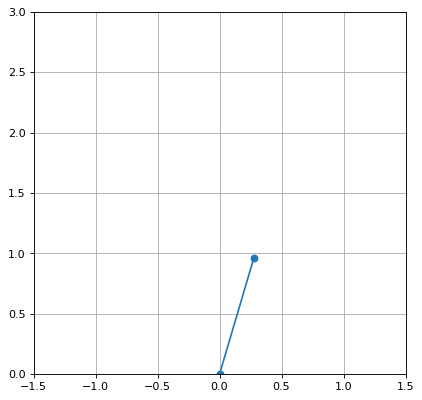

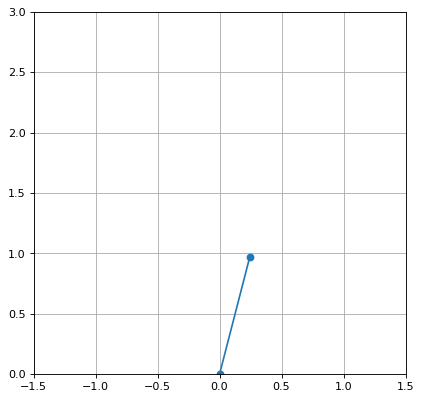

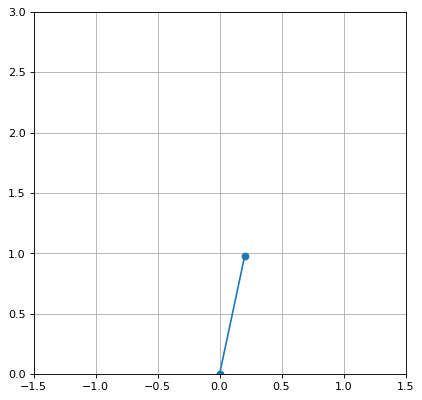

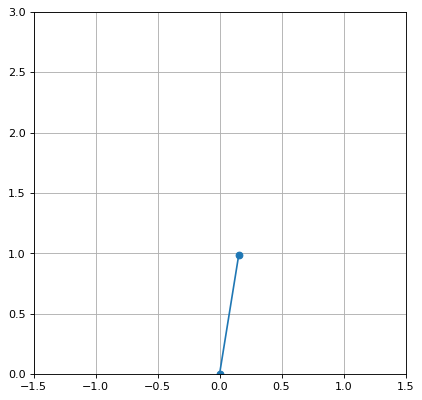

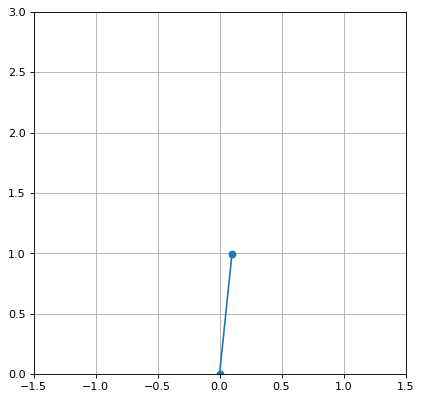

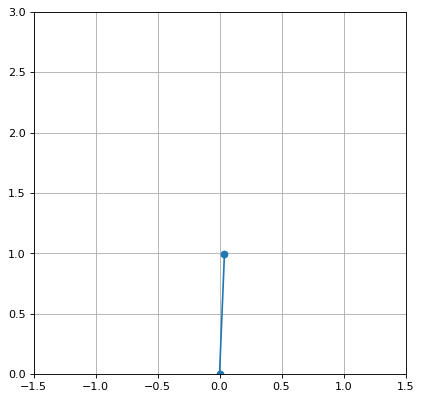

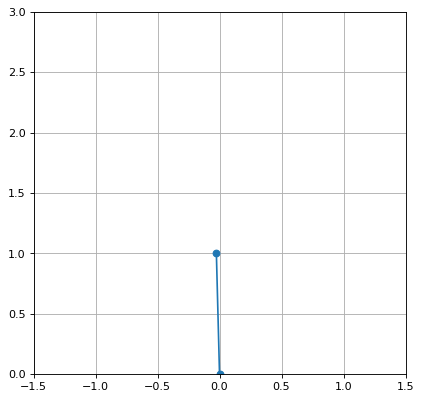

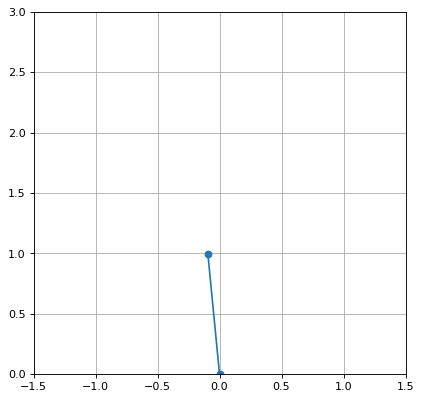

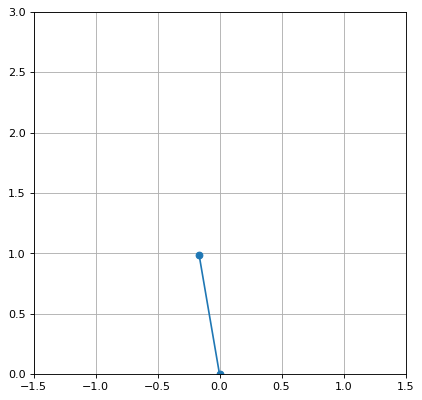

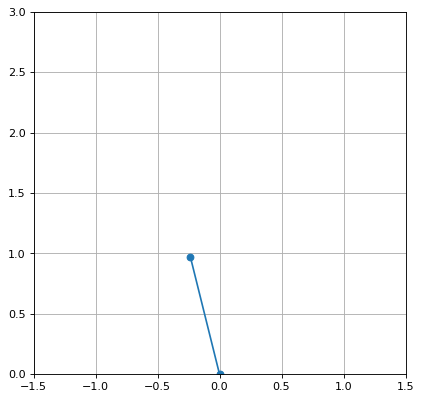

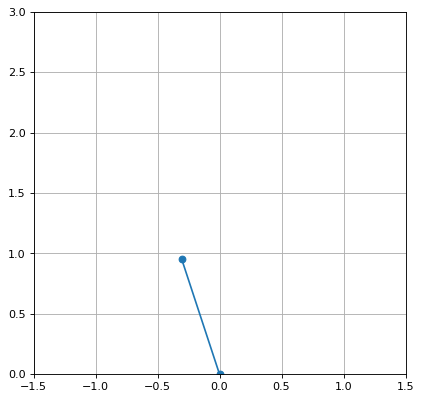

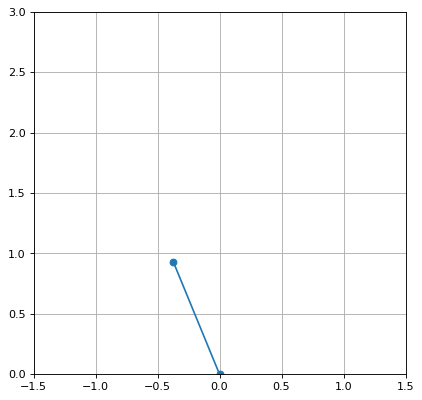

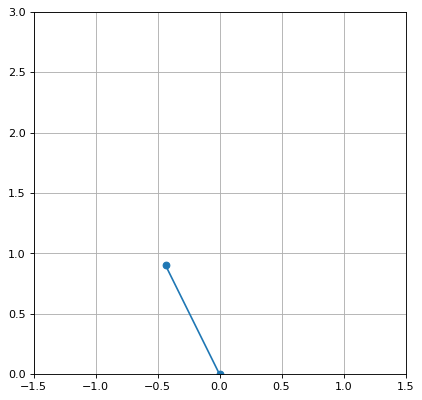

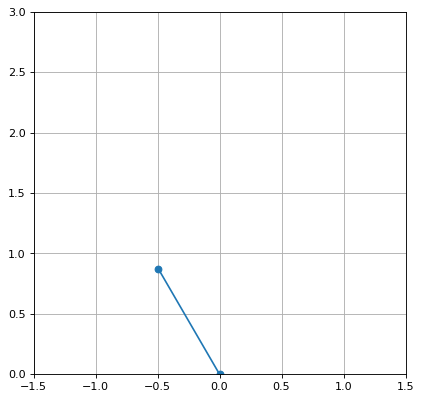

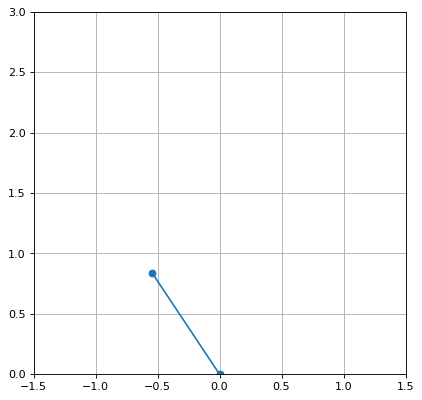

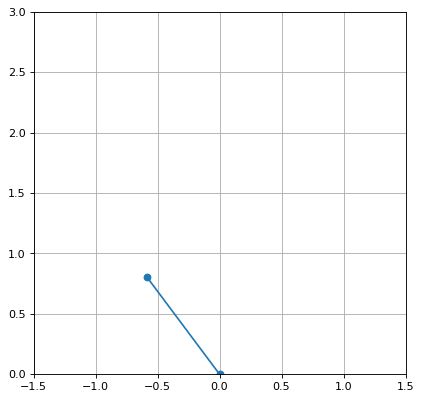

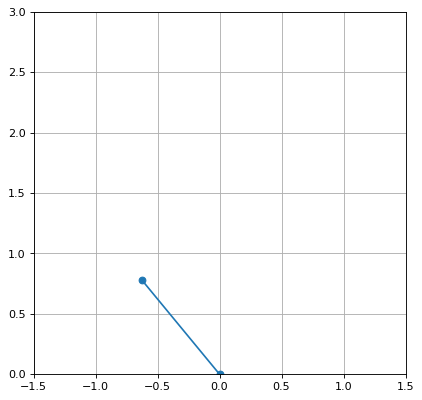

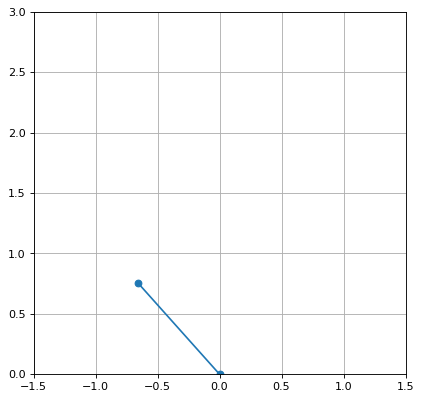

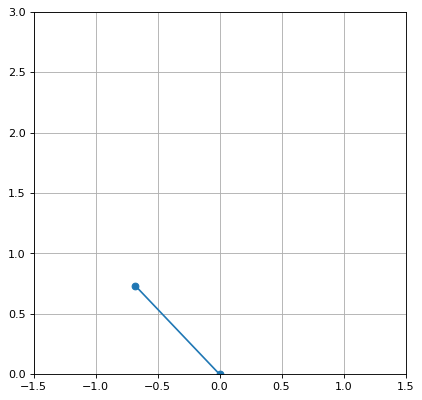

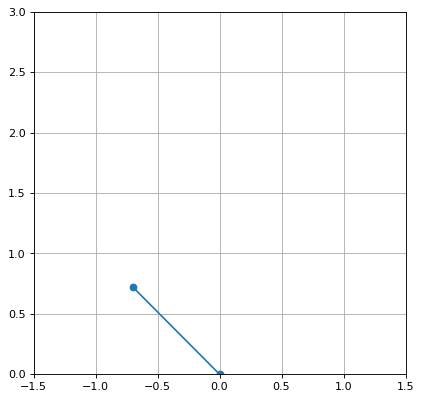

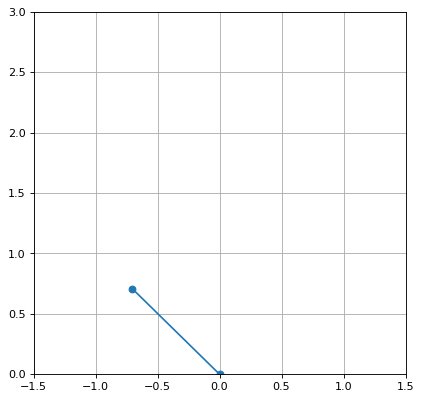

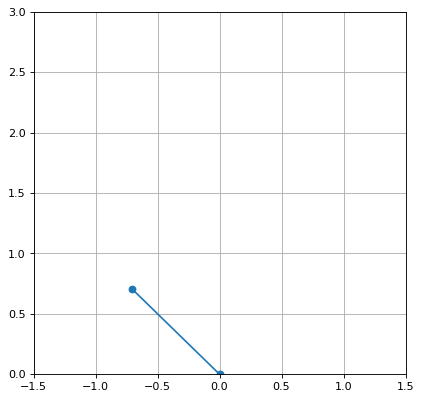

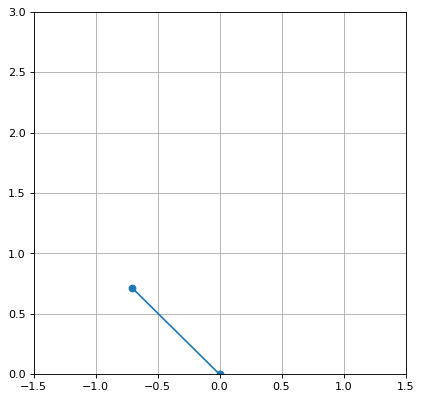

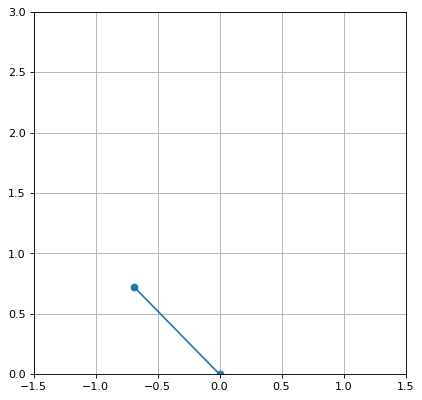

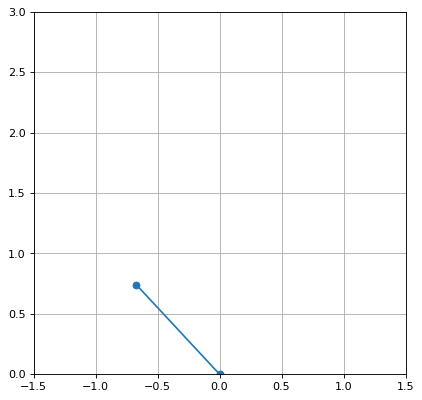

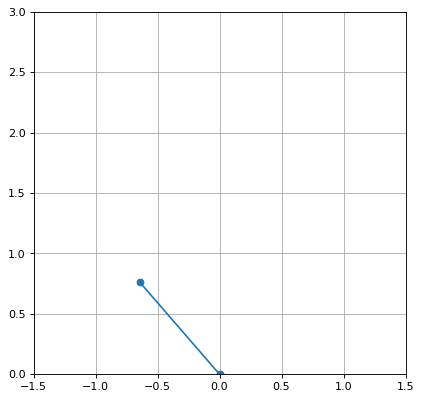

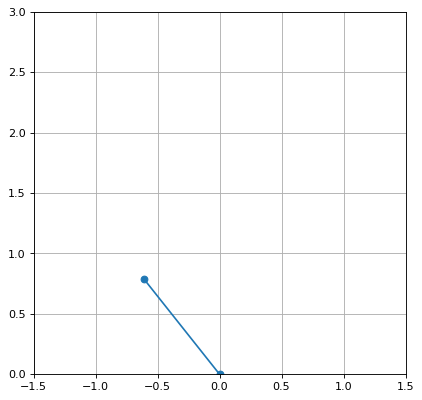

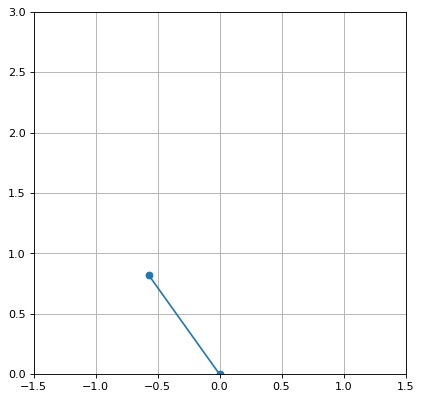

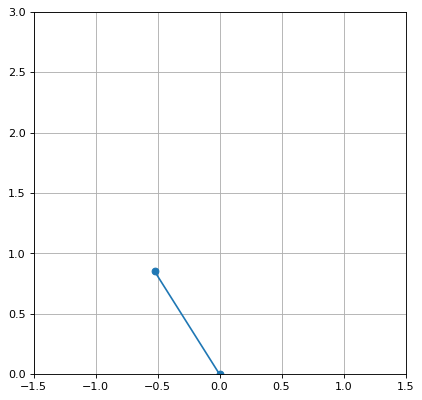

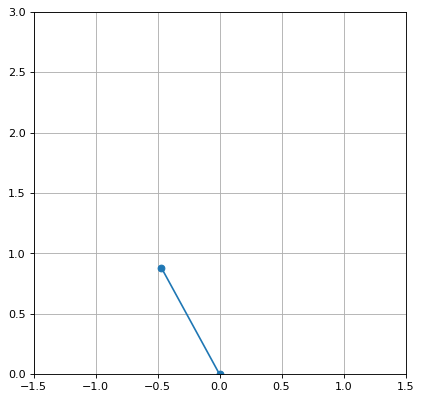

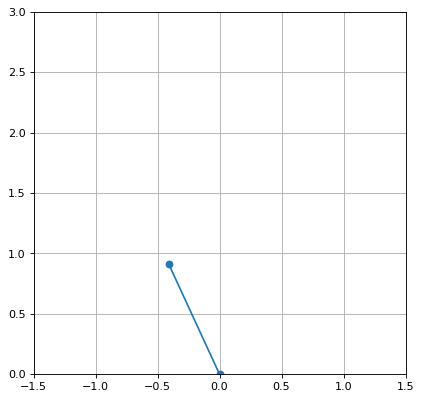

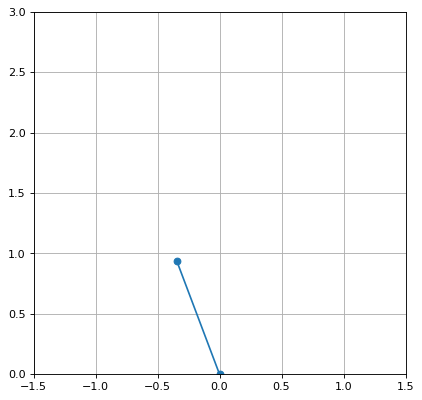

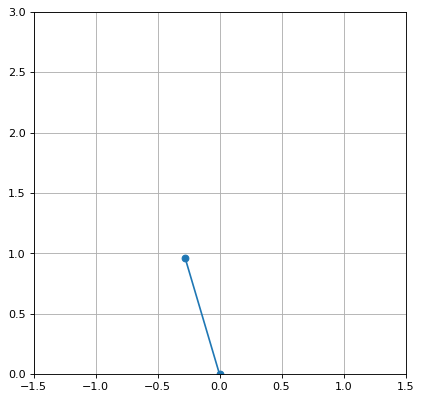

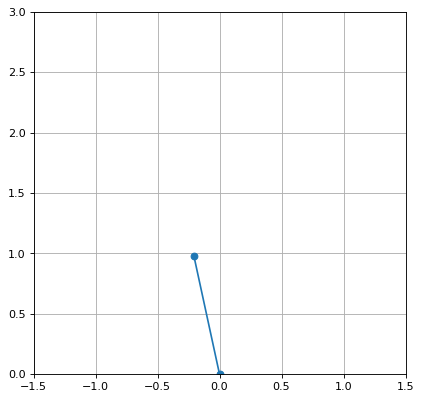

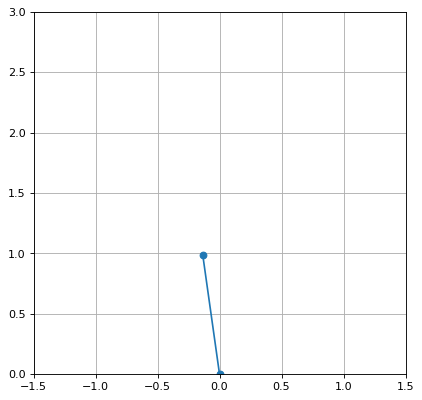

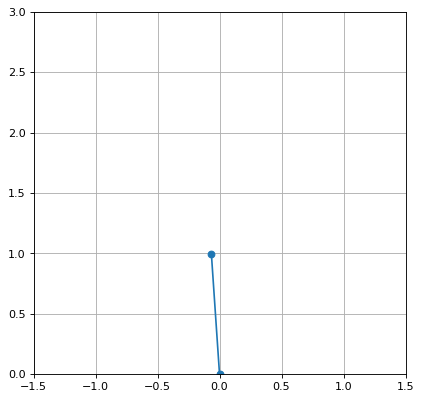

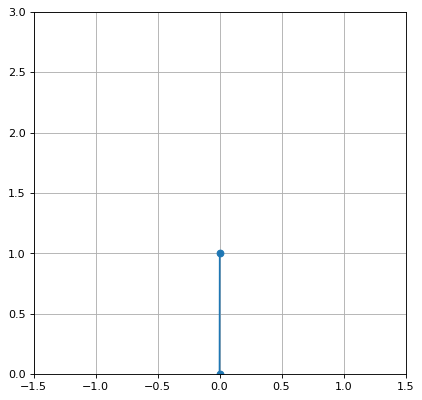

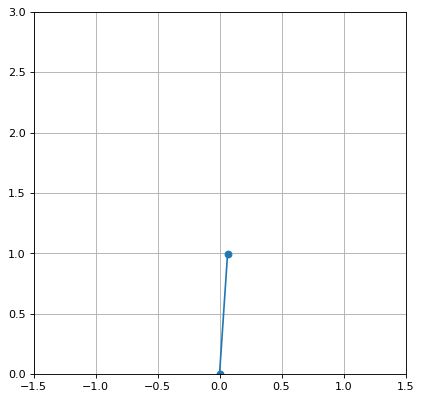

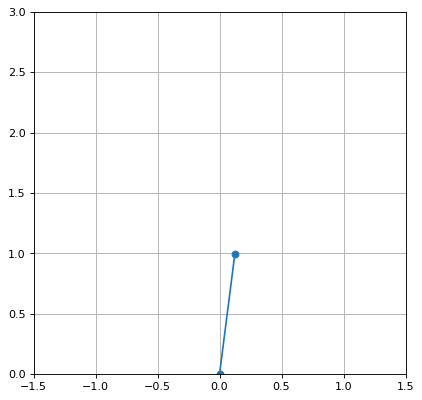

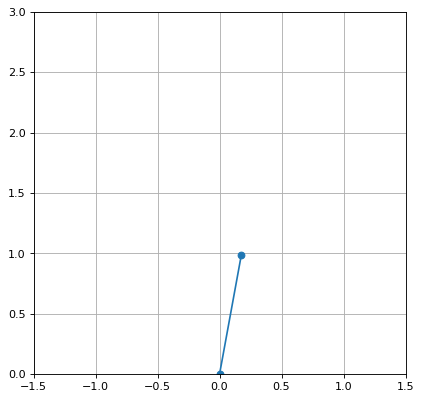

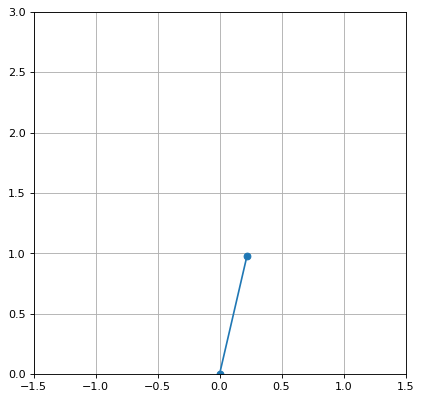

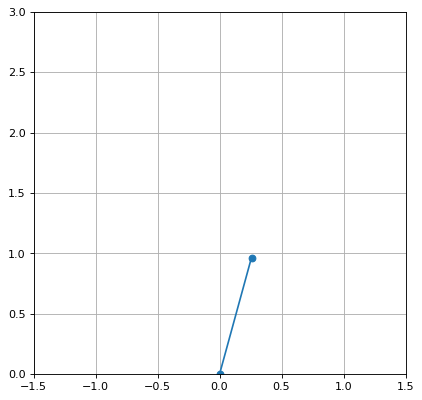

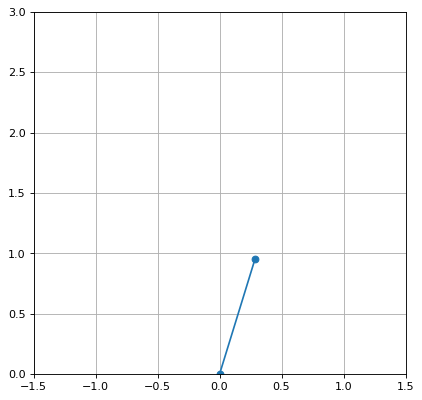

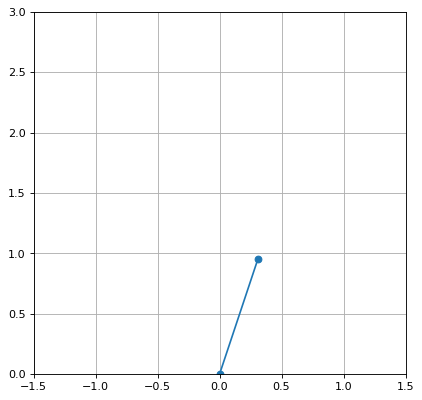

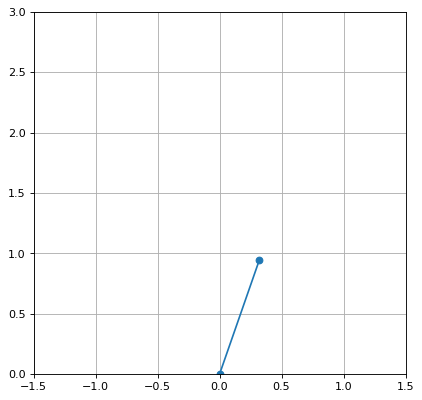

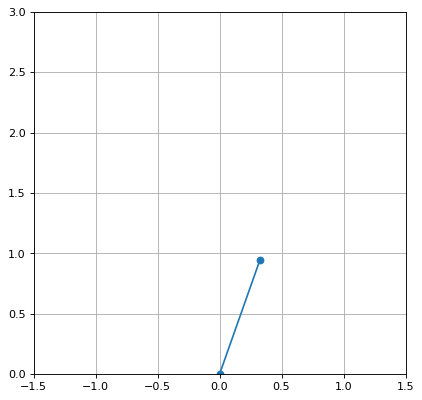

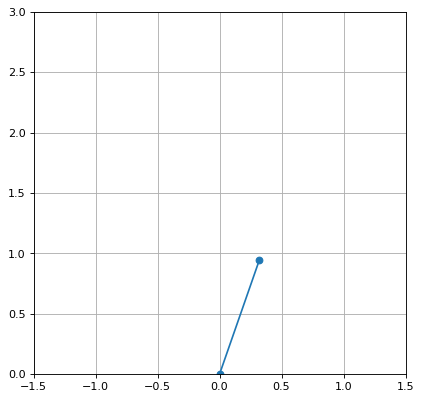

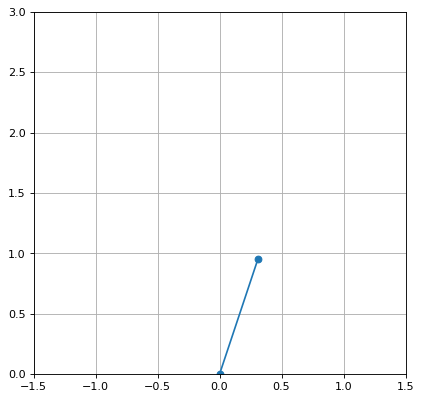

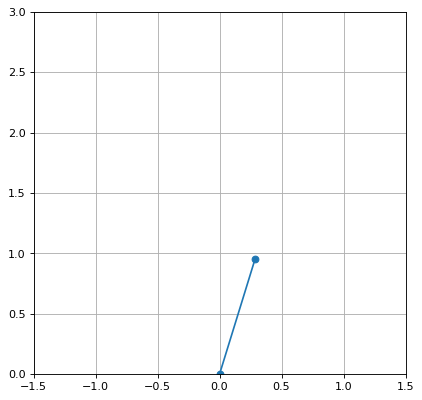

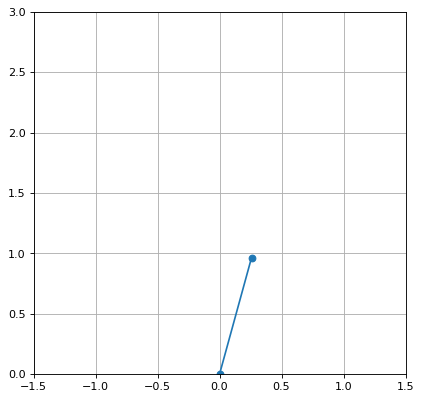

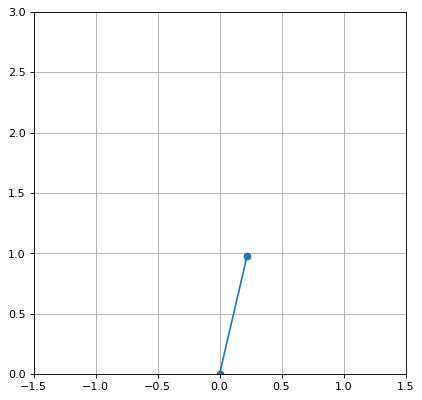

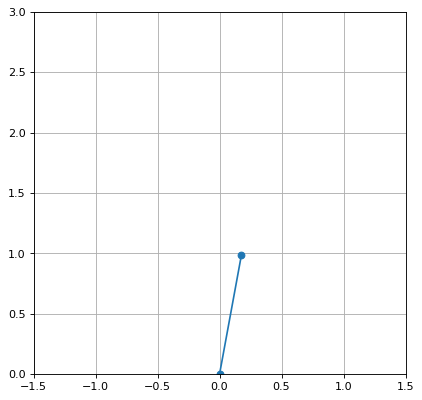

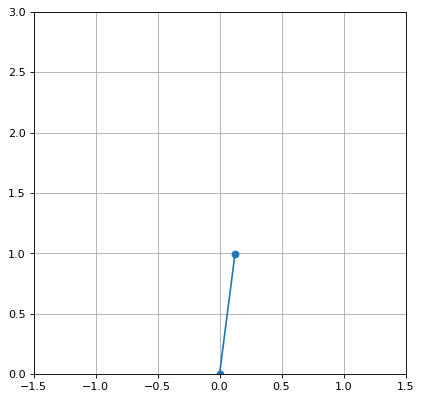

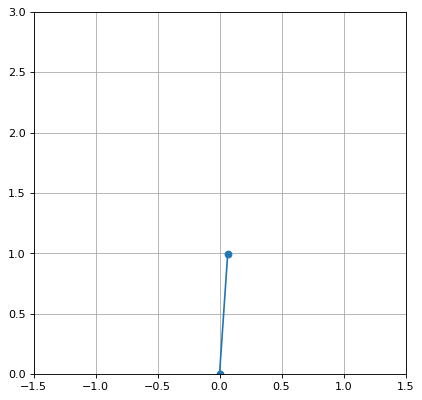

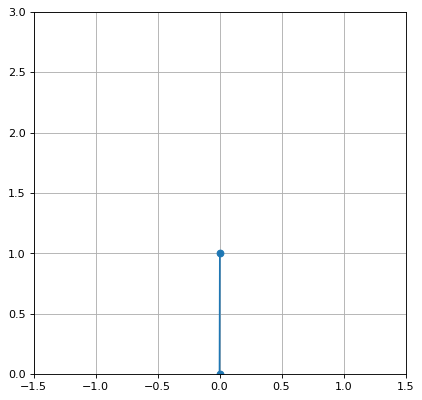

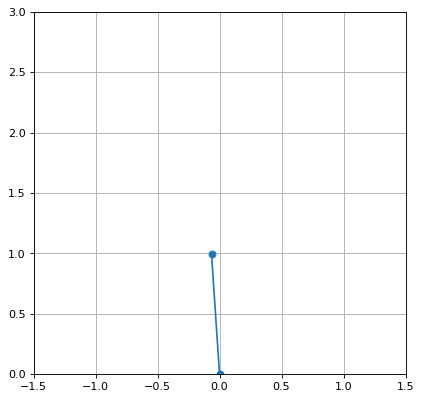

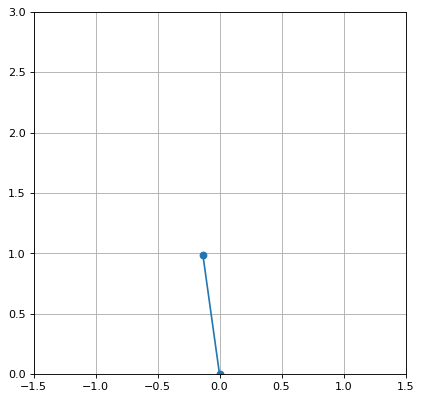

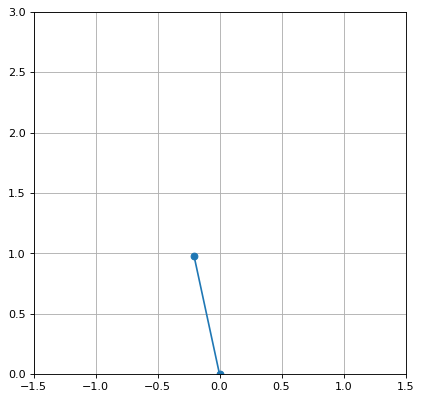

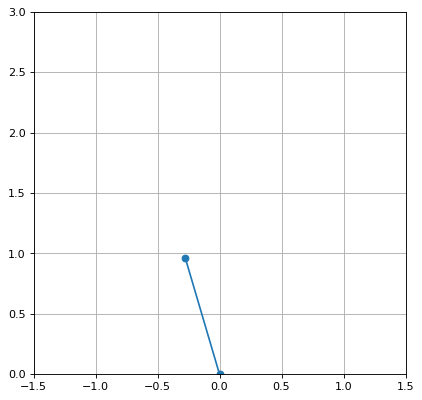

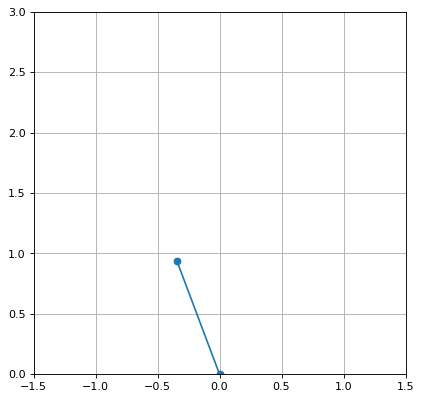

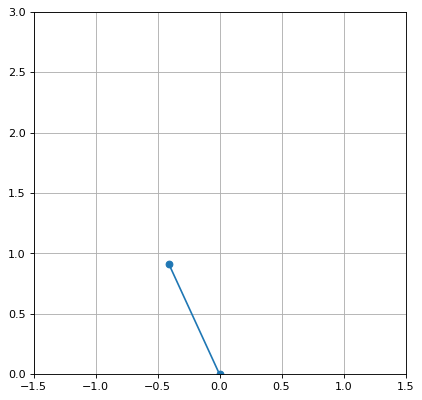

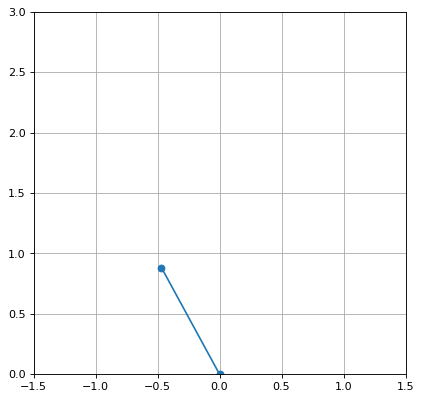

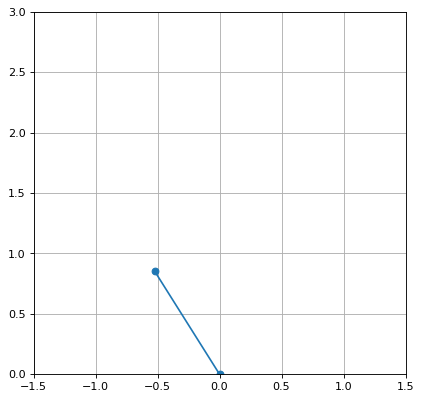

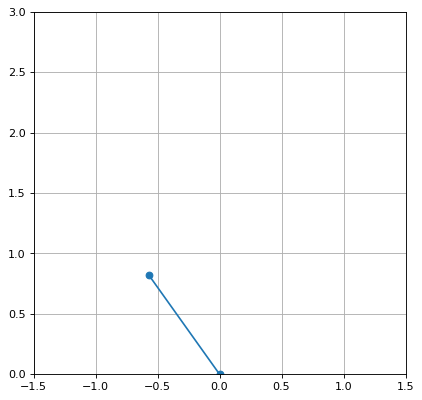

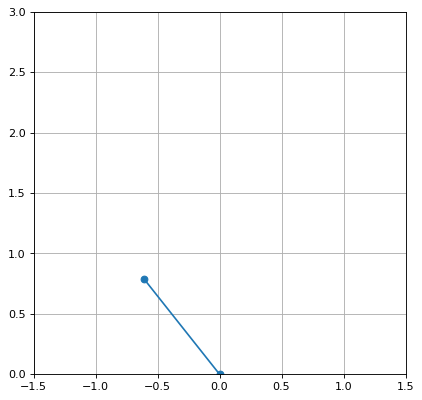

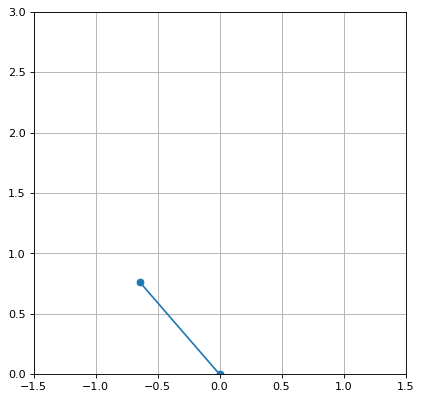

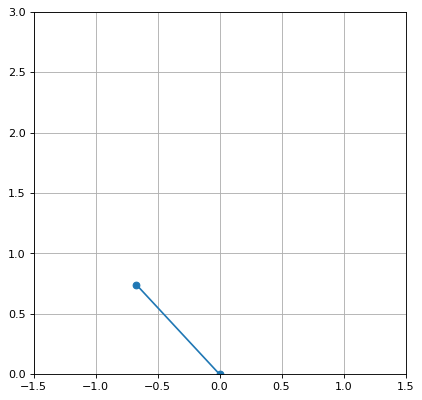

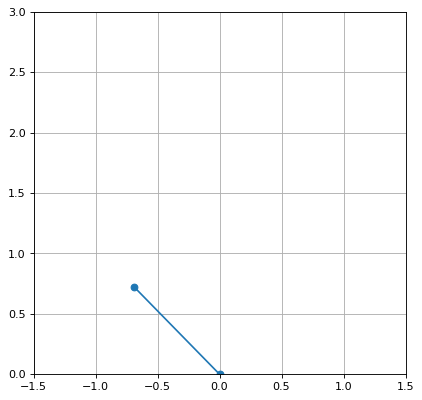

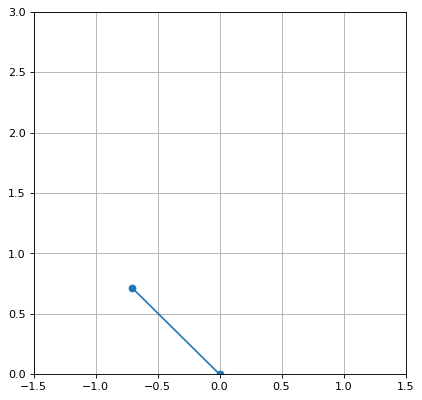

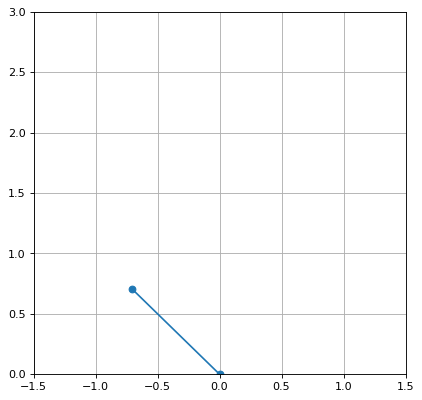

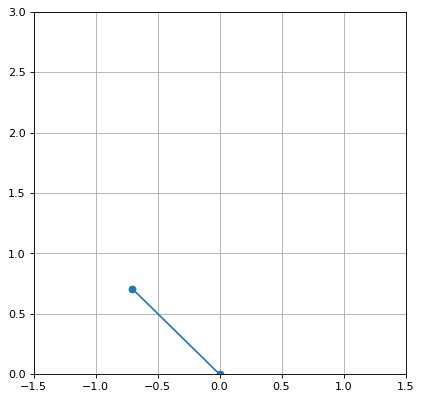

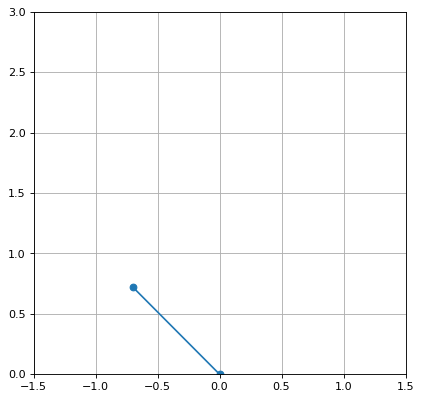

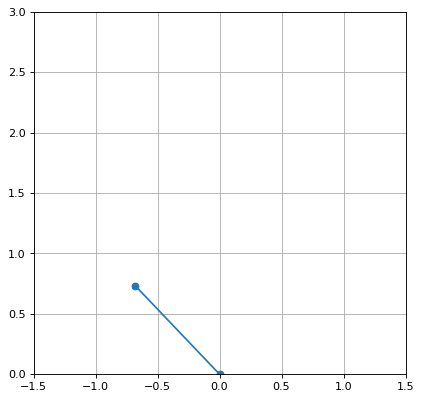

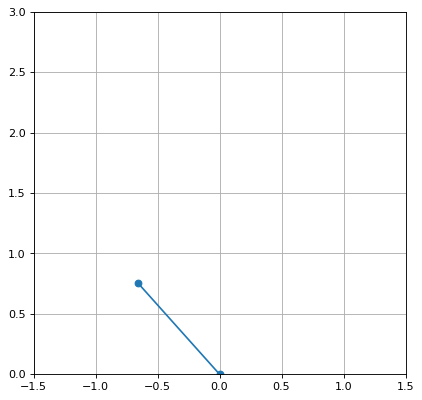

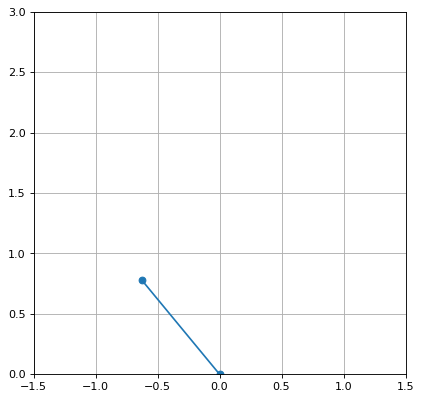

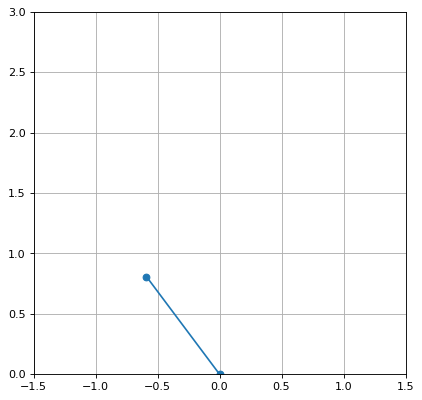

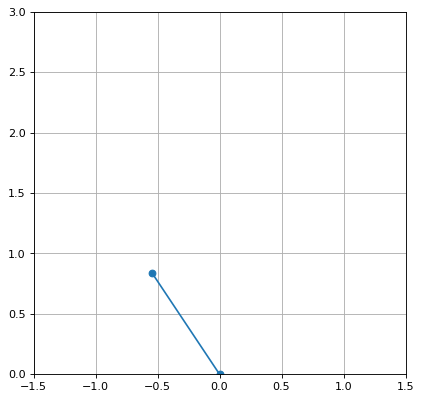

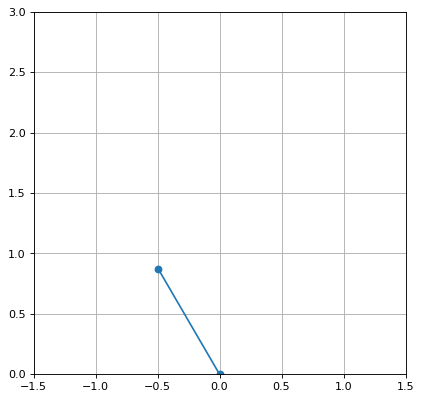

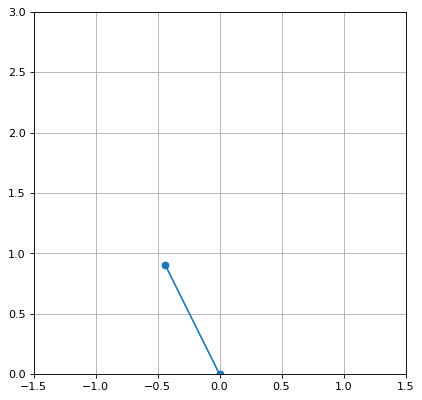

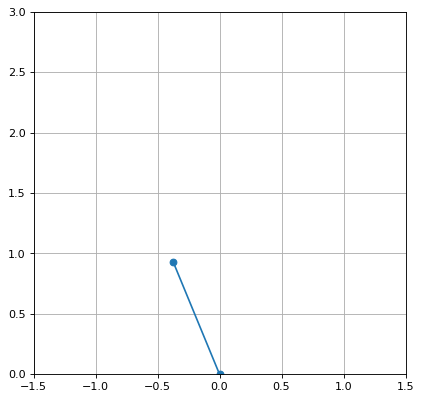

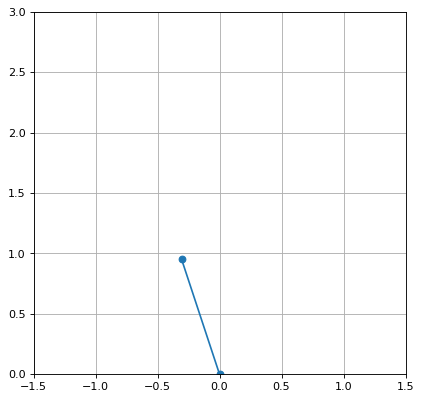

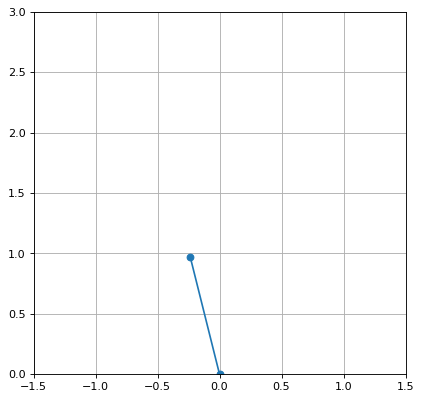

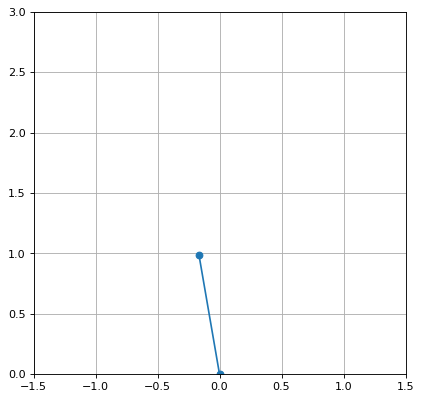

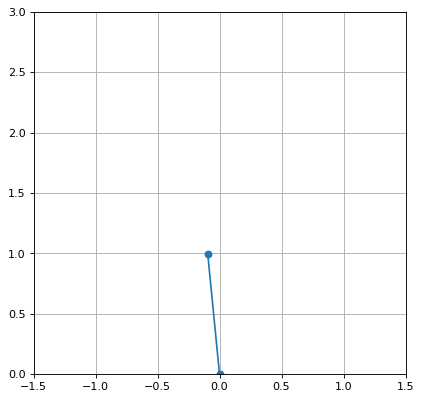

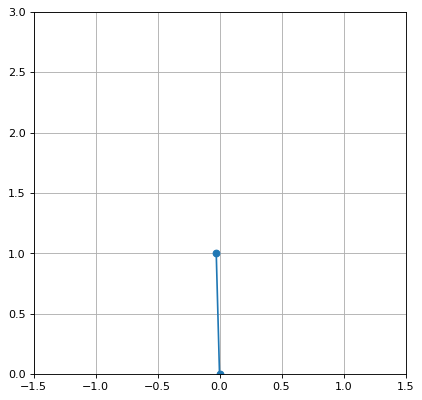

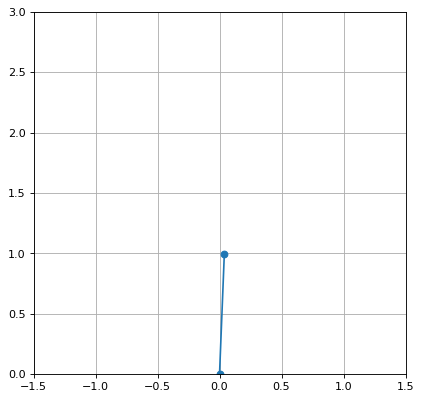

In [81]:
for i in range(np.size(q1)):
  img='/content/drive/My Drive/Robotics_Midsem/Q4a/'+ str(i)+ '.png'
  plt.figure(figsize=(6,6), dpi=80)
  plt.plot([0, x1[i]], [0, y1[i]], '-o')  # draw link1
  plt.xlim((-1.5,1.5))
  plt.ylim((0,3))
  plt.grid()
  plt.savefig(img)
  images.append(S.imread(img))

In [82]:
S.mimsave('/content/drive/My Drive/Robotics_Midsem/Q4a/anime.gif',images)

Link of animation for K=100: https://drive.google.com/file/d/1QeB8v6oqqwrf84rK1-UI84a92tyW2E_m/view?usp=sharing

Link of animation for K=40: https://drive.google.com/file/d/1-BX_kVrk7-xTLg9ZTporpLYBp8uk3xr2/view?usp=sharing